## Prédiction de la prime d'assurance

Ce projet s'inscrit dans le cadre des challenges proposés par le crédit agricole via le site https://challengedata.ens.fr/  

Le but de ce challenge est de prédire la prime (charge) pure incendie d'un contrat d'assurance en utilisant deux modèles : 
- Modèle qui prédit la fréquence d'incident
- Modèle qui prédit le coût moyen  

La variable cible (charge) est obtenue en multipliant la fréquence, le coût moyen et le nombre d'année de d'assurance de l'assuré


#### **Les données**

**Les variables cibles** : Frequence , coût moyen et charge    
**Des données geographiques** : département, données météorologiques...    
**Des données spécifiques au contrat** parmi :     
- l'activité de l'assuré        
- des  indicateurs de souscription des garanties  
nombre de bâtiments, de salariés, et de sinistres déclarés lors de la souscription     
- Données de surface : surfaces des bâtiments (élevage, exploitation, etc.),anonymisées en surface1, surface2, etc...
- Données de capitaux : capitaux assurés pour différentes options (vol, serres, etc.), anonymisés en capital1, capital2, etc.
- Données liées à la prévention : présence d’équipements (extincteurs, structure en bois, etc.)

Pour un total de 374 colonnes

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### **Exploration des données** 

In [4]:
# données pour entrainenement et validation
train = pd.read_csv("train_input_Z61KlZo.csv")

# données pour évaluation du modèl
test = pd.read_csv("test_input_5qJzHrr.csv") 

C:\Users\loreb\AppData\Local\Temp\ipykernel_2176\1490518362.py:2: DtypeWarning: Columns (16,17,29,30,31,126,128,129,132,133,135,138,371) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train_input_Z61KlZo.csv")
C:\Users\loreb\AppData\Local\Temp\ipykernel_2176\1490518362.py:5: DtypeWarning: Columns (16,17,29,30,31,126,128,129,132,133,135,138,371) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv("test_input_5qJzHrr.csv")


In [42]:
train.head()

ID ACTIVIT2 VOCATION  TYPERS  ANCIENNETE ADOSS CARACT1  CARACT2 CARACT3  \
0   1     ACT1     VOC6       1           0     N       N      NaN     NaN   
1   2     ACT1     VOC6       1           0     N       N      NaN     NaN   
2   3     ACT1     VOC6       1           2     N       R      NaN     NaN   
3   4     ACT1     VOC6       2           0     N       N      NaN     NaN   
4   5     ACT1     VOC6       2           1     N       N      NaN     NaN   

  INDEM1  ...  NBJRR100_MMAX_A NBJRR100_MSOM_A  RR_VOR_MM_A RR_VOR_MMAX_A  \
0      N  ...              NaN             NaN          NaN           NaN   
1      N  ...              NaN             NaN          NaN           NaN   
2      N  ...              NaN             NaN          NaN           NaN   
3      N  ...              NaN             NaN          NaN           NaN   
4      N  ...         01. <= 0        01. <= 0   03. <= 102    03. <= 232   

  RRAB_VOR_MM_A  RRAB_VOR_MMAX_A ANNEE_ASSURANCE ESPINSEE AN_EXERC ZONE  
0           NaN              NaN        1.000000      NaN   ANNEE5    3  
1           NaN              NaN        1.000000      NaN   ANNEE5    3  
2           NaN              NaN        0.402740      NaN   ANNEE5    3  
3           NaN              NaN        0.246575      NaN   ANNEE5    3  
4     04. >= 25        02. <= 57        0.838356      NaN   ANNEE5    3  

[5 rows x 374 columns]

In [5]:
# cibles freq, charge(CM) et Charge et nombre d'années d'assurance
train_output = pd.read_csv("train_output_DzPxaPY.csv")
train_output.head()

ID  FREQ   CM  ANNEE_ASSURANCE  CHARGE
0   1   0.0  0.0         1.000000     0.0
1   2   0.0  0.0         1.000000     0.0
2   3   0.0  0.0         0.402740     0.0
3   4   0.0  0.0         0.246575     0.0
4   5   0.0  0.0         0.838356     0.0

In [6]:
# check les duplicata
print(train.duplicated().sum())
print(test.duplicated().sum())
print(train_output.duplicated().sum())

0
0
0


In [ ]:
# # garde les ID au cas où et supp des df
# ID_train_X = train.ID
# ID_train_y = train_output.ID

# train = train.drop(["ID"], axis = 1)
# train_output = train_output.drop(["ID"], axis = 1)

In [7]:
print(train.duplicated().sum())
print(train_output.duplicated().sum())
# apres supp des ID aparitions de doublons , a ignorer

0
0


In [8]:
print(train.shape)
print(test.shape)
print(train_output.shape)

(383610, 374)
(95852, 374)
(383610, 5)


In [5]:
train.iloc[:,1:101].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383610 entries, 0 to 383609
Data columns (total 100 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ACTIVIT2        383610 non-null  object 
 1   VOCATION        383610 non-null  object 
 2   TYPERS          383610 non-null  int64  
 3   ANCIENNETE      383610 non-null  int64  
 4   ADOSS           383610 non-null  object 
 5   CARACT1         378977 non-null  object 
 6   CARACT2         15326 non-null   float64
 7   CARACT3         15326 non-null   object 
 8   INDEM1          383610 non-null  object 
 9   DUREE_REQANEUF  357037 non-null  float64
 10  CARACT4         383610 non-null  object 
 11  CARACT5         383610 non-null  int64  
 12  TYPBAT1         30274 non-null   object 
 13  INDEM2          356238 non-null  object 
 14  TYPBAT2         383610 non-null  int64  
 15  FRCH1           383610 non-null  object 
 16  FRCH2           357037 non-null  object 
 17  DEROG1   

In [6]:
train.iloc[:,101:201].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383610 entries, 0 to 383609
Data columns (total 100 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SURFACE20      383610 non-null  int64  
 1   SURFACE21      383610 non-null  int64  
 2   NBBAT1         383610 non-null  int64  
 3   NBBAT2         383610 non-null  int64  
 4   NBBAT3         383610 non-null  int64  
 5   NBBAT4         383610 non-null  int64  
 6   NBBAT5         383610 non-null  int64  
 7   NBBAT6         383610 non-null  int64  
 8   NBBAT7         383610 non-null  int64  
 9   NBBAT8         383610 non-null  int64  
 10  NBBAT9         383610 non-null  int64  
 11  NBBAT10        383610 non-null  int64  
 12  NBBAT11        383610 non-null  int64  
 13  NBBAT13        383610 non-null  int64  
 14  NBBAT14        383610 non-null  int64  
 15  TAILLE3        383610 non-null  int64  
 16  TAILLE4        383610 non-null  int64  
 17  NBSINCONJ      383610 non-nu

In [ ]:
train.iloc[:,201:301].info()

<class 'pandas.core.frame.DataFrame'>
Index: 383610 entries, 1 to 383610
Data columns (total 100 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   MEN_1IND                    365020 non-null  object 
 1   MEN_5IND                    365020 non-null  object 
 2   MEN_PROP                    365010 non-null  object 
 3   MEN_FMP                     365020 non-null  object 
 4   MEN_COLL                    365020 non-null  object 
 5   MEN_MAIS                    356150 non-null  object 
 6   LOG_AVA1                    365020 non-null  object 
 7   LOG_A1_A2                   365020 non-null  object 
 8   LOG_A2_A3                   365020 non-null  object 
 9   LOG_APA3                    365020 non-null  object 
 10  LOG_INC                     365020 non-null  object 
 11  LOG_SOC                     365020 non-null  object 
 12  IND                         365020 non-null  object 
 13  IND_0_Y1          

In [7]:
train.iloc[:,301:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383610 entries, 0 to 383609
Data columns (total 73 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   TNMAX_VOR_MM_A            165898 non-null  object 
 1   TNMAX_VOR_MMAX_A          165898 non-null  object 
 2   TX_VOR_MM_A               165898 non-null  object 
 3   TX_VOR_MMAX_A             165898 non-null  object 
 4   TXAB_VOR_MM_A             165898 non-null  object 
 5   TXAB_VOR_MMAX_A           165898 non-null  object 
 6   TXMIN_VOR_MM_A            165898 non-null  object 
 7   TXMIN_VOR_MMAX_A          165898 non-null  object 
 8   NBJFF10_MM_A              165898 non-null  object 
 9   NBJFF10_MMAX_A            165898 non-null  object 
 10  NBJFF10_MSOM_A            165898 non-null  object 
 11  NBJFF16_MM_A              165898 non-null  object 
 12  NBJFF16_MMAX_A            165898 non-null  object 
 13  NBJFF16_MSOM_A            165898 non-null  o

In [4]:
# resume de colonnes de train
colonne = []
type = []
nb_na = []
prc_na = []
n_mod = []
ex_var = []

for col in train.columns :
    type.append(train[col].dtype)
    nb_na.append(train[col].isna().sum())
    prc_na.append(train[col].isna().sum()/len(train))
    n_mod.append( train[col].nunique())
    ex_var.append(train[col].unique()[0:3])

dico = {"col" : train.columns.tolist(),
            "type" : type,
            "NA" : nb_na,
            "%NA" : prc_na,
            "n_modalités" :n_mod,
            "exemple de var" : ex_var
    }

resume_train = pd.DataFrame(dico)

In [ ]:
resume_train
# beaucoup de variables avec plus de 50% de NA

col     type      NA       %NA  n_modalités  \
0                 ID    int64       0  0.000000       383610   
1           ACTIVIT2   object       0  0.000000            9   
2           VOCATION   object       0  0.000000            8   
3             TYPERS    int64       0  0.000000            2   
4         ANCIENNETE    int64       0  0.000000           12   
..               ...      ...     ...       ...          ...   
369  RRAB_VOR_MMAX_A   object  217712  0.567535            4   
370  ANNEE_ASSURANCE  float64       0  0.000000         1113   
371         ESPINSEE   object  151542  0.395042            4   
372         AN_EXERC   object       0  0.000000            9   
373             ZONE    int64       0  0.000000           93   

                       exemple de var  
0                           [1, 2, 3]  
1                  [ACT1, ACT2, ACT5]  
2                  [VOC6, VOC7, VOC1]  
3                              [1, 2]  
4                           [0, 2, 1]  
..                                ...  
369       [nan, 02. <= 57, 01. <= 41]  
370  [1.0, 0.402739726, 0.2465753425]  
371                 [nan, ESP3, ESP4]  
372          [ANNEE5, ANNEE4, ANNEE3]  
373                       [3, 94, 82]  

[374 rows x 6 columns]

In [5]:
# resume des colonnes de test
colonne = []
type = []
nb_na = []
prc_na = []
n_mod = []
ex_var = []

for col in test.columns :
    type.append(test[col].dtype)
    nb_na.append(test[col].isna().sum())
    prc_na.append(test[col].isna().sum()/len(test))
    n_mod.append( test[col].nunique())
    ex_var.append(test[col].unique()[0:3])

dico_test = {"col" : test.columns.tolist(),
            "type" : type,
            "NA" : nb_na,
            "%NA" : prc_na,
            "n_modalités" :n_mod,
            "exemple de var" : ex_var
    }

resume_test = pd.DataFrame(dico_test)

In [24]:
resume_test

col     type     NA       %NA  n_modalités  \
0                 ID    int64      0  0.000000        95852   
1           ACTIVIT2   object      0  0.000000            9   
2           VOCATION   object      0  0.000000            8   
3             TYPERS    int64      0  0.000000            2   
4         ANCIENNETE    int64      0  0.000000           12   
..               ...      ...    ...       ...          ...   
369  RRAB_VOR_MMAX_A   object  54577  0.569388            4   
370  ANNEE_ASSURANCE  float64      0  0.000000          976   
371         ESPINSEE   object  38026  0.396716            4   
372         AN_EXERC   object      0  0.000000            9   
373             ZONE    int64      0  0.000000           92   

                        exemple de var  
0             [383611, 383612, 383613]  
1                   [ACT1, ACT2, ACT5]  
2                   [VOC6, VOC7, VOC1]  
3                               [2, 1]  
4                            [4, 6, 2]  
..                                 ...  
369        [02. <= 57, nan, 03. <= 82]  
370  [0.8136986301, 1.0, 0.5863013699]  
371                  [nan, ESP4, ESP2]  
372           [ANNEE5, ANNEE4, ANNEE3]  
373                        [3, 94, 82]  

[374 rows x 6 columns]

In [13]:
### regrouper les variables par couleurs du doc infos pour analyses

In [60]:
train.head()

ACTIVIT2 VOCATION  TYPERS  ANCIENNETE ADOSS CARACT1  CARACT2 CARACT3 INDEM1  \
0     ACT1     VOC6       1           0     N       N      NaN     NaN      N   
1     ACT1     VOC6       1           0     N       N      NaN     NaN      N   
2     ACT1     VOC6       1           2     N       R      NaN     NaN      N   
3     ACT1     VOC6       2           0     N       N      NaN     NaN      N   
4     ACT1     VOC6       2           1     N       N      NaN     NaN      N   

   DUREE_REQANEUF  ... NBJRR100_MMAX_A  NBJRR100_MSOM_A RR_VOR_MM_A  \
0             NaN  ...             NaN              NaN         NaN   
1             NaN  ...             NaN              NaN         NaN   
2             NaN  ...             NaN              NaN         NaN   
3             NaN  ...             NaN              NaN         NaN   
4             NaN  ...        01. <= 0         01. <= 0  03. <= 102   

  RR_VOR_MMAX_A  RRAB_VOR_MM_A RRAB_VOR_MMAX_A ANNEE_ASSURANCE ESPINSEE  \
0           NaN            NaN             NaN        1.000000      NaN   
1           NaN            NaN             NaN        1.000000      NaN   
2           NaN            NaN             NaN        0.402740      NaN   
3           NaN            NaN             NaN        0.246575      NaN   
4    03. <= 232      04. >= 25       02. <= 57        0.838356      NaN   

  AN_EXERC ZONE  
0   ANNEE5    3  
1   ANNEE5    3  
2   ANNEE5    3  
3   ANNEE5    3  
4   ANNEE5    3  

[5 rows x 373 columns]

Pour faciliter l'analyse des données, création de subset des colonnes

In [106]:
rose = train.iloc[:,1:18]
derog = train.iloc[:,18:34]
taill_ca = train.iloc[:,34:39]
capital = train.iloc[:,39:82]
surface = train.iloc[:,82:103]
nbBat_tailleRsk = train.iloc[:,103:118]
gris = train.iloc[:,118:141]  # inc de risk, equipement, sinitralité
dst = train.iloc[:,141:184]
prop = train.iloc[:,184:199]
orange_pale = train.iloc[:,199:227] # ménages, logement, nb indiv
orange_orange = train.iloc[:,227:240] # alt, hauteur bat,pompiers
Temps = train.iloc[:,240:309]
vent = train.iloc[:,309:348]
pluie = train.iloc[:,348:370]
rest = train.iloc[:,370:]
rose = pd.concat([rose,rest],axis=1)


In [18]:
# pip install ydata-profiling[notebook]

In [ ]:
train_output.head()

FREQ   CM  ANNEE_ASSURANCE  CHARGE
0   0.0  0.0         1.000000     0.0
1   0.0  0.0         1.000000     0.0
2   0.0  0.0         0.402740     0.0
3   0.0  0.0         0.246575     0.0
4   0.0  0.0         0.838356     0.0

#### EDA avec ydata_profiling

In [6]:
from ydata_profiling import ProfileReport

In [ ]:
profile_rose = ProfileReport(rose.join(train_output.drop(["ANNEE_ASSURANCE"],axis=1)), title="EDA rose")

In [9]:
profile_rose

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile_CMPos = ProfileReport(train.iloc[CM_pos_index].join(train_output.drop(["ANNEE_ASSURANCE","ID"],axis=1).iloc[CM_pos_index]), title="EDA full")
profile_CMPos.to_file(output_file = "rapportCMPos")

In [ ]:
## PCA (ncr distribution lineaire = normalité?)
# Kernel PCA (KPCA) (PCA non lineaire)
## sigular value decomposition
# https://neptune.ai/blog/dimensionality-reduction

In [ ]:
profile_derog = ProfileReport(derog.join(train_output.drop(["ANNEE_ASSURANCE"],axis=1)), title="EDA rose")
profile_derog

In [ ]:
pd.crosstab(train_output.FREQ,derog.DEROG16)

DEROG16    OP   RE    SA  SB  SC  SP
FREQ                                
0.000000  698  869  1668   3   4   1
1.000000    1    0     6   0   0   0
1.119632    0    0     1   0   0   0
1.317690    0    0     1   0   0   0

In [120]:
derog[derog.DEROG13.isna()].DEROG1.value_counts()

DEROG1
N    382236
O        81
Name: count, dtype: int64

In [40]:
derog.DEROG1.value_counts(normalize=True)

DEROG1
N    0.999789
O    0.000211
Name: proportion, dtype: float64

In [ ]:
profil_surface_Bat = ProfileReport(surface.join(nbBat_tailleRsk), title="EDA surface")
profil_surface_Bat

In [ ]:
profile_full = ProfileReport(train.join(train_output.drop(["ANNEE_ASSURANCE"],axis=1)), title="EDA full")

In [ ]:
train[["NBSINCONJ","NBSINSTRT"]].join(train_output).corr()


NBSINCONJ  NBSINSTRT      FREQ        CM  ANNEE_ASSURANCE  \
NBSINCONJ         1.000000   0.691775  0.011549  0.008542        -0.057169   
NBSINSTRT         0.691775   1.000000  0.016357  0.012377        -0.068506   
FREQ              0.011549   0.016357  1.000000  0.139367        -0.007190   
CM                0.008542   0.012377  0.139367  1.000000         0.003084   
ANNEE_ASSURANCE  -0.057169  -0.068506 -0.007190  0.003084         1.000000   
CHARGE            0.008675   0.012574  0.141063  0.995048         0.003408   

                   CHARGE  
NBSINCONJ        0.008675  
NBSINSTRT        0.012574  
FREQ             0.141063  
CM               0.995048  
ANNEE_ASSURANCE  0.003408  
CHARGE           1.000000

In [ ]:
## somme des variables CA,Kapital, Surface,nb bat

In [8]:
capital.head()
surface.head()
nbBat_tailleRsk.head()

NBBAT1  NBBAT2  NBBAT3  NBBAT4  NBBAT5  NBBAT6  NBBAT7  NBBAT8  NBBAT9  \
0       9       0       0       8       0       0       0       0       3   
1       4       0       0       3       0       0       0       0       0   
2       4       0       0       2       0       0       0       0       0   
3       2       0       0       1       0       0       0       0       1   
4       3       0       0       2       0       0       0       0       1   

   NBBAT10  NBBAT11  NBBAT13  NBBAT14  TAILLE3  TAILLE4  
0        0        0        8        0        2        0  
1        0        0        3        0        0        0  
2        0        0        2        0        1        0  
3        0        0        1        0        0        0  
4        0        0        2        0        0        0

In [ ]:
# nombre total de batiment
sum_bat = nbBat_tailleRsk.iloc[:,0:13].sum(axis = 1)

In [37]:
surface.SURFACE4.value_counts()

SURFACE4
500      97717
0        75374
1000     59031
1500     37803
2000     26769
2500     20042
3000     15121
3500     11707
4000      9185
7000+     8227
4500      6695
5000      5327
5500      4215
6000      2987
6500      2501
7000       909
Name: count, dtype: int64

In [45]:
surface["SURFACE4"] = surface.SURFACE4.replace({"7000+" : "8000"})
surface["SURFACE4"] = surface["SURFACE4"].astype("int")
surface["SURFACE6"] = surface.SURFACE6.replace({"7000+" : "8000"})
surface["SURFACE6"] = surface["SURFACE6"].astype("int")

In [ ]:
# somme des capitaux
sum_capital = capital.select_dtypes("number").sum(axis = 1)


In [ ]:
# somme du chiffre d'affaire
sum_CA = taill_ca.iloc[:,2:].sum(axis=1)

In [14]:
taill_ca.head()

TAILLE1           TAILLE2    CA1  CA2  CA3
0  05 - [1M - 1.5M]  05 - [750k-  1M]      0    0    0
1  02 - [250k-500k]  03 - [250k-500k]      0    0    0
2  01 - [0   -250k]  02 - [100k-250k]  30000    0    0
3  01 - [0   -250k]  02 - [100k-250k]      0    0    0
4  01 - [0   -250k]  02 - [100k-250k]      0    0    0

<Axes: xlabel='CM', ylabel='TAILLE1'>

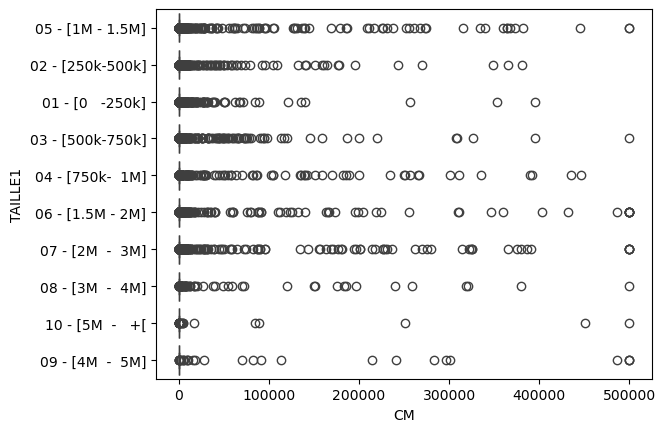

In [ ]:
sns.boxplot(x="CM",y="TAILLE1", data = train.join(train_output.drop(["ID","ANNEE_ASSURANCE"],axis = 1))[train_output["CM"]>=0],orient='h')
plt.title("Charge en fonction de la taille de risque 1")

<Axes: xlabel='CM', ylabel='TAILLE1'>

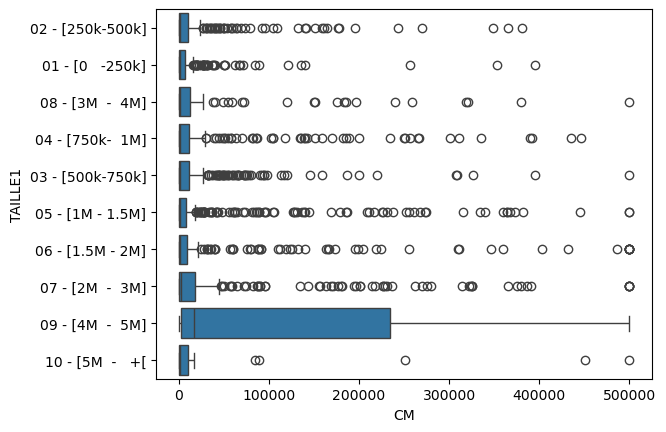

In [ ]:
# CM en focntion de la taille du risk 1 et CM > 0 
sns.boxplot(x="CM",y="TAILLE1", data = train.join(train_output.drop(["ID","ANNEE_ASSURANCE"],axis = 1))[train_output["CM"]>0],orient='h')
plt.title("Charge en fonction de la taille de risque quand charge > 0")

<Axes: xlabel='FREQ', ylabel='TAILLE1'>

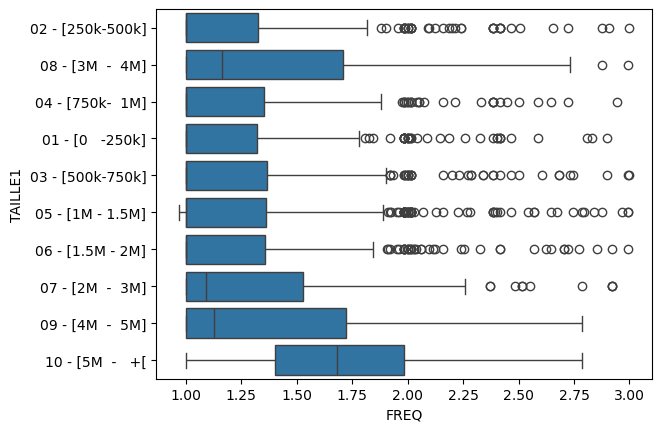

In [ ]:
# FREQ en focntion de la taille du risk 1 et freq < 3 et >0

sns.boxplot(x="FREQ",y="TAILLE1"
            , data = train.join(train_output.drop(["ID","ANNEE_ASSURANCE"],axis = 1))[(train_output["FREQ"]>0) &(train_output["FREQ"]<=3) ]
            ,orient='h')

plt.title("Frequence en fonction de la taille de risque 1 quand quand la 0 < fréquence < 3")

<Axes: xlabel='FREQ', ylabel='TAILLE1'>

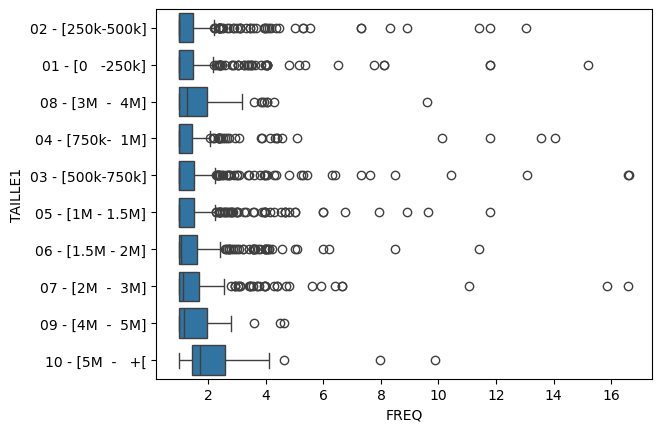

In [ ]:
# FREQ en focntion de la taille du risk 2 et freq < 3 et >0
sns.boxplot(x="FREQ",y="TAILLE1"
            , data = train.join(train_output.drop(["ID","ANNEE_ASSURANCE"],axis = 1))[(train_output["FREQ"]>0) &(train_output["FREQ"]<=20) ]
            ,orient='h')
plt.title("Frequence en fonction de la taille de risque 1 quand quand la 0 < fréquence < 20")

# conserver les freq d'incident 9 ?


In [101]:
train.TAILLE1.value_counts(normalize=False,dropna=False)

TAILLE1
01 - [0   -250k]    126652
02 - [250k-500k]     79214
03 - [500k-750k]     50552
05 - [1M - 1.5M]     42991
04 - [750k-  1M]     34424
06 - [1.5M - 2M]     23073
07 - [2M  -  3M]     18786
08 - [3M  -  4M]      5113
09 - [4M  -  5M]      1777
10 - [5M  -   +[      1028
Name: count, dtype: int64

In [102]:
train.TAILLE2.value_counts(normalize=False,dropna=False)

TAILLE2
03 - [250k-500k]    95799
02 - [100k-250k]    86531
01 - [0   -100k]    66538
04 - [500k-750k]    55253
05 - [750k-  1M]    32244
06 - [1M  -1.5M]    29714
07 - [1.5M-  2M]    11174
08 - [2M  -2.5M]     3426
09 - [2.5M-    ]     2918
10 -                   13
Name: count, dtype: int64

<Axes: xlabel='CM', ylabel='TAILLE2'>

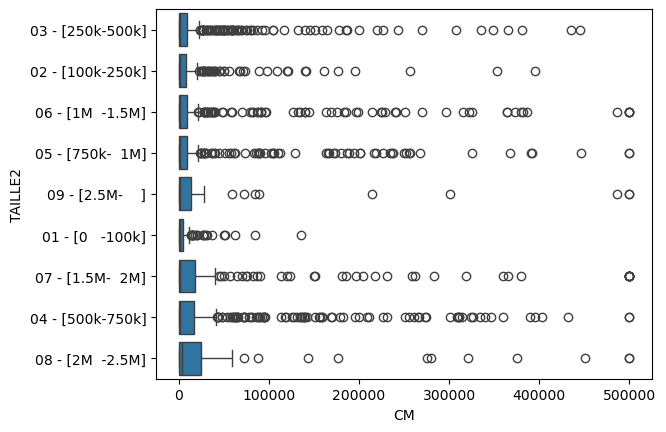

In [ ]:
# CM en focntion de la taille du risk 2 et CM > 0 
sns.boxplot(x="CM",y="TAILLE2"
            , data = train.join(train_output.drop(["ID","ANNEE_ASSURANCE"],axis = 1))[train_output["CM"]>0]
            ,orient='h')

plt.title("Frequence en fonction de la taille de risque 2 quand CM > 0")

<Axes: xlabel='FREQ', ylabel='TAILLE2'>

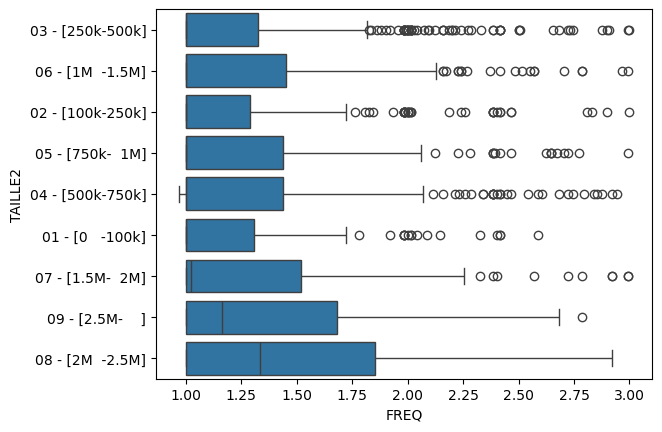

In [ ]:
# FREQ en focntion de la taille du risk 2 et freq < 3 et >0
sns.boxplot(x="FREQ",y="TAILLE2"
            , data = train.join(train_output.drop(["ID","ANNEE_ASSURANCE"],axis = 1))[(train_output["FREQ"]>0) &(train_output["FREQ"]<=3) ]
            ,orient='h')

plt.title("Frequence en fonction de la taille de risque 1 quand quand la 0 < fréquence < 3")


<Axes: xlabel='FREQ', ylabel='TAILLE2'>

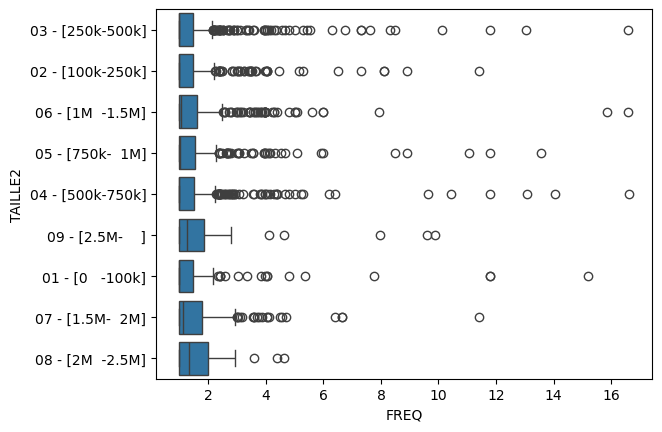

In [ ]:
# FREQ en focntion de la taille du risk 2 et freq < 3 et >0
sns.boxplot(x="FREQ",y="TAILLE2"
            , data = train.join(train_output.drop(["ID","ANNEE_ASSURANCE"],axis = 1))[(train_output["FREQ"]>0) &(train_output["FREQ"]<=20) ]
            ,orient='h')
plt.title("Frequence en fonction de la taille de risque 1 quand quand la 0 < fréquence < 20")


## Nettoyage des cibles

In [10]:
train_output.describe()
# valeur négative dans CM
# grande range de valeur pour Frq et CM

ID           FREQ             CM  ANNEE_ASSURANCE  \
count  383610.000000  383610.000000  383610.000000    383610.000000   
mean   191805.500000       0.012452     182.521632         0.701557   
std    110738.812719       0.357127    6699.967429         0.352375   
min         1.000000       0.000000   -5751.000000         0.002732   
25%     95903.250000       0.000000       0.000000         0.389041   
50%    191805.500000       0.000000       0.000000         0.882192   
75%    287707.750000       0.000000       0.000000         1.000000   
max    383610.000000     182.499998  500000.000000         2.000000   

              CHARGE  
count  383610.000000  
mean      186.087058  
std      6800.490328  
min     -5751.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max    552000.000000

In [11]:
train_output = abs(train_output)
train_output.describe()

ID           FREQ             CM  ANNEE_ASSURANCE  \
count  383610.000000  383610.000000  383610.000000    383610.000000   
mean   191805.500000       0.012452     182.593925         0.701557   
std    110738.812719       0.357127    6699.965459         0.352375   
min         1.000000       0.000000       0.000000         0.002732   
25%     95903.250000       0.000000       0.000000         0.389041   
50%    191805.500000       0.000000       0.000000         0.882192   
75%    287707.750000       0.000000       0.000000         1.000000   
max    383610.000000     182.499998  500000.000000         2.000000   

              CHARGE  
count  383610.000000  
mean      186.159351  
std      6800.488350  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max    552000.000000

In [39]:
# vérifie que si FREQ = 0 alors CM = 0
train_output[(train_output["CM"]>0)&(train_output["FREQ"]==0)]


Empty DataFrame
Columns: [ID, FREQ, CM, ANNEE_ASSURANCE, CHARGE]
Index: []

In [40]:
# fréquence d'incident positif mais CM nul
train_output[(train_output["CM"]==0)&(train_output["FREQ"]>0)]
# considérer que c'est une erreur dans les données ou pas ?

ID      FREQ   CM  ANNEE_ASSURANCE  CHARGE
665        666  1.000000  0.0         1.000000     0.0
1150      1151  1.092814  0.0         0.915068     0.0
1317      1318  1.000000  0.0         1.000000     0.0
1525      1526  1.834171  0.0         0.545205     0.0
1744      1745  1.000000  0.0         1.000000     0.0
...        ...       ...  ...              ...     ...
372374  372375  1.000000  0.0         1.000000     0.0
374185  374186  1.000000  0.0         1.000000     0.0
378044  378045  1.048851  0.0         0.953425     0.0
378206  378207  1.000000  0.0         1.000000     0.0
381473  381474  1.477733  0.0         0.676712     0.0

[536 rows x 5 columns]

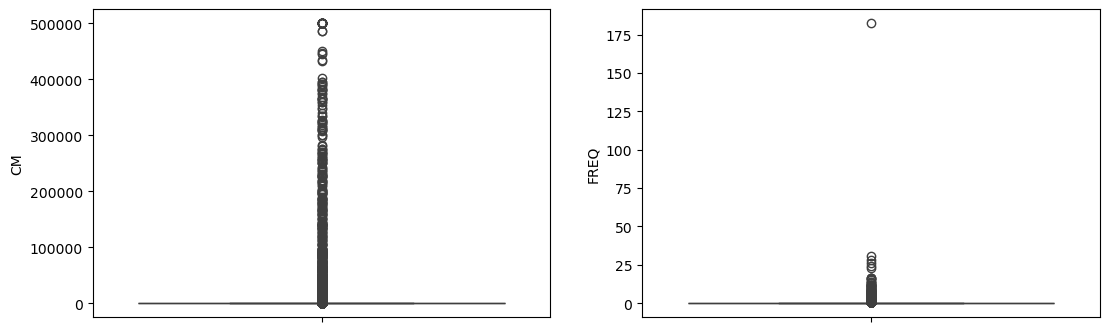

In [19]:
plt.figure(figsize=(13,4))

plt.subplot(121)
sns.boxplot(train_output["CM"])

plt.subplot(122)
sns.boxplot(train_output["FREQ"])

plt.show()

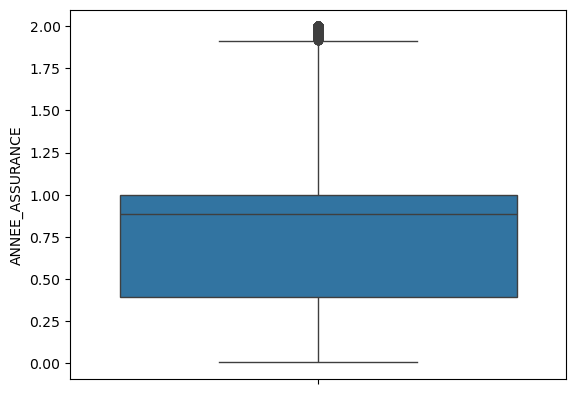

In [55]:
sns.boxplot(train_output["ANNEE_ASSURANCE"]);


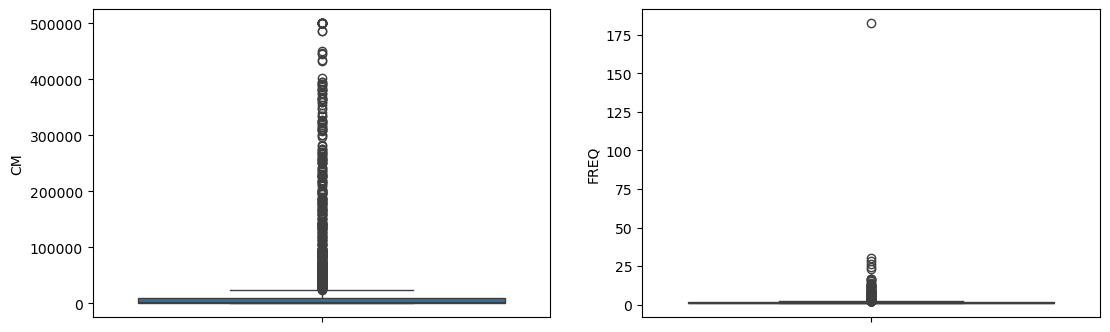

In [21]:
plt.figure(figsize=(13,4))

plt.subplot(121)
sns.boxplot(train_output["CM"][train_output["CM"]>0])

plt.subplot(122)
sns.boxplot(train_output["FREQ"][train_output["FREQ"]>0])

plt.show()

<span style="font-size:15px">

Les variables sont extrêmement dispersées

</span>

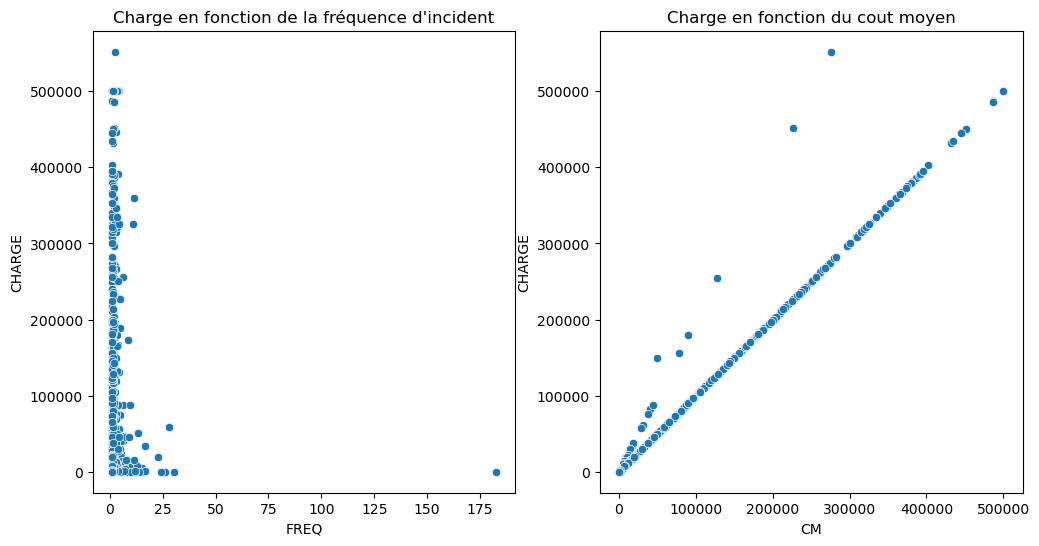

In [29]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.scatterplot(x= "FREQ",y="CHARGE", data = train_output[train_output["FREQ"]>0] )
plt.title("Charge en fonction de la fréquence d'incident")

plt.subplot(122)
sns.scatterplot(x= "CM",y="CHARGE", data = train_output[train_output["FREQ"]>0] )
plt.title("Charge en fonction du cout moyen");

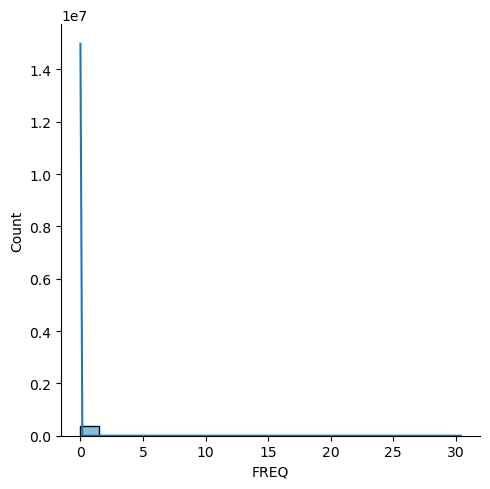

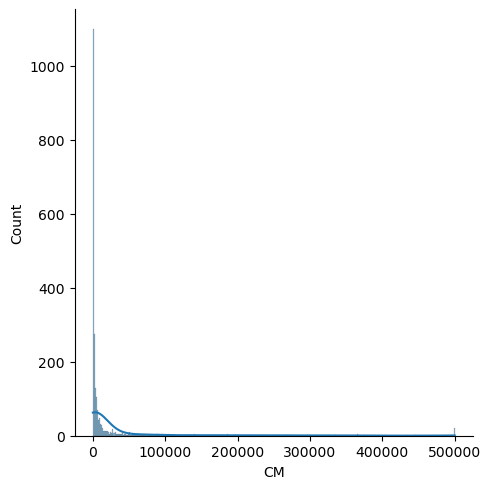

In [35]:
sns.displot(train_output["FREQ"][train_output["FREQ"]<50],kde=True)

sns.displot(train_output["CM"][train_output["CM"]>0],kde=True);

In [ ]:
# transformation box-cox sur CM et FREQ pour obtenir des distributions plus ou moins normales
from scipy.stats import boxcox
from scipy.special import inv_boxcox

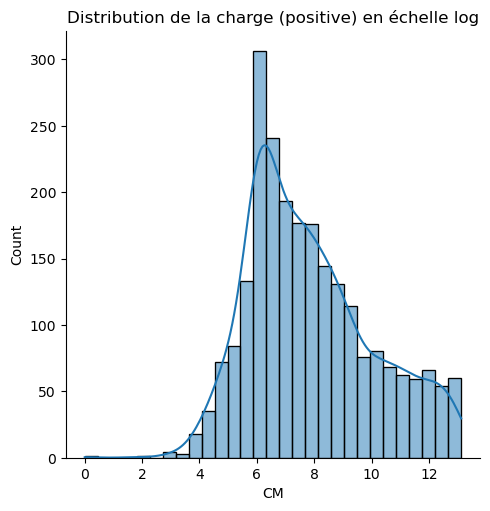

In [47]:
# log de CM exclu 0
sns.displot(np.log(train_output["CM"][train_output["CM"]>0]),kde=True)
plt.title("Distribution de la charge (positive) en échelle log");

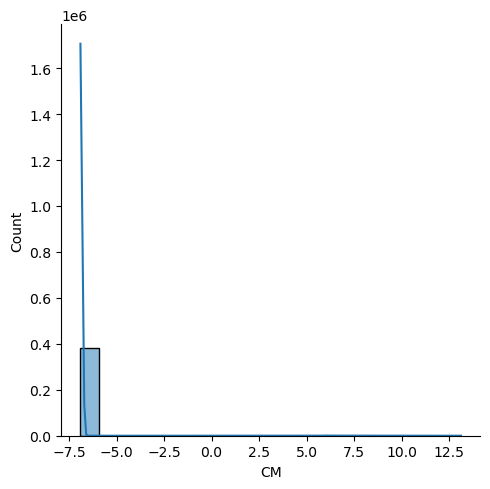

In [45]:
# log de CM ajout decémil pour évite 0
sns.displot(np.log(train_output["CM"]+0.001),kde=True);

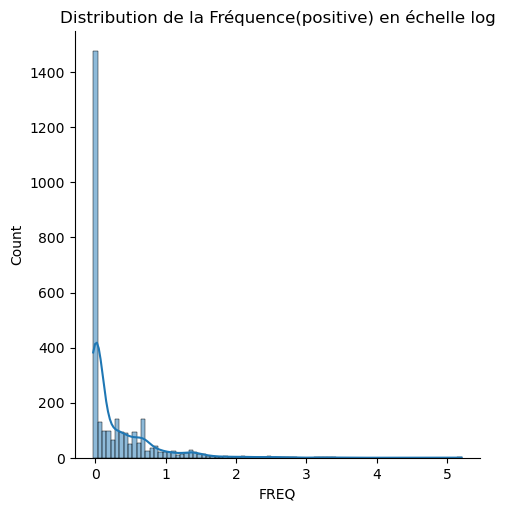

In [49]:
# log de FREQ exclu 0
sns.displot(np.log(train_output["FREQ"][train_output["FREQ"]>0]),kde=True)
plt.title("Distribution de la Fréquence(positive) en échelle log");

#### **gestion des outliers**

In [58]:
from scipy.stats import median_abs_deviation,iqr

Explore les outliers supérieur avec méthode IQR et MAD

In [68]:
# FREQ = nb_sinitre / ANNE ASSURANCE
# Quand l'annee d'assurance est inf à 1 ==> tres grande valeur même si un seul sinistre
# on calcule de nombre de sinistre
train_output["NbSinistre"] = train_output["ANNEE_ASSURANCE"]*train_output["FREQ"]
train_output.describe()

ID           FREQ             CM  ANNEE_ASSURANCE  \
count  383610.000000  383610.000000  383610.000000    383610.000000   
mean   191805.500000       0.012452     182.593925         0.701557   
std    110738.812719       0.357127    6699.965459         0.352375   
min         1.000000       0.000000       0.000000         0.002732   
25%     95903.250000       0.000000       0.000000         0.389041   
50%    191805.500000       0.000000       0.000000         0.882192   
75%    287707.750000       0.000000       0.000000         1.000000   
max    383610.000000     182.499998  500000.000000         2.000000   

              CHARGE     NbSinistre  
count  383610.000000  383610.000000  
mean      186.159351       0.007831  
std      6800.488350       0.091654  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max    552000.000000       5.000000

In [69]:
train_output[(train_output["ANNEE_ASSURANCE"]<0.08356164384999998) &(train_output["FREQ"]>0)]

ID        FREQ        CM  ANNEE_ASSURANCE    CHARGE  NbSinistre
4508      4509   13.035714    670.00         0.076712    670.00         1.0
18611    18612   16.590909    890.00         0.060274    890.00         1.0
25331    25332   26.071429     48.00         0.038356     48.00         1.0
33093    33094   15.869565    120.00         0.063014    120.00         1.0
36402    36403   15.208333   5520.00         0.065753   5520.00         1.0
76191    76192   16.590909   1110.00         0.060274   1110.00         1.0
77050    77051   22.812500  18920.57         0.043836  18920.57         1.0
80589    80590   30.416667      0.00         0.032877      0.00         1.0
103864  103865   28.153846  59033.90         0.035519  59033.90         1.0
116544  116545   13.071429   7866.58         0.076503   7866.58         1.0
134919  134920   14.038462    100.00         0.071233    100.00         1.0
150095  150096  182.499998    203.23         0.005479    203.23         1.0
238976  238977   24.400000      0.00         0.040984      0.00         1.0
251309  251310   16.636364  33636.00         0.060109  33636.00         1.0
251641  251642   13.555556  51407.84         0.073770  51407.84         1.0

In [70]:
train_output[train_output.FREQ >2]
# FREQ = nb_sinitre / ANNE ASSURANCE
# Quand l'annee d'assurance est inf à 1 ==> tres grande valeur même si un seul sinistre

ID      FREQ        CM  ANNEE_ASSURANCE    CHARGE  NbSinistre
424        425  3.258929  22470.51         0.306849  22470.51         1.0
1161      1162  2.239264  35822.81         0.446575  35822.81         1.0
1624      1625  3.364055   3540.99         0.594521   7081.98         2.0
1832      1833  9.605263   1378.33         0.104110   1378.33         1.0
2164      2165  2.588652    670.00         0.386301    670.00         1.0
...        ...       ...       ...              ...       ...         ...
373915  373916  2.851563  13155.89         0.350685  13155.89         1.0
374838  374839  3.119658   5441.00         0.320548   5441.00         1.0
375716  375717  4.147727  30359.00         0.241096  30359.00         1.0
378985  378986  3.967391   1600.00         0.252055   1600.00         1.0
382462  382463  4.195402  46054.00         0.238356  46054.00         1.0

[407 rows x 6 columns]

In [78]:
# check si lignes où la charge ne correspond pas à CM*Freq*Annee_Assurance
train_output[train_output["CHARGE"] != (train_output["CM"]*train_output["FREQ"]*train_output["ANNEE_ASSURANCE"]).round(2)]


Empty DataFrame
Columns: [ID, FREQ, CM, ANNEE_ASSURANCE, CHARGE, NbSinistre]
Index: []

In [80]:
# comme il a y beaucoup 0 les stats de CM et FREQ sont de 0. Donc pour calculer les outlier on exclu les 0

for col in train_output[["CM","FREQ"]] :
    print(col)
    print(col,"outlier sup MAD (sans 0)", np.median(train_output[col][train_output[col]>0]) + 3.5*median_abs_deviation(train_output[col][train_output[col]>0]))
    print(col,"outlier sup IQR (sans 0)", np.quantile(train_output[col][train_output[col]>0],0.75) + 1.5*iqr(train_output[col][train_output[col]>0]))
    print(col,"outlier sup std (sans 0)", np.mean(train_output[col][train_output[col] >0]) + 2* np.std(train_output[col][train_output[col] >0]))
    print(col,"outlier sup std (avec 0)", np.mean(train_output[col]) + 2* np.std(train_output[col]),"\n")

CM
CM outlier sup MAD (sans 0) 7146.324999999999
CM outlier sup IQR (sans 0) 24244.63875
CM outlier sup std (sans 0) 190027.83630142178
CM outlier sup std (avec 0) 13582.507377979686 

FREQ
FREQ outlier sup MAD (sans 0) 1.0061813186193362
FREQ outlier sup IQR (sans 0) 2.382978723635582
FREQ outlier sup std (sans 0) 9.187660016656364
FREQ outlier sup std (avec 0) 0.7267045012098446 



In [82]:
# outlier sup des cibles pour differentes méthodes

for col in train_output[["CM","FREQ"]] :
    print(col)
    print(col,"outlier sup MAD 3.5 ", np.median(train_output[col][train_output[col]>0]) + 3.5*median_abs_deviation(train_output[col][train_output[col]>0]))
    print(col,"outlier sup MAD 3 ", np.median(train_output[col][train_output[col]>0]) + 3*median_abs_deviation(train_output[col][train_output[col]>0]))
    print(col,"outlier sup MAD 3.29 ", np.median(train_output[col][train_output[col]>0]) + 3.29*median_abs_deviation(train_output[col][train_output[col]>0]))
    
    print(col,"outlier sup IQR 1.5 ", np.quantile(train_output[col][train_output[col]>0],0.75) + 1.5*iqr(train_output[col][train_output[col]>0]))
    print(col,"outlier sup IQR 3 ", np.quantile(train_output[col][train_output[col]>0],0.75) + 3*iqr(train_output[col][train_output[col]>0]))

    print(col,"outlier sup std 2 ", np.mean(train_output[col][train_output[col] >0]) + 2* np.std(train_output[col][train_output[col] >0]))
    print(col,"outlier sup std 2.5 ", np.mean(train_output[col][train_output[col] >0]) + 2.5* np.std(train_output[col][train_output[col] >0]))
    print(col,"outlier sup std 3 ", np.mean(train_output[col][train_output[col] >0]) + 3* np.std(train_output[col][train_output[col] >0]),"\n")

CM
CM outlier sup MAD 3.5  7146.324999999999
CM outlier sup MAD 3  6380.65
CM outlier sup MAD 3.29  6824.7415
CM outlier sup IQR 1.5  24244.63875
CM outlier sup IQR 3  38500.4925
CM outlier sup std 2  190027.83630142178
CM outlier sup std 2.5  230108.49601934155
CM outlier sup std 3  270189.1557372613 

FREQ
FREQ outlier sup MAD 3.5  1.0061813186193362
FREQ outlier sup MAD 3  1.00549450543941
FREQ outlier sup MAD 3.29  1.0058928570837673
FREQ outlier sup IQR 1.5  2.382978723635582
FREQ outlier sup IQR 3  3.2127659578169316
FREQ outlier sup std 2  9.187660016656364
FREQ outlier sup std 2.5  11.071941792617517
FREQ outlier sup std 3  12.956223568578668 



In [ ]:
### virer les outliers de FREQ et CM
# CM 24244.63875


#  outlier std : 9.18
freq_out_std = np.mean(train_output["FREQ"][train_output["FREQ"] >0]) + 2* np.std(train_output["FREQ"][train_output["FREQ"] >0]) #  9.18
# outlier IQR 1.5  : 2.38
freq_out_iqr = np.quantile(train_output["FREQ"][train_output["FREQ"]>0],0.75) + 1.5*iqr(train_output["FREQ"][train_output["FREQ"]>0]) 

# outlier iqr 1.5 : 24244
cm_out_iqr = np.quantile(train_output["CM"][train_output["CM"]>0],0.75) + 1.5*iqr(train_output["CM"][train_output["CM"]>0]) # 24244.63875
# outlier std 2 : 190027
cm_out_std = np.mean(train_output["CM"][train_output["CM"] >0]) + 2* np.std(train_output["CM"][train_output["CM"] >0]) # 190027.83630142178

In [84]:
# si valeur inf à limite on met NA
CM_IQR = [cm if cm <= cm_out_iqr else np.nan for cm in train_output["CM"]]
CM_STD = [cm if cm <= cm_out_std else np.nan for cm in train_output["CM"]]

FREQ_STD = [frq if frq <= freq_out_std else np.nan for frq in train_output["FREQ"]]
FREQ_IQR = [frq if frq <= freq_out_iqr else np.nan for frq in train_output["FREQ"]]


In [85]:
train_output["CM_IQR"] = CM_IQR
train_output["CM_STD"] = CM_STD

train_output["FREQ_STD"] = FREQ_STD
train_output["FREQ_IQR"] = FREQ_IQR

train_output.describe()

ID  FREQ   CM  ANNEE_ASSURANCE  CHARGE  NbSinistre  CM_IQR  CM_STD  \
0   1   0.0  0.0         1.000000     0.0         0.0     0.0     0.0   
1   2   0.0  0.0         1.000000     0.0         0.0     0.0     0.0   
2   3   0.0  0.0         0.402740     0.0         0.0     0.0     0.0   
3   4   0.0  0.0         0.246575     0.0         0.0     0.0     0.0   
4   5   0.0  0.0         0.838356     0.0         0.0     0.0     0.0   

   FREQ_STD  FREQ_IQR  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  
4       0.0       0.0

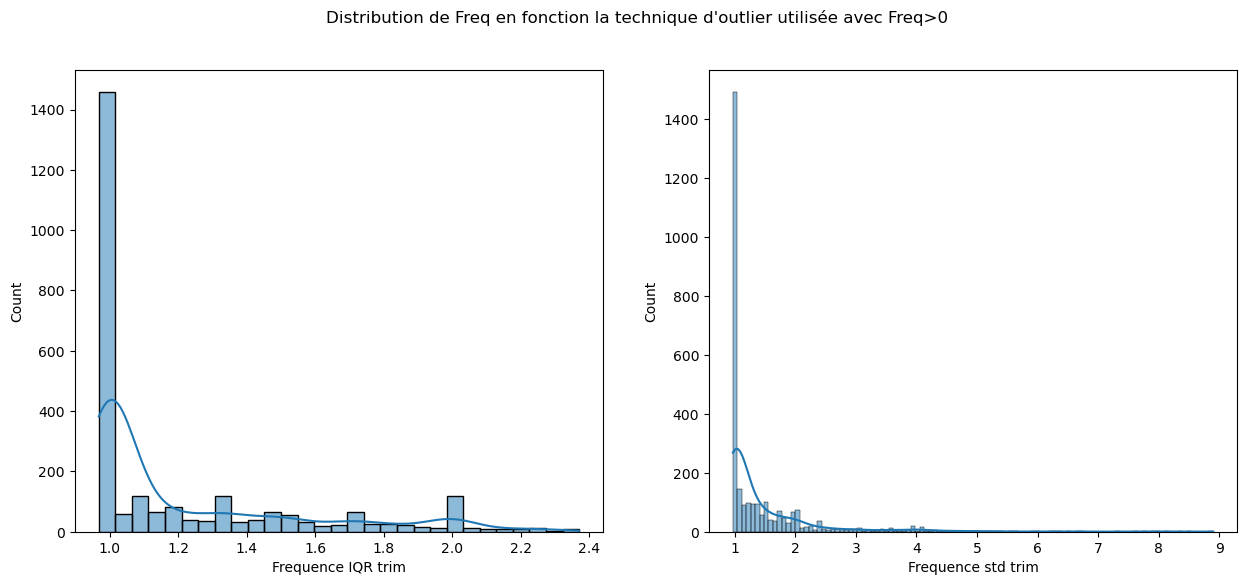

In [101]:
plt.figure(figsize=(15,6))
plt.suptitle("Distribution de Freq en fonction la technique d'outlier utilisée avec Freq>0")
plt.subplot(121)
sns.histplot((train_output["FREQ_IQR"][train_output["FREQ_IQR"]>0]),kde=True)
plt.xlabel("Frequence IQR trim")
plt.subplot(122)
sns.histplot((train_output["FREQ_STD"][train_output["FREQ_STD"]>0]),kde=True)
plt.xlabel("Frequence std trim")

plt.show()

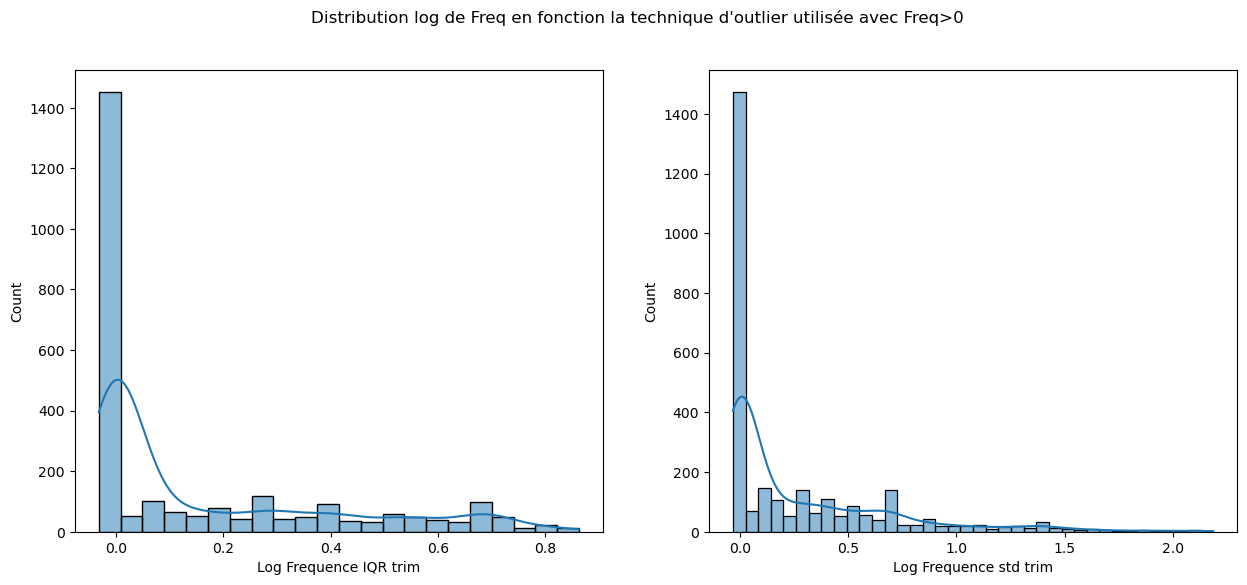

In [102]:
plt.figure(figsize=(15,6))

plt.suptitle("Distribution log de Freq en fonction la technique d'outlier utilisée avec Freq>0")
plt.subplot(121)
sns.histplot(np.log(train_output["FREQ_IQR"][train_output["FREQ_IQR"]>0]),kde=True)
plt.xlabel("Log Frequence IQR trim")

plt.subplot(122)
sns.histplot(np.log(train_output["FREQ_STD"][train_output["FREQ_STD"]>0]),kde=True)
plt.xlabel("Log Frequence std trim")

plt.show()

## Nettoyage de X

### nettoyage de rose

In [180]:
rose.head()

ACTIVIT2 VOCATION  TYPERS  ANCIENNETE ADOSS CARACT1  CARACT2 CARACT3 INDEM1  \
0     ACT1     VOC6       1           0     N       N      NaN     NaN      N   
1     ACT1     VOC6       1           0     N       N      NaN     NaN      N   
2     ACT1     VOC6       1           2     N       R      NaN     NaN      N   
3     ACT1     VOC6       2           0     N       N      NaN     NaN      N   
4     ACT1     VOC6       2           1     N       N      NaN     NaN      N   

   DUREE_REQANEUF  ... CARACT5  TYPBAT1  INDEM2 TYPBAT2  FRCH1 FRCH2  \
0             NaN  ...       0      NaN  CLASS5       0      2   NaN   
1             NaN  ...       0      NaN  CLASS6       0      1   NaN   
2             NaN  ...       0      NaN  CLASS6       0      1   NaN   
3             NaN  ...       0      NaN  CLASS8       0      1   NaN   
4             NaN  ...       0      NaN  CLASS9       0      1   NaN   

  ANNEE_ASSURANCE  ESPINSEE AN_EXERC ZONE  
0        1.000000       NaN   ANNEE5    3  
1        1.000000       NaN   ANNEE5    3  
2        0.402740       NaN   ANNEE5    3  
3        0.246575       NaN   ANNEE5    3  
4        0.838356       NaN   ANNEE5    3  

[5 rows x 21 columns]

In [184]:
rose.columns

Index(['ACTIVIT2', 'VOCATION', 'TYPERS', 'ANCIENNETE', 'ADOSS', 'CARACT1',
       'CARACT2', 'CARACT3', 'INDEM1', 'DUREE_REQANEUF', 'CARACT4', 'CARACT5',
       'TYPBAT1', 'INDEM2', 'TYPBAT2', 'FRCH1', 'FRCH2', 'ANNEE_ASSURANCE',
       'ESPINSEE', 'AN_EXERC', 'ZONE'],
      dtype='object')

In [107]:
rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383610 entries, 0 to 383609
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ACTIVIT2         383610 non-null  object 
 1   VOCATION         383610 non-null  object 
 2   TYPERS           383610 non-null  int64  
 3   ANCIENNETE       383610 non-null  int64  
 4   ADOSS            383610 non-null  object 
 5   CARACT1          378977 non-null  object 
 6   CARACT2          15326 non-null   float64
 7   CARACT3          15326 non-null   object 
 8   INDEM1           383610 non-null  object 
 9   DUREE_REQANEUF   357037 non-null  float64
 10  CARACT4          383610 non-null  object 
 11  CARACT5          383610 non-null  int64  
 12  TYPBAT1          30274 non-null   object 
 13  INDEM2           356238 non-null  object 
 14  TYPBAT2          383610 non-null  int64  
 15  FRCH1            383610 non-null  object 
 16  FRCH2            357037 non-null  obje

In [19]:
rose.describe()

TYPERS     ANCIENNETE       CARACT2  DUREE_REQANEUF  \
count  383610.000000  383610.000000  15326.000000   357037.000000   
mean        1.665368       5.175517      1.019053        2.200483   
std         0.471862       3.823097      0.136714        1.300343   
min         1.000000       0.000000      1.000000        0.000000   
25%         1.000000       2.000000      1.000000        2.000000   
50%         2.000000       5.000000      1.000000        2.000000   
75%         2.000000       9.000000      1.000000        2.000000   
max         2.000000      11.000000      2.000000       10.000000   

             CARACT5        TYPBAT2  ANNEE_ASSURANCE           ZONE  
count  383610.000000  383610.000000    383610.000000  383610.000000  
mean        0.076515       1.061711         0.701557      49.046876  
std         0.420928       0.831133         0.352375      27.919867  
min         0.000000       0.000000         0.002732       1.000000  
25%         0.000000       0.000000         0.389041      25.000000  
50%         0.000000       1.000000         0.882192      49.000000  
75%         0.000000       2.000000         1.000000      73.000000  
max        20.000000       2.000000         2.000000      95.000000

In [108]:
rose.isna().sum()

ACTIVIT2                0
VOCATION                0
TYPERS                  0
ANCIENNETE              0
ADOSS                   0
CARACT1              4633
CARACT2            368284
CARACT3            368284
INDEM1                  0
DUREE_REQANEUF      26573
CARACT4                 0
CARACT5                 0
TYPBAT1            353336
INDEM2              27372
TYPBAT2                 0
FRCH1                   0
FRCH2               26573
ANNEE_ASSURANCE         0
ESPINSEE           151542
AN_EXERC                0
ZONE                    0
dtype: int64

In [181]:
#colonnne ou + de 50% de NA
col_nans_rose = rose.isna().mean()[rose.isna().mean() > 0.50].index
# faire avec simple imputer

In [109]:
# afficher les valeurs unique pour toute les colonnes
for i in rose.columns :
    print(train[i].value_counts())

# typer = obj
# caract 2 = int puis obj
# caract 5 = obj
# typebat 2 = obj
# frch1 et 2 corrigé valeur
# zone = obj

ACTIVIT2
ACT1    296563
ACT5     53709
ACT2     14359
ACT8      5650
ACT3      5335
ACT9      4459
ACT7      2201
ACT6      1007
ACT4       327
Name: count, dtype: int64
VOCATION
VOC6    244441
VOC8     67446
VOC7     38967
VOC4     15289
VOC1     14359
VOC2      1952
VOC3      1081
VOC5        75
Name: count, dtype: int64
TYPERS
2    255242
1    128368
Name: count, dtype: int64
ANCIENNETE
11    61239
0     49545
1     38549
2     35612
3     33038
4     30286
5     27594
6     25226
7     23305
8     21489
9     19923
10    17804
Name: count, dtype: int64
ADOSS
N    375557
O      8053
Name: count, dtype: int64
CARACT1
N    274335
R     93158
O     11484
Name: count, dtype: int64
CARACT2
1.0    15034
2.0      292
Name: count, dtype: int64
CARACT3
N    7433
O    6795
R    1098
Name: count, dtype: int64
INDEM1
N    365728
O     17882
Name: count, dtype: int64
DUREE_REQANEUF
2.0     331032
5.0       9100
0.0       9096
10.0      7809
Name: count, dtype: int64
CARACT4
absence de surface   

In [110]:
# change le type des colonnes
#typer = obj
# caract 2 = int puis obj
# caract 5 = obj
# typebat 2 = obj
# frch1 et 2 corrigé valeur
# zone = obj
train = train.astype({"TYPERS" : "object",
              "CARACT2" : "object",
              "CARACT5" : "object",
              "TYPBAT2" : "object",
              "ZONE" : "object"})

rose = rose.astype({"TYPERS" : "object",
              "CARACT2" : "object",
              "CARACT5" : "object",
              "TYPBAT2" : "object",
              "ZONE" : "object"})


In [111]:
rose.FRCH1.value_counts()


FRCH1
0    169031
1    102148
0     73268
1     24697
2      9894
3      2185
2      1899
3       424
i        64
Name: count, dtype: int64

In [112]:
# corrige les modalités
rose.FRCH1 = np.where(rose.FRCH1 == "i",rose.FRCH1.mode()[0],rose.FRCH1)
train.FRCH1 = np.where(train.FRCH1 == "i",train.FRCH1.mode()[0],train.FRCH1)

In [113]:
rose.FRCH1.value_counts()

FRCH1
0    169095
1    102148
0     73268
1     24697
2      9894
3      2185
2      1899
3       424
Name: count, dtype: int64

In [115]:
# rassemble les modalités
rose.FRCH1 = rose.FRCH1.astype("int").astype("object")

train.FRCH1 = train.FRCH1.astype("int").astype("object")
rose.FRCH1.value_counts()

FRCH1
0    242363
1    126845
2     11793
3      2609
Name: count, dtype: int64

In [24]:
train[rose.columns].dtypes

ACTIVIT2            object
VOCATION            object
TYPERS              object
ANCIENNETE           int64
ADOSS               object
CARACT1             object
CARACT2             object
CARACT3             object
INDEM1              object
DUREE_REQANEUF     float64
CARACT4             object
CARACT5             object
TYPBAT1             object
INDEM2              object
TYPBAT2             object
FRCH1               object
FRCH2               object
ANNEE_ASSURANCE    float64
ESPINSEE            object
AN_EXERC            object
ZONE                object
dtype: object

In [117]:
### définir fonction pour les changement à faire sur le test

def rose_clean(df) : 
    
    df.FRCH1 = np.where(df.FRCH1 == "i",df.FRCH1.mode()[0],df.FRCH1)
    df.FRCH1 = np.where(df.FRCH1 == "i",df.FRCH1.mode()[0],df.FRCH1)
    df.FRCH1 = df.FRCH1.astype("int").astype("object")

    # modif le type des variables
    df = df.astype({"TYPERS" : "object",
              "CARACT2" : "object",
              "CARACT5" : "object",
              "TYPBAT2" : "object",
              "ZONE" : "object"})
        
    return df
     

In [118]:
train = rose_clean(train)

In [119]:
rose.isna().sum()/len(rose)

ACTIVIT2           0.000000
VOCATION           0.000000
TYPERS             0.000000
ANCIENNETE         0.000000
ADOSS              0.000000
CARACT1            0.012077
CARACT2            0.960048
CARACT3            0.960048
INDEM1             0.000000
DUREE_REQANEUF     0.069271
CARACT4            0.000000
CARACT5            0.000000
TYPBAT1            0.921081
INDEM2             0.071354
TYPBAT2            0.000000
FRCH1              0.000000
FRCH2              0.069271
ANNEE_ASSURANCE    0.000000
ESPINSEE           0.395042
AN_EXERC           0.000000
ZONE               0.000000
dtype: float64

In [235]:
rose.isna().mean()[rose.isna().mean() >= 0.50].index
# colonne ou 50% ou plus de NA (assume que valeur manquante = absence de caractéristique)

Index(['CARACT2', 'CARACT3', 'TYPBAT1'], dtype='object')

### nettoyage de derog

In [ ]:
# contient colonne dérogation tarifaires

In [120]:
derog.head()

DEROG1 DEROG2 DEROG3 DEROG4 DEROG5 DEROG6 DEROG7 DEROG8 DEROG9 DEROG10  \
0      N      N      N      N      N      N      N      N      N       N   
1      N      N      N      N      N      N      N      N      N       N   
2      N      N      N      N      N      N      N      N      N       N   
3      N      O      N      N      N      N      N      N      N       N   
4      N      N      N      N      N      N      N      N      N       N   

  DEROG11 DEROG12 DEROG13 DEROG14  DEROG15 DEROG16  
0       N     NaN     NaN     NaN    100.0     NaN  
1       N     NaN     NaN     NaN    100.0     NaN  
2       N     NaN     NaN     NaN    100.0     NaN  
3       N     NaN     NaN     NaN    100.0     NaN  
4       N     NaN     NaN     NaN    100.0     NaN

In [244]:
derog.columns

Index(['DEROG1', 'DEROG2', 'DEROG3', 'DEROG4', 'DEROG5', 'DEROG6', 'DEROG7',
       'DEROG8', 'DEROG9', 'DEROG10', 'DEROG11', 'DEROG12', 'DEROG13',
       'DEROG14', 'DEROG15', 'DEROG16'],
      dtype='object')

In [197]:
derog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383610 entries, 0 to 383609
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DEROG1   383610 non-null  object 
 1   DEROG2   383610 non-null  object 
 2   DEROG3   383610 non-null  object 
 3   DEROG4   383610 non-null  object 
 4   DEROG5   383610 non-null  object 
 5   DEROG6   383610 non-null  object 
 6   DEROG7   383610 non-null  object 
 7   DEROG8   383610 non-null  object 
 8   DEROG9   383610 non-null  object 
 9   DEROG10  383610 non-null  object 
 10  DEROG11  383610 non-null  object 
 11  DEROG12  34532 non-null   object 
 12  DEROG13  1293 non-null    object 
 13  DEROG14  8 non-null       object 
 14  DEROG15  383610 non-null  float64
 15  DEROG16  3252 non-null    object 
dtypes: float64(1), object(15)
memory usage: 46.8+ MB


In [121]:
for i in derog.columns :
    print(derog[i].value_counts(dropna=False,normalize=False))


DEROG1
N    383529
O        81
Name: count, dtype: int64
DEROG2
N    370561
O     13049
Name: count, dtype: int64
DEROG3
N    375624
O      7986
Name: count, dtype: int64
DEROG4
N    359142
O     24468
Name: count, dtype: int64
DEROG5
N    365019
O     18591
Name: count, dtype: int64
DEROG6
N    381612
O      1998
Name: count, dtype: int64
DEROG7
N    382831
O       779
Name: count, dtype: int64
DEROG8
N    375707
O      7903
Name: count, dtype: int64
DEROG9
N    381410
O      2200
Name: count, dtype: int64
DEROG10
N    382150
O      1460
Name: count, dtype: int64
DEROG11
N    378858
O      4752
Name: count, dtype: int64
DEROG12
NaN    349078
D12     26823
D18      4326
D03      1857
D04       840
D35       686
Name: count, dtype: int64
DEROG13
NaN    382317
D12       714
D18       567
D35        12
Name: count, dtype: int64
DEROG14
NaN    383602
D18         8
Name: count, dtype: int64
DEROG15
100.0    383575
70.0         35
Name: count, dtype: int64
DEROG16
NaN    380358
SA       1676

In [ ]:
#derog 13,14,15, 16?  peu de variation conserve pour l'instant 
# à voir avec CM>0 et freq>0

In [123]:
# propotion de valeurs quand CM > 0
for i in derog.columns :
    print(train[train_output["CM"]>0][i].value_counts(dropna=False))


DEROG1
N    2354
O       4
Name: count, dtype: int64
DEROG2
N    2226
O     132
Name: count, dtype: int64
DEROG3
N    2347
O      11
Name: count, dtype: int64
DEROG4
N    2050
O     308
Name: count, dtype: int64
DEROG5
N    2123
O     235
Name: count, dtype: int64
DEROG6
N    2326
O      32
Name: count, dtype: int64
DEROG7
N    2347
O      11
Name: count, dtype: int64
DEROG8
N    2347
O      11
Name: count, dtype: int64
DEROG9
N    2341
O      17
Name: count, dtype: int64
DEROG10
N    2331
O      27
Name: count, dtype: int64
DEROG11
N    2297
O      61
Name: count, dtype: int64
DEROG12
NaN    2143
D12     132
D18      54
D04      11
D03      10
D35       8
Name: count, dtype: int64
DEROG13
NaN    2346
D18       6
D12       6
Name: count, dtype: int64
DEROG14
NaN    2358
Name: count, dtype: int64
DEROG15
100.0    2358
Name: count, dtype: int64
DEROG16
NaN    2352
SA        6
Name: count, dtype: int64


In [124]:
# remplace les N/O en O/1 --> change le type en int donc repasse en obj
train[derog.columns] = train[derog.columns].replace({"N" : 0,
                                                "O" : 1})

train[derog.columns] =train[derog.columns].astype("object")

for i in derog.columns :
    print(train[i].value_counts(dropna=False,normalize=False))


C:\Users\loreb\AppData\Local\Temp\ipykernel_2176\1831136483.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[derog.columns] = train[derog.columns].replace({"N" : 0,


DEROG1
0    383529
1        81
Name: count, dtype: int64
DEROG2
0    370561
1     13049
Name: count, dtype: int64
DEROG3
0    375624
1      7986
Name: count, dtype: int64
DEROG4
0    359142
1     24468
Name: count, dtype: int64
DEROG5
0    365019
1     18591
Name: count, dtype: int64
DEROG6
0    381612
1      1998
Name: count, dtype: int64
DEROG7
0    382831
1       779
Name: count, dtype: int64
DEROG8
0    375707
1      7903
Name: count, dtype: int64
DEROG9
0    381410
1      2200
Name: count, dtype: int64
DEROG10
0    382150
1      1460
Name: count, dtype: int64
DEROG11
0    378858
1      4752
Name: count, dtype: int64
DEROG12
NaN    349078
D12     26823
D18      4326
D03      1857
D04       840
D35       686
Name: count, dtype: int64
DEROG13
NaN    382317
D12       714
D18       567
D35        12
Name: count, dtype: int64
DEROG14
NaN    383602
D18         8
Name: count, dtype: int64
DEROG15
100.0    383575
70.0         35
Name: count, dtype: int64
DEROG16
NaN    380358
SA       1676

In [125]:
def derog_clean(df) : 
    df[derog.columns] = df[derog.columns].replace({"N" : 0,
                                                "O" : 1})
    
    df[derog.columns] =df[derog.columns].astype("object")

    return df

In [126]:
train = derog_clean(train)

C:\Users\loreb\AppData\Local\Temp\ipykernel_2176\3959985348.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[derog.columns] = df[derog.columns].replace({"N" : 0,


In [127]:
derog.isna().mean()[derog.isna().mean() >= 0.50].index

Index(['DEROG12', 'DEROG13', 'DEROG14', 'DEROG16'], dtype='object')

### nettoyage de taill_ca

In [ ]:
# taille du risque (TAILLE 1 et 2) et chiffres d'affaires (CA)

In [43]:
taill_ca.head()

TAILLE1           TAILLE2    CA1  CA2  CA3
0  05 - [1M - 1.5M]  05 - [750k-  1M]      0    0    0
1  02 - [250k-500k]  03 - [250k-500k]      0    0    0
2  01 - [0   -250k]  02 - [100k-250k]  30000    0    0
3  01 - [0   -250k]  02 - [100k-250k]      0    0    0
4  01 - [0   -250k]  02 - [100k-250k]      0    0    0

In [128]:
for i in taill_ca.columns :
    print(taill_ca[i].value_counts())


TAILLE1
01 - [0   -250k]    126652
02 - [250k-500k]     79214
03 - [500k-750k]     50552
05 - [1M - 1.5M]     42991
04 - [750k-  1M]     34424
06 - [1.5M - 2M]     23073
07 - [2M  -  3M]     18786
08 - [3M  -  4M]      5113
09 - [4M  -  5M]      1777
10 - [5M  -   +[      1028
Name: count, dtype: int64
TAILLE2
03 - [250k-500k]    95799
02 - [100k-250k]    86531
01 - [0   -100k]    66538
04 - [500k-750k]    55253
05 - [750k-  1M]    32244
06 - [1M  -1.5M]    29714
07 - [1.5M-  2M]    11174
08 - [2M  -2.5M]     3426
09 - [2.5M-    ]     2918
10 -                   13
Name: count, dtype: int64
CA1
0        356000
30000      7003
7500       5381
15000      5255
4000       2952
2250       2659
750        2238
25000      2122
Name: count, dtype: int64
CA2
0        383545
30000        40
15000        25
Name: count, dtype: int64
CA3
0        368353
30000      5763
50000      5629
6000       2576
1000       1289
Name: count, dtype: int64


In [258]:
taill_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383610 entries, 0 to 383609
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   TAILLE1  383610 non-null  object
 1   TAILLE2  383610 non-null  object
 2   CA1      383610 non-null  int64 
 3   CA2      383610 non-null  int64 
 4   CA3      383610 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 14.6+ MB


In [129]:
# recupere les chiffres des bins de taille
train["TAILLE1"] = [int(i[0:2]) for i in taill_ca.TAILLE1]
train["TAILLE2"] = [int(i[0:2]) for i in taill_ca.TAILLE2]

train["TAILLE1"] = train["TAILLE1"].astype("object")
train["TAILLE2"] = train["TAILLE2"].astype("object")


In [130]:
# sommme des chifres d'affaires
sum_CA = train.filter(regex='^CA[0-9]$', axis=1).sum(axis=1)
train.insert(train.columns.get_loc("CA3")+1,"SUM_CA",sum_CA)


C:\Users\loreb\AppData\Local\Temp\ipykernel_2176\2728967839.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train.insert(train.columns.get_loc("CA3")+1,"SUM_CA",sum_CA)


In [ ]:

def taille_ca_clean(df) : 
    """
    met taille en catégo
    somme de CA et moyen pour l'ID
    """
    train["TAILLE1"] = df["TAILLE1"].map(lambda x :int(x[0:2]),na_action ="ignore")
    train["TAILLE2"] = df["TAILLE2"].map(lambda x :int(x[0:2]),na_action ="ignore")
    
    df["TAILLE1"] = df["TAILLE1"].astype("object")
    df["TAILLE2"] = df["TAILLE2"].astype("object")
    
    sum_CA = df.filter(regex='^CA[0-9]$', axis=1).sum(axis=1)
    df.insert(df.columns.get_loc("CA3")+1,"SUM_CA",sum_CA)
    
    return df



In [132]:
train = taille_ca_clean(train)

TypeError: 'int' object is not subscriptable

### nettoyage de capital

In [ ]:
# données de capitaux

In [287]:
capital.head()

KAPITAL1  KAPITAL2  KAPITAL3  KAPITAL4  KAPITAL5  KAPITAL6  KAPITAL7  \
0         0         0         0         0         0         1         0   
1         0         1         0         0         0         0         0   
2         0         1         0         0         0         1         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   KAPITAL8  KAPITAL9  KAPITAL10  ...  KAPITAL34  KAPITAL35  KAPITAL36  \
0         0         0          0  ...          N          N          N   
1         0         0          0  ...          N          N          O   
2         0         0          0  ...          N          N          O   
3         0         0          0  ...          N          N          N   
4         0         0          0  ...          N          N          N   

   KAPITAL37  KAPITAL38  KAPITAL39  KAPITAL40  KAPITAL41  KAPITAL42  KAPITAL43  
0          N          N          N          O          N          N          N  
1          N          N          N          N          N          N          N  
2          N          N          N          O          N          N          N  
3          N          N          N          N          N          N          N  
4          N          N          N          N          N          N          N  

[5 rows x 43 columns]

In [288]:
capital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383610 entries, 0 to 383609
Data columns (total 43 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   KAPITAL1   383610 non-null  int64  
 1   KAPITAL2   383610 non-null  int64  
 2   KAPITAL3   383610 non-null  int64  
 3   KAPITAL4   383610 non-null  int64  
 4   KAPITAL5   383610 non-null  int64  
 5   KAPITAL6   383610 non-null  int64  
 6   KAPITAL7   383610 non-null  int64  
 7   KAPITAL8   383610 non-null  int64  
 8   KAPITAL9   383610 non-null  int64  
 9   KAPITAL10  383610 non-null  int64  
 10  KAPITAL11  264605 non-null  float64
 11  KAPITAL12  383610 non-null  int64  
 12  KAPITAL13  383610 non-null  int64  
 13  KAPITAL14  383610 non-null  int64  
 14  KAPITAL15  382986 non-null  float64
 15  KAPITAL16  382028 non-null  float64
 16  KAPITAL17  382721 non-null  float64
 17  KAPITAL18  383562 non-null  float64
 18  KAPITAL19  382505 non-null  float64
 19  KAPITAL20  383342 non-n

In [135]:
for i in capital.columns :
    print(capital[i].value_counts(dropna=False))
    
# certains binaire 0/1 ou N/O et float
# change les NO en 01 et type object

KAPITAL1
0    374364
1      9246
Name: count, dtype: int64
KAPITAL2
0    382723
1       887
Name: count, dtype: int64
KAPITAL3
0    365712
1     17898
Name: count, dtype: int64
KAPITAL4
0    383442
1       168
Name: count, dtype: int64
KAPITAL5
0    382012
1      1598
Name: count, dtype: int64
KAPITAL6
0    220059
1    163551
Name: count, dtype: int64
KAPITAL7
0    319270
1     64340
Name: count, dtype: int64
KAPITAL8
0    366640
1     16970
Name: count, dtype: int64
KAPITAL9
0    346139
1     37471
Name: count, dtype: int64
KAPITAL10
0         230356
125000     22448
62500      19676
175000     16698
40000      14367
225000     12664
87500      12660
350000     11022
500000     10956
7500       10285
275000      8458
22500       8398
450000      5622
Name: count, dtype: int64
KAPITAL11
NaN         119005
0.0         111351
125000.0     22448
62500.0      19676
175000.0     16698
40000.0      14367
225000.0     12664
87500.0      12660
350000.0     11022
500000.0     10956
7500.0      

In [136]:
# binarise les valeurs N/O
train[capital.columns] = train[capital.columns].replace({"N":0,
                 "O" : 1})

C:\Users\loreb\AppData\Local\Temp\ipykernel_2176\2203686063.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[capital.columns] = train[capital.columns].replace({"N":0,


In [137]:
capital.isna().sum()

KAPITAL1          0
KAPITAL2          0
KAPITAL3          0
KAPITAL4          0
KAPITAL5          0
KAPITAL6          0
KAPITAL7          0
KAPITAL8          0
KAPITAL9          0
KAPITAL10         0
KAPITAL11    119005
KAPITAL12         0
KAPITAL13         0
KAPITAL14         0
KAPITAL15       624
KAPITAL16      1582
KAPITAL17       889
KAPITAL18        48
KAPITAL19      1105
KAPITAL20       268
KAPITAL21      5373
KAPITAL22      2595
KAPITAL23      1161
KAPITAL24       834
KAPITAL25         0
KAPITAL26         0
KAPITAL27         0
KAPITAL28         0
KAPITAL29      3795
KAPITAL30      3795
KAPITAL31         3
KAPITAL32         0
KAPITAL33         3
KAPITAL34         0
KAPITAL35         0
KAPITAL36         0
KAPITAL37         0
KAPITAL38         0
KAPITAL39         0
KAPITAL40         0
KAPITAL41         0
KAPITAL42         0
KAPITAL43         0
dtype: int64

In [49]:
train[capital.columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383610 entries, 0 to 383609
Data columns (total 43 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   KAPITAL1   383610 non-null  int64  
 1   KAPITAL2   383610 non-null  int64  
 2   KAPITAL3   383610 non-null  int64  
 3   KAPITAL4   383610 non-null  int64  
 4   KAPITAL5   383610 non-null  int64  
 5   KAPITAL6   383610 non-null  int64  
 6   KAPITAL7   383610 non-null  int64  
 7   KAPITAL8   383610 non-null  int64  
 8   KAPITAL9   383610 non-null  int64  
 9   KAPITAL10  383610 non-null  int64  
 10  KAPITAL11  264605 non-null  float64
 11  KAPITAL12  383610 non-null  int64  
 12  KAPITAL13  383610 non-null  int64  
 13  KAPITAL14  383610 non-null  int64  
 14  KAPITAL15  382986 non-null  float64
 15  KAPITAL16  382028 non-null  float64
 16  KAPITAL17  382721 non-null  float64
 17  KAPITAL18  383562 non-null  float64
 18  KAPITAL19  382505 non-null  float64
 19  KAPITAL20  383342 non-n

In [306]:
train[capital.columns].select_dtypes('int')

KAPITAL1  KAPITAL2  KAPITAL3  KAPITAL4  KAPITAL5  KAPITAL6  KAPITAL7  \
0              0         0         0         0         0         1         0   
1              0         1         0         0         0         0         0   
2              0         1         0         0         0         1         0   
3              0         0         0         0         0         0         0   
4              0         0         0         0         0         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
383605         0         0         0         0         0         0         0   
383606         0         0         0         0         0         1         1   
383607         0         0         0         0         0         0         0   
383608         0         0         0         0         0         1         0   
383609         0         0         0         0         0         0         0   

        KAPITAL8  KAPITAL9  KAPITAL10  ...  KAPITAL34  KAPITAL35  KAPITAL36  \
0              0         0          0  ...          0          0          0   
1              0         0          0  ...          0          0          1   
2              0         0          0  ...          0          0          1   
3              0         0          0  ...          0          0          0   
4              0         0          0  ...          0          0          0   
...          ...       ...        ...  ...        ...        ...        ...   
383605         0         0      62500  ...          0          0          0   
383606         0         0     225000  ...          0          0          0   
383607         0         0          0  ...          0          0          0   
383608         0         0       7500  ...          0          0          0   
383609         0         0          0  ...          0          0          0   

        KAPITAL37  KAPITAL38  KAPITAL39  KAPITAL40  KAPITAL41  KAPITAL42  \
0               0          0          0          1          0          0   
1               0          0          0          0          0          0   
2               0          0          0          1          0          0   
3               0          0          0          0          0          0   
4               0          0          0          0          0          0   
...           ...        ...        ...        ...        ...        ...   
383605          0          0          0          0          0          0   
383606          0          0          0          1          1          0   
383607          0          0          0          0          0          0   
383608          0          0          0          1          0          0   
383609          0          0          0          0          0          0   

        KAPITAL43  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
383605          0  
383606          0  
383607          0  
383608          0  
383609          0  

[383610 rows x 28 columns]

In [344]:
train.KAPITAL10.value_counts()

KAPITAL10
0         230356
125000     22448
62500      19676
175000     16698
40000      14367
225000     12664
87500      12660
350000     11022
500000     10956
7500       10285
275000      8458
22500       8398
450000      5622
Name: count, dtype: int64

In [138]:
# si colonne binaire, type = obj
print(set(train["KAPITAL10"].unique()) == set([0,1]))
print(set(train["KAPITAL1"].unique()) == set([0,1]))

False
True


In [139]:
# si binaire type = objet
for col in capital.columns : 
    if set(train[col].unique()) == set([0,1]) :
        train[col] = train[col].astype('object')

In [53]:
train[capital.columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383610 entries, 0 to 383609
Data columns (total 43 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   KAPITAL1   383610 non-null  object 
 1   KAPITAL2   383610 non-null  object 
 2   KAPITAL3   383610 non-null  object 
 3   KAPITAL4   383610 non-null  object 
 4   KAPITAL5   383610 non-null  object 
 5   KAPITAL6   383610 non-null  object 
 6   KAPITAL7   383610 non-null  object 
 7   KAPITAL8   383610 non-null  object 
 8   KAPITAL9   383610 non-null  object 
 9   KAPITAL10  383610 non-null  int64  
 10  KAPITAL11  264605 non-null  float64
 11  KAPITAL12  383610 non-null  int64  
 12  KAPITAL13  383610 non-null  int64  
 13  KAPITAL14  383610 non-null  int64  
 14  KAPITAL15  382986 non-null  float64
 15  KAPITAL16  382028 non-null  float64
 16  KAPITAL17  382721 non-null  float64
 17  KAPITAL18  383562 non-null  float64
 18  KAPITAL19  382505 non-null  float64
 19  KAPITAL20  383342 non-n

In [343]:
train[capital.columns].head()

KAPITAL1 KAPITAL2 KAPITAL3 KAPITAL4 KAPITAL5 KAPITAL6 KAPITAL7 KAPITAL8  \
0        0        0        0        0        0        1        0        0   
1        0        1        0        0        0        0        0        0   
2        0        1        0        0        0        1        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

  KAPITAL9  KAPITAL10  ...  KAPITAL34  KAPITAL35  KAPITAL36  KAPITAL37  \
0        0          0  ...          0          0          0          0   
1        0          0  ...          0          0          1          0   
2        0          0  ...          0          0          1          0   
3        0          0  ...          0          0          0          0   
4        0          0  ...          0          0          0          0   

   KAPITAL38  KAPITAL39  KAPITAL40  KAPITAL41  KAPITAL42  KAPITAL43  
0          0          0          1          0          0          0  
1          0          0          0          0          0          0  
2          0          0          1          0          0          0  
3          0          0          0          0          0          0  
4          0          0          0          0          0          0  

[5 rows x 43 columns]

In [140]:
def Kapital_clean(df) :
    """
    met les cat en binaire
    et set en type object
    somme du capital pour le type float
    """
    df[capital.columns] = df[capital.columns].replace({"N":0,
                                                        "O" : 1})
    for col in capital.columns : 
        if set(df[col].unique()) == set([0,1]) :
            df[col] = df[col].astype('object')
    
    # somme du capital
    sum_capital = capital.select_dtypes("number").sum(axis = 1)
    df.insert(df.columns.get_loc("KAPITAL43")+1,"SUM_KAPITAL",sum_capital)

    return df
            
    

In [88]:
train = Kapital_clean(train)


C:\Users\loreb\AppData\Local\Temp\ipykernel_30348\828687403.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[capital.columns] = df[capital.columns].replace({"N":0,
C:\Users\loreb\AppData\Local\Temp\ipykernel_30348\828687403.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(df.columns.get_loc("KAPITAL43")+1,"SUM_KAPITAL",sum_capital)


### nettoyage de surface

In [ ]:
# données de surface

In [55]:
surface.head()

SURFACE1  SURFACE2  SURFACE3 SURFACE4  SURFACE5 SURFACE6  SURFACE7  \
0      1600      1600       NaN     1500         0     1500      50.0   
1       625       625       NaN      500         0      500       0.0   
2       225       225       NaN        0         0        0      50.0   
3       100       100       NaN        0         0        0       0.0   
4       175       175       NaN        0         0        0       0.0   

   SURFACE8  SURFACE9  SURFACE10  ...  SURFACE12  SURFACE13  SURFACE14  \
0       NaN       0.0       50.0  ...          0          0          0   
1       NaN      50.0       50.0  ...          0          0          0   
2       NaN     150.0      200.0  ...          0          0          0   
3       NaN       0.0       50.0  ...          0          0          0   
4       NaN       0.0       50.0  ...          0          0          0   

   SURFACE15  SURFACE16  SURFACE17  SURFACE18  SURFACE19  SURFACE20  SURFACE21  
0          0          0          0        NaN        NaN          0          0  
1          0          0          0        NaN        NaN          0          0  
2          0          0          0        NaN        NaN          0          0  
3          0          0          0        NaN        NaN          0          0  
4          0          0          0        NaN        NaN          0          0  

[5 rows x 21 columns]

In [351]:
surface.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383610 entries, 0 to 383609
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SURFACE1   383610 non-null  int64  
 1   SURFACE2   383610 non-null  int64  
 2   SURFACE3   295641 non-null  float64
 3   SURFACE4   383610 non-null  int32  
 4   SURFACE5   383610 non-null  int64  
 5   SURFACE6   383610 non-null  int32  
 6   SURFACE7   379535 non-null  float64
 7   SURFACE8   295619 non-null  float64
 8   SURFACE9   369014 non-null  float64
 9   SURFACE10  376126 non-null  float64
 10  SURFACE11  295641 non-null  float64
 11  SURFACE12  383610 non-null  int64  
 12  SURFACE13  383610 non-null  int64  
 13  SURFACE14  383610 non-null  int64  
 14  SURFACE15  383610 non-null  int64  
 15  SURFACE16  383610 non-null  int64  
 16  SURFACE17  383610 non-null  int64  
 17  SURFACE18  295641 non-null  float64
 18  SURFACE19  295641 non-null  float64
 19  SURFACE20  383610 non-n

In [141]:
for i in surface.columns :
    print(train[i].value_counts())


SURFACE1
0       27387
3500    13336
1100    11234
150     10712
4000    10443
        ...  
7000     2135
7500     1577
8000     1218
8500      882
9000      718
Name: count, Length: 65, dtype: int64
SURFACE2
0       27387
3500    13336
1100    11234
150     10713
4000    10443
        ...  
7000     2135
7500     1577
8000     1217
8500      882
9000      718
Name: count, Length: 65, dtype: int64
SURFACE3
0.0       18887
3500.0    10817
1100.0     8687
4000.0     8370
1200.0     8229
          ...  
7000.0     1959
7500.0     1294
8000.0     1072
8500.0      839
9000.0      681
Name: count, Length: 65, dtype: int64
SURFACE4
500      97717
0        75374
1000     59031
1500     37803
2000     26769
2500     20042
3000     15121
3500     11707
4000      9185
7000+     8227
4500      6695
5000      5327
5500      4215
6000      2987
6500      2501
7000       909
Name: count, dtype: int64
SURFACE5
0       279159
50       28787
100      21591
150      13307
175       4737
         ...  
9

In [142]:
# surface 4 et 6 modlaite +7000
train[surface.columns] = train[surface.columns].replace({"7000+" : "8000"})
train[surface.columns] = train[surface.columns].astype("Int64")

sum_surface = train[surface.columns].sum(axis = 1)
train.insert(train.columns.get_loc("SURFACE21")+1,"SUM_SURFACE",sum_surface)

C:\Users\loreb\AppData\Local\Temp\ipykernel_2176\1124608197.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train.insert(train.columns.get_loc("SURFACE21")+1,"SUM_SURFACE",sum_surface)


In [143]:
def surface_clean(df) : 
    df[surface.columns] = df[surface.columns].replace({"7000+" : "8000"})
    df[surface.columns] = df[surface.columns].astype("Int64")
    
    sum_surface = df[surface.columns].sum(axis = 1)
    df.insert(df.columns.get_loc("SURFACE21")+1,"SUM_SURFACE",sum_surface)
    
    return df
    

In [90]:
train = surface_clean(train)

C:\Users\loreb\AppData\Local\Temp\ipykernel_30348\4085276050.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(df.columns.get_loc("SURFACE21")+1,"SUM_SURFACE",sum_surface)


### nettoyage de nbBat_tailleRsk

In [ ]:
# nombre de batiment et taille de risque

In [101]:
nbBat_tailleRsk.head()

NBBAT1  NBBAT2  NBBAT3  NBBAT4  NBBAT5  NBBAT6  NBBAT7  NBBAT8  NBBAT9  \
0       9       0       0       8       0       0       0       0       3   
1       4       0       0       3       0       0       0       0       0   
2       4       0       0       2       0       0       0       0       0   
3       2       0       0       1       0       0       0       0       1   
4       3       0       0       2       0       0       0       0       1   

   NBBAT10  NBBAT11  NBBAT13  NBBAT14  TAILLE3  TAILLE4  
0        0        0        8        0        2        0  
1        0        0        3        0        0        0  
2        0        0        2        0        1        0  
3        0        0        1        0        0        0  
4        0        0        2        0        0        0

In [356]:
nbBat_tailleRsk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383610 entries, 0 to 383609
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   NBBAT1   383610 non-null  int64
 1   NBBAT2   383610 non-null  int64
 2   NBBAT3   383610 non-null  int64
 3   NBBAT4   383610 non-null  int64
 4   NBBAT5   383610 non-null  int64
 5   NBBAT6   383610 non-null  int64
 6   NBBAT7   383610 non-null  int64
 7   NBBAT8   383610 non-null  int64
 8   NBBAT9   383610 non-null  int64
 9   NBBAT10  383610 non-null  int64
 10  NBBAT11  383610 non-null  int64
 11  NBBAT13  383610 non-null  int64
 12  NBBAT14  383610 non-null  int64
 13  TAILLE3  383610 non-null  int64
 14  TAILLE4  383610 non-null  int64
dtypes: int64(15)
memory usage: 43.9 MB


In [59]:
nbBat_tailleRsk.describe()

NBBAT1         NBBAT2         NBBAT3         NBBAT4  \
count  383610.000000  383610.000000  383610.000000  383610.000000   
mean        6.963390       0.264550       0.003475       5.964175   
std         5.164538       1.242786       0.119176       5.175146   
min         1.000000       0.000000       0.000000       0.000000   
25%         3.000000       0.000000       0.000000       2.000000   
50%         6.000000       0.000000       0.000000       5.000000   
75%         9.000000       0.000000       0.000000       8.000000   
max        30.000000      15.000000       5.000000      30.000000   

              NBBAT5         NBBAT6         NBBAT7         NBBAT8  \
count  383610.000000  383610.000000  383610.000000  383610.000000   
mean        0.005915       0.102065       0.013193       0.127703   
std         0.132035       0.841080       0.187333       0.704565   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         5.000000      10.000000       5.000000      10.000000   

              NBBAT9        NBBAT10        NBBAT11        NBBAT13  \
count  383610.000000  383610.000000  383610.000000  383610.000000   
mean        1.358672       0.267008       0.008068       5.602578   
std         2.091491       1.275329       0.116294       4.853946   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       2.000000   
50%         0.000000       0.000000       0.000000       4.000000   
75%         2.000000       0.000000       0.000000       8.000000   
max        15.000000      20.000000       7.000000      30.000000   

             NBBAT14        TAILLE3        TAILLE4  
count  383610.000000  383610.000000  383610.000000  
mean        0.606415       0.358625       0.095094  
std         1.355351       1.172140       0.741253  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         1.000000       0.000000       0.000000  
max        10.000000      16.000000      11.000000

In [144]:
for i in nbBat_tailleRsk.columns :
    print(nbBat_tailleRsk[i].value_counts(dropna=False))

NBBAT1
2     46702
3     40845
4     36910
5     33188
6     30856
1     27372
7     27318
8     24375
9     20536
10    17220
11    14555
12    12172
13     9751
14     8095
15     6423
16     5409
17     4450
18     3319
19     2789
20     2184
21     1775
22     1480
30     1287
23     1108
24      901
25      687
26      585
27      498
28      429
29      391
Name: count, dtype: int64
NBBAT2
0     353336
1       9790
2       7050
3       3811
4       2711
5       1609
6       1297
7        927
8        687
9        570
10       434
15       405
11       347
12       287
13       187
14       162
Name: count, dtype: int64
NBBAT3
0    383207
5       162
1        81
2        74
3        50
4        36
Name: count, dtype: int64
NBBAT4
1     46713
2     40866
3     36934
4     33175
5     30868
0     27387
6     27306
7     24370
8     20526
9     17222
10    14545
11    12162
12     9744
13     8092
14     6421
15     5404
16     4449
17     3316
18     2789
19     2184
20     1775
21

In [145]:
train.filter(regex='TAILLE', axis=1).dtypes

TAILLE1    object
TAILLE2    object
TAILLE3     int64
TAILLE4     int64
dtype: object

In [146]:
train.filter(regex='TAILLE', axis=1).astype("object").dtypes

TAILLE1    object
TAILLE2    object
TAILLE3    object
TAILLE4    object
dtype: object

In [147]:
# somme des bat et somme des risk et risk moyen
sum_bat = nbBat_tailleRsk.filter(regex = "^NBBAT[0-9]+$").sum(axis = 1)  
train.insert(train.columns.get_loc("NBBAT14")+1,"SUM_BAT",sum_bat)

sum_risk = train.filter(regex='TAILLE', axis=1).sum(axis=1)
mean_risk = train.filter(regex='TAILLE', axis=1).sum(axis=1)/train.filter(regex='TAILLE', axis=1).shape[1]
train.insert(train.columns.get_loc("TAILLE4")+1,"SUM_RISK",sum_risk)
train.insert(train.columns.get_loc("SUM_RISK")+1,"MEAN_RISK",mean_risk)

C:\Users\loreb\AppData\Local\Temp\ipykernel_2176\340146520.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train.insert(train.columns.get_loc("NBBAT14")+1,"SUM_BAT",sum_bat)
C:\Users\loreb\AppData\Local\Temp\ipykernel_2176\340146520.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train.insert(train.columns.get_loc("TAILLE4")+1,"SUM_RISK",sum_risk)
C:\Users\loreb\AppData\Local\Temp\ipykernel_2176\340146520.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

In [148]:
def nbBat_tailleRsk_clean(df) :
    sum_bat = nbBat_tailleRsk.filter(regex = "^NBBAT[0-9]+$").sum(axis = 1)  
    df.insert(df.columns.get_loc("NBBAT14")+1,"SUM_BAT",sum_bat)
    
    sum_risk = df.filter(regex='TAILLE', axis=1).astype('int').sum(axis=1)
    mean_risk = df.filter(regex='TAILLE', axis=1).astype('int').sum(axis=1)/df.filter(regex='TAILLE', axis=1).shape[1]
    df.insert(df.columns.get_loc("TAILLE4")+1,"SUM_RISK",sum_risk)
    df.insert(df.columns.get_loc("SUM_RISK")+1,"MEAN_RISK",mean_risk)
    
    train[["TAILLE1","TAILLE2","TAILLE3","TAILLE4"]] = train[["TAILLE1","TAILLE2","TAILLE3","TAILLE4"]].astype("object")
    
    return df


In [92]:
train = nbBat_tailleRsk_clean(train)

C:\Users\loreb\AppData\Local\Temp\ipykernel_30348\245372614.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(df.columns.get_loc("NBBAT14")+1,"SUM_BAT",sum_bat)
C:\Users\loreb\AppData\Local\Temp\ipykernel_30348\245372614.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(df.columns.get_loc("TAILLE4")+1,"SUM_RISK",sum_risk)
C:\Users\loreb\AppData\Local\Temp\ipykernel_30348\245372614.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

In [ ]:
## juste la somme à faire. taille de risk 1 et 2 avec CA (ici pas besoin de modif) somme de taille des risk ?risk moyen? ou PCA?


### nettoyage de gris

In [ ]:
# sinistralité,catégorie d'asuré, indicateur de risk, données equipement


In [149]:
gris.head()

NBSINCONJ  NBSINSTRT COEFASS  RISK1  RISK2  RISK3  RISK4  RISK5 RISK6  \
0        0.0       0.00   01-10    NaN    NaN    NaN    NaN    NaN   NaN   
1        0.0       0.00       0    NaN    NaN    NaN    NaN    NaN   NaN   
2        0.0       0.75   21-30    NaN    NaN    NaN    NaN    NaN   NaN   
3        0.0       0.00       0    NaN    NaN    NaN    NaN    NaN   NaN   
4        0.0       0.00   21-30    NaN    NaN    NaN    NaN    NaN   NaN   

   RISK7  ... RISK11 RISK12 RISK13 EQUIPEMENT1 EQUIPEMENT2 EQUIPEMENT3  \
0    NaN  ...      O    NaN    NaN           0         NaN           0   
1    NaN  ...      O    NaN    NaN           0         NaN           0   
2    NaN  ...      R    NaN    NaN           0         NaN           0   
3    NaN  ...      N    NaN    NaN           0         NaN           0   
4    NaN  ...      O    NaN    NaN           0         NaN           0   

   EQUIPEMENT4 EQUIPEMENT5  EQUIPEMENT6  EQUIPEMENT7  
0            1         NaN            9           10  
1            1         NaN            9           10  
2            1         NaN            8            9  
3            1         NaN            2            3  
4            1         NaN            7            8  

[5 rows x 23 columns]

In [150]:
gris.describe()
# val a transformer

NBSINCONJ      NBSINSTRT          RISK1          RISK2  \
count  383610.000000  383610.000000  357037.000000  357037.000000   
mean        0.106375       0.274505     447.408790     461.452603   
std         0.298387       0.549925     495.715377     483.135360   
min         0.000000       0.000000      -1.000000       3.000000   
25%         0.000000       0.000000       3.000000      27.000000   
50%         0.000000       0.000000       3.000000      35.000000   
75%         0.000000       0.430000    1000.000000    1000.000000   
max         6.200000      10.000000    1000.000000    1000.000000   

               RISK3          RISK4          RISK5          RISK7  \
count  357037.000000  357037.000000  357037.000000  357037.000000   
mean      451.235866     447.763770     448.326103      92.964861   
std       492.285691     495.397245     494.892793       8.902888   
min        -3.000000       1.000000       0.000000      75.000000   
25%         9.000000       3.000000       4.000000      90.000000   
50%        13.000000       5.000000       5.000000     100.000000   
75%      1000.000000    1000.000000    1000.000000     100.000000   
max      1000.000000    1000.000000    1000.000000     500.000000   

         EQUIPEMENT1    EQUIPEMENT3    EQUIPEMENT4    EQUIPEMENT6  \
count  383610.000000  383610.000000  383610.000000  383610.000000   
mean        0.074740       0.029454       0.899468       5.905349   
std         0.262972       0.566816       0.300708       4.290611   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       3.000000   
50%         0.000000       0.000000       1.000000       5.000000   
75%         0.000000       0.000000       1.000000       8.000000   
max         1.000000      87.000000       1.000000      21.000000   

         EQUIPEMENT7  
count  383610.000000  
mean        6.851302  
std         4.329113  
min         0.000000  
25%         4.000000  
50%         6.000000  
75%         9.000000  
max        21.000000

In [106]:
gris.describe(include="object")

COEFASS   RISK6   RISK8   RISK9  RISK10  RISK11  RISK12  RISK13  \
count   383610  357037  357037  357037  242866  383610  357037  227144   
unique       6       3       2       3       3       3       3       3   
top          0       O       O       N       R       O       N       N   
freq    340077  197833  241056  323586   87340  156979  321170  126750   

       EQUIPEMENT2 EQUIPEMENT5  
count       295641      232068  
unique           3           8  
top              O          AP  
freq        123830      227621

In [132]:
gris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383610 entries, 0 to 383609
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   NBSINCONJ    383610 non-null  float64
 1   NBSINSTRT    383610 non-null  float64
 2   COEFASS      383610 non-null  object 
 3   RISK1        357037 non-null  float64
 4   RISK2        357037 non-null  float64
 5   RISK3        357037 non-null  float64
 6   RISK4        357037 non-null  float64
 7   RISK5        357037 non-null  float64
 8   RISK6        357037 non-null  object 
 9   RISK7        357037 non-null  float64
 10  RISK8        357037 non-null  object 
 11  RISK9        357037 non-null  object 
 12  RISK10       242866 non-null  object 
 13  RISK11       383610 non-null  object 
 14  RISK12       357037 non-null  object 
 15  RISK13       227144 non-null  object 
 16  EQUIPEMENT1  383610 non-null  int64  
 17  EQUIPEMENT2  295641 non-null  object 
 18  EQUIPEMENT3  383610 non-

In [151]:
for i in gris.columns: 
    print(gris[i].value_counts(dropna=False))

# met val neg en pos

NBSINCONJ
0.00    329037
1.00     11969
0.50      9084
0.75      6206
0.60      5853
0.43      5318
0.38      2707
0.31      2448
0.86      1528
0.34      1527
1.50      1322
1.20      1064
0.62       990
2.00       935
0.76       870
0.68       537
1.29       395
0.93       358
1.14       214
1.80       195
1.02       172
3.00       132
2.25       129
1.24       125
1.72       123
1.52        71
2.40        53
1.55        47
1.36        38
2.50        28
2.15        27
1.86        18
1.70        11
4.00        10
1.90         9
2.17         8
2.04         8
2.58         6
3.75         6
3.01         6
5.00         6
2.28         4
3.04         2
2.66         2
3.60         2
6.00         2
3.44         2
4.50         1
3.87         1
6.20         1
2.72         1
2.48         1
3.10         1
Name: count, dtype: int64
NBSINSTRT
0.00    279180
1.00     25515
0.50     12079
0.75     10077
0.60      8434
         ...  
4.42         1
5.50         1
6.02         1
8.25         1
5.27     

In [152]:
# que des valeurs positifs
train[gris.select_dtypes("number").columns] = abs(train[gris.select_dtypes("number").columns])

In [153]:
cat_gris = gris.drop(["NBSINCONJ","NBSINSTRT"],axis=1).columns
train[cat_gris] = train[cat_gris].astype('object')
train[gris.columns].dtypes

NBSINCONJ      float64
NBSINSTRT      float64
COEFASS         object
RISK1           object
RISK2           object
RISK3           object
RISK4           object
RISK5           object
RISK6           object
RISK7           object
RISK8           object
RISK9           object
RISK10          object
RISK11          object
RISK12          object
RISK13          object
EQUIPEMENT1     object
EQUIPEMENT2     object
EQUIPEMENT3     object
EQUIPEMENT4     object
EQUIPEMENT5     object
EQUIPEMENT6     object
EQUIPEMENT7     object
dtype: object

In [93]:
def gris_clean(df) : 
    df[gris.select_dtypes("number").columns] = abs(df[gris.select_dtypes("number").columns])
    
    cat_gris = gris.drop(["NBSINCONJ","NBSINSTRT"],axis=1).columns
    df[cat_gris] = df[cat_gris].astype('object')  
    
    return df
    

In [94]:
train = gris_clean(train)

### nettoyage de dst

In [ ]:
# distance à un point d'intérêt

In [121]:
dst.head()

DISTANCE_111 DISTANCE_112 DISTANCE_121 DISTANCE_122 DISTANCE_123  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4    01. <= 13     01. <= 1     01. <= 6    01. <= 13    02. <= 92   

  DISTANCE_124 DISTANCE_131 DISTANCE_132 DISTANCE_133 DISTANCE_141  ...  \
0          NaN          NaN          NaN          NaN          NaN  ...   
1          NaN          NaN          NaN          NaN          NaN  ...   
2          NaN          NaN          NaN          NaN          NaN  ...   
3          NaN          NaN          NaN          NaN          NaN  ...   
4    02. <= 30    01. <= 11    03. <= 67    02. <= 77    02. <= 36  ...   

  DISTANCE_411 DISTANCE_412 DISTANCE_421 DISTANCE_422 DISTANCE_423  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4    01. <= 25    01. <= 60   04. >= 292   03. <= 394   04. >= 387   

  DISTANCE_511 DISTANCE_512 DISTANCE_521 DISTANCE_522 DISTANCE_523  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN          NaN  
4    01. <= 18    02. <= 17   03. <= 300   04. >= 393   04. >= 401  

[5 rows x 43 columns]

In [154]:
dst.describe()
# cat bin de 1-4

DISTANCE_111 DISTANCE_112 DISTANCE_121 DISTANCE_122 DISTANCE_123  \
count        165898       165898       165898       165898       165898   
unique            4            4            4            4            4   
top       01. <= 13     01. <= 1     01. <= 6    01. <= 13    01. <= 48   
freq          73825        97413        85419        85225        50709   

       DISTANCE_124 DISTANCE_131 DISTANCE_132 DISTANCE_133 DISTANCE_141  ...  \
count        165898       165898       165898       165898       165898  ...   
unique            4            4            4            4            4  ...   
top       02. <= 30    01. <= 11    02. <= 42    01. <= 40    01. <= 20  ...   
freq          67977        85734        58038        73505        56479  ...   

       DISTANCE_411 DISTANCE_412 DISTANCE_421 DISTANCE_422 DISTANCE_423  \
count        165898       165898       165898       165898       165898   
unique            4            4            4            4            4   
top       01. <= 25    01. <= 60    01. <= 81   02. <= 242   01. <= 109   
freq          91032        58480        61249        51425        66304   

       DISTANCE_511 DISTANCE_512 DISTANCE_521 DISTANCE_522 DISTANCE_523  
count        165898       165898       165898       165898       165898  
unique            4            4            4            4            4  
top       01. <= 18     01. <= 8   02. <= 185   01. <= 118   01. <= 118  
freq          58649        83080        54027        69713        65571  

[4 rows x 43 columns]

In [155]:
for i in dst.columns: 
    print(dst[i].value_counts(dropna=False))

# met val neg en pos

DISTANCE_111
NaN           217712
01. <= 13      73825
02. <= 25      63422
03. <= 961     28650
04. >= 961         1
Name: count, dtype: int64
DISTANCE_112
NaN           217712
01. <= 1       97413
02. <= 4       54644
03. <= 937     13840
04. >= 937         1
Name: count, dtype: int64
DISTANCE_121
NaN           217712
01. <= 6       85419
02. <= 13      62281
03. <= 952     18197
04. >= 952         1
Name: count, dtype: int64
DISTANCE_122
NaN           217712
01. <= 13      85225
02. <= 28      60613
03. <= 959     20059
04. >= 959         1
Name: count, dtype: int64
DISTANCE_123
NaN           217712
01. <= 48      50709
02. <= 92      50157
03. <= 145     41386
04. >= 145     23646
Name: count, dtype: int64
DISTANCE_124
NaN           217712
02. <= 30      67977
01. <= 16      65133
03. <= 976     32787
04. >= 976         1
Name: count, dtype: int64
DISTANCE_131
NaN           217712
01. <= 11      85734
02. <= 22      61996
03. <= 952     18167
04. >= 952         1
Name: count, dtype

In [230]:
# dst[["DISTANCE_111","DISTANCE_112"]].apply(lambda x : x if pd.isna(x) else int(x[0:2]), axis = 0)
# # pd.isna check si value None.vérifie si x est NaN ou non défini (elle gère aussi les valeurs None et NaN de manière plus générale).
# # traite à la fois les types numériques et les objets NaN
# # INT64 pour les Nan

In [ ]:
dst.isna().sum()
# partout les meme val mq

DISTANCE_111    217712
DISTANCE_112    217712
DISTANCE_121    217712
DISTANCE_122    217712
DISTANCE_123    217712
DISTANCE_124    217712
DISTANCE_131    217712
DISTANCE_132    217712
DISTANCE_133    217712
DISTANCE_141    217712
DISTANCE_142    217712
DISTANCE_211    217712
DISTANCE_212    217712
DISTANCE_213    217712
DISTANCE_221    217712
DISTANCE_222    217712
DISTANCE_223    217712
DISTANCE_231    217712
DISTANCE_242    217712
DISTANCE_243    217712
DISTANCE_244    218590
DISTANCE_311    219731
DISTANCE_312    218792
DISTANCE_313    218907
DISTANCE_321    217712
DISTANCE_322    217712
DISTANCE_323    217712
DISTANCE_324    218760
DISTANCE_331    217712
DISTANCE_332    217712
DISTANCE_333    217712
DISTANCE_334    217712
DISTANCE_335    217712
DISTANCE_411    217712
DISTANCE_412    217712
DISTANCE_421    217712
DISTANCE_422    217712
DISTANCE_423    217712
DISTANCE_511    217712
DISTANCE_512    217712
DISTANCE_521    217712
DISTANCE_522    217712
DISTANCE_523    217712
dtype: int6

In [157]:
train[dst.columns] = train[dst.columns].map(lambda x :int(x[0:2]),na_action ="ignore")
train[dst.columns] = train[dst.columns].astype("object")

In [158]:
train[dst.columns].dtypes

DISTANCE_111    object
DISTANCE_112    object
DISTANCE_121    object
DISTANCE_122    object
DISTANCE_123    object
DISTANCE_124    object
DISTANCE_131    object
DISTANCE_132    object
DISTANCE_133    object
DISTANCE_141    object
DISTANCE_142    object
DISTANCE_211    object
DISTANCE_212    object
DISTANCE_213    object
DISTANCE_221    object
DISTANCE_222    object
DISTANCE_223    object
DISTANCE_231    object
DISTANCE_242    object
DISTANCE_243    object
DISTANCE_244    object
DISTANCE_311    object
DISTANCE_312    object
DISTANCE_313    object
DISTANCE_321    object
DISTANCE_322    object
DISTANCE_323    object
DISTANCE_324    object
DISTANCE_331    object
DISTANCE_332    object
DISTANCE_333    object
DISTANCE_334    object
DISTANCE_335    object
DISTANCE_411    object
DISTANCE_412    object
DISTANCE_421    object
DISTANCE_422    object
DISTANCE_423    object
DISTANCE_511    object
DISTANCE_512    object
DISTANCE_521    object
DISTANCE_522    object
DISTANCE_523    object
dtype: obje

In [159]:
train[dst.columns]
for i in train[dst.columns] : 
    print(train[i].value_counts(dropna=False))

# met val neg en pos

DISTANCE_111
NaN    217712
1.0     73825
2.0     63422
3.0     28650
4.0         1
Name: count, dtype: int64
DISTANCE_112
NaN    217712
1.0     97413
2.0     54644
3.0     13840
4.0         1
Name: count, dtype: int64
DISTANCE_121
NaN    217712
1.0     85419
2.0     62281
3.0     18197
4.0         1
Name: count, dtype: int64
DISTANCE_122
NaN    217712
1.0     85225
2.0     60613
3.0     20059
4.0         1
Name: count, dtype: int64
DISTANCE_123
NaN    217712
1.0     50709
2.0     50157
3.0     41386
4.0     23646
Name: count, dtype: int64
DISTANCE_124
NaN    217712
2.0     67977
1.0     65133
3.0     32787
4.0         1
Name: count, dtype: int64
DISTANCE_131
NaN    217712
1.0     85734
2.0     61996
3.0     18167
4.0         1
Name: count, dtype: int64
DISTANCE_132
NaN    217712
2.0     58038
1.0     55170
3.0     37653
4.0     15037
Name: count, dtype: int64
DISTANCE_133
NaN    217712
1.0     73505
2.0     58619
3.0     30248
4.0      3526
Name: count, dtype: int64
DISTANCE_141
NaN   

In [95]:
def dst_clean(df) : 
    """
    bin des categories
    """
    df[dst.columns] = df[dst.columns].map(lambda x :int(x[0:2]),na_action ="ignore")
    df[dst.columns] = df[dst.columns].astype("object")
    return df

In [96]:
train = dst_clean(train)

### nettoyage de prop

In [ ]:
# proportion de divers espace (zone urbanisé, prairies etc...)

In [160]:
prop.head()

PROPORTION_11 PROPORTION_12 PROPORTION_13 PROPORTION_14 PROPORTION_21  \
0     01. <= 10     01. <= 10     01. <= 10     01. <= 10     01. <= 10   
1     01. <= 10     01. <= 10     01. <= 10     01. <= 10     06. <= 60   
2     01. <= 10     01. <= 10     01. <= 10     01. <= 10     06. <= 60   
3     01. <= 10     01. <= 10     01. <= 10     01. <= 10     01. <= 10   
4     01. <= 10     01. <= 10     01. <= 10     01. <= 10     01. <= 10   

  PROPORTION_22 PROPORTION_23 PROPORTION_24 PROPORTION_31 PROPORTION_32  \
0     01. <= 10     01. <= 10     04. <= 40     06. <= 60     01. <= 10   
1     01. <= 10     01. <= 10     01. <= 10     04. <= 40     01. <= 10   
2     01. <= 10     01. <= 10     01. <= 10     01. <= 10     01. <= 10   
3     01. <= 10     02. <= 20     01. <= 10     06. <= 60     02. <= 20   
4     01. <= 10     03. <= 30     01. <= 10     06. <= 60     02. <= 20   

  PROPORTION_33 PROPORTION_41 PROPORTION_42 PROPORTION_51 PROPORTION_52  
0     01. <= 10     01. <= 10     01. <= 10     01. <= 10     01. <= 10  
1     01. <= 10     01. <= 10     01. <= 10     02. <= 20     01. <= 10  
2     01. <= 10     01. <= 10     01. <= 10     03. <= 30     01. <= 10  
3     01. <= 10     01. <= 10     01. <= 10     01. <= 10     01. <= 10  
4     01. <= 10     01. <= 10     01. <= 10     01. <= 10     01. <= 10

In [233]:
prop.describe()

PROPORTION_11 PROPORTION_12 PROPORTION_13 PROPORTION_14 PROPORTION_21  \
count         365026        365028        365028        365028        364587   
unique            10             7             5             4            10   
top        01. <= 10     01. <= 10     01. <= 10     01. <= 10     01. <= 10   
freq          319870        358965        364781        364535        134467   

       PROPORTION_22 PROPORTION_23 PROPORTION_24 PROPORTION_31 PROPORTION_32  \
count         365028        365028        365028        365028        365028   
unique            10            10            10            10             9   
top        01. <= 10     01. <= 10     01. <= 10     01. <= 10     01. <= 10   
freq          312169        188198        163562        149794        329035   

       PROPORTION_33 PROPORTION_41 PROPORTION_42 PROPORTION_51 PROPORTION_52  
count         365028        365028        365028        365028        365028  
unique             9             6             6             7             7  
top        01. <= 10     01. <= 10     01. <= 10     01. <= 10     01. <= 10  
freq          361719        363473        363390        362027        362972

In [161]:
prop.isna().sum()/len(prop)

PROPORTION_11    0.048445
PROPORTION_12    0.048440
PROPORTION_13    0.048440
PROPORTION_14    0.048440
PROPORTION_21    0.049589
PROPORTION_22    0.048440
PROPORTION_23    0.048440
PROPORTION_24    0.048440
PROPORTION_31    0.048440
PROPORTION_32    0.048440
PROPORTION_33    0.048440
PROPORTION_41    0.048440
PROPORTION_42    0.048440
PROPORTION_51    0.048440
PROPORTION_52    0.048440
dtype: float64

In [243]:
for i in prop.columns: 
    print(prop[i].value_counts(dropna=False))

# met val neg en pos

PROPORTION_11
01. <= 10    319870
02. <= 20     31668
NaN           18584
03. <= 30      8987
04. <= 40      2490
05. <= 50      1087
06. <= 60       553
07. <= 70       276
08. <= 80        66
09. <= 90        28
10. > 90          1
Name: count, dtype: int64
PROPORTION_12
01. <= 10    358965
NaN           18582
02. <= 20      4785
03. <= 30      1042
04. <= 40       154
05. <= 50        73
08. <= 80         5
06. <= 60         4
Name: count, dtype: int64
PROPORTION_13
01. <= 10    364781
NaN           18582
02. <= 20       218
03. <= 30        17
04. <= 40        11
05. <= 50         1
Name: count, dtype: int64
PROPORTION_14
01. <= 10    364535
NaN           18582
02. <= 20       454
03. <= 30        34
04. <= 40         5
Name: count, dtype: int64
PROPORTION_21
01. <= 10    134467
02. <= 20     33049
04. <= 40     33039
03. <= 30     31796
05. <= 50     31474
06. <= 60     28105
07. <= 70     25964
08. <= 80     20278
NaN           19023
09. <= 90     15690
10. > 90      10725
Name: 

In [162]:
train[prop.columns] = train[prop.columns].map(lambda x :int(x[0:2]),na_action ="ignore")
train[prop.columns] = train[prop.columns].astype("object")

print(train[prop.columns].dtypes)

PROPORTION_11    object
PROPORTION_12    object
PROPORTION_13    object
PROPORTION_14    object
PROPORTION_21    object
PROPORTION_22    object
PROPORTION_23    object
PROPORTION_24    object
PROPORTION_31    object
PROPORTION_32    object
PROPORTION_33    object
PROPORTION_41    object
PROPORTION_42    object
PROPORTION_51    object
PROPORTION_52    object
dtype: object


In [245]:
for i in prop.columns: 
    print(train[i].value_counts(dropna=False))

# met val neg en pos

PROPORTION_11
1.0     319870
2.0      31668
NaN      18584
3.0       8987
4.0       2490
5.0       1087
6.0        553
7.0        276
8.0         66
9.0         28
10.0         1
Name: count, dtype: int64
PROPORTION_12
1.0    358965
NaN     18582
2.0      4785
3.0      1042
4.0       154
5.0        73
8.0         5
6.0         4
Name: count, dtype: int64
PROPORTION_13
1.0    364781
NaN     18582
2.0       218
3.0        17
4.0        11
5.0         1
Name: count, dtype: int64
PROPORTION_14
1.0    364535
NaN     18582
2.0       454
3.0        34
4.0         5
Name: count, dtype: int64
PROPORTION_21
1.0     134467
2.0      33049
4.0      33039
3.0      31796
5.0      31474
6.0      28105
7.0      25964
8.0      20278
NaN      19023
9.0      15690
10.0     10725
Name: count, dtype: int64
PROPORTION_22
1.0     312169
NaN      18582
2.0      14026
3.0      10618
4.0       9036
5.0       5619
6.0       4382
7.0       4288
8.0       2547
9.0       2044
10.0       299
Name: count, dtype: int64

In [97]:
def prop_clean(df) : 
    """
    bin des categories
    """
    df[prop.columns] = df[prop.columns].map(lambda x :int(x[0:2]),na_action ="ignore")
    df[prop.columns] = df[prop.columns].astype("object")
    return df

In [98]:
train = prop_clean(train)

### nettoyage de orange_pale

In [ ]:
# information sur les ménages et individus

In [ ]:
orange_pale.head()
# que ds val à bins en int

MEN   MEN_PAUV   MEN_1IND   MEN_5IND   MEN_PROP    MEN_FMP  \
0  01. <= 17204  02. <= 20  03. <= 30  01. <= 10  08. <= 80  01. <= 10   
1  01. <= 17204  01. <= 10  02. <= 20  02. <= 20  08. <= 80  01. <= 10   
2  01. <= 17204  01. <= 10  03. <= 30  02. <= 20  08. <= 80  01. <= 10   
3  01. <= 17204  02. <= 20  04. <= 40  01. <= 10  08. <= 80  01. <= 10   
4  01. <= 17204  01. <= 10  03. <= 30  01. <= 10  08. <= 80  02. <= 20   

    MEN_COLL   MEN_MAIS   LOG_AVA1  LOG_A1_A2  ...  IND_Y3_Y4  IND_Y4_Y5  \
0  02. <= 20  09. <= 90  06. <= 60  01. <= 10  ...  01. <= 10  01. <= 10   
1  01. <= 10   10. > 90  04. <= 40  01. <= 10  ...  02. <= 20  01. <= 10   
2  01. <= 10   10. > 90  03. <= 30  01. <= 10  ...  02. <= 20  01. <= 10   
3  02. <= 20  09. <= 90  06. <= 60  01. <= 10  ...  01. <= 10  01. <= 10   
4  04. <= 40  07. <= 70  04. <= 40  01. <= 10  ...  01. <= 10  01. <= 10   

   IND_Y5_Y6  IND_Y6_Y7  IND_Y7_Y8  IND_Y8_Y9     IND_Y9    IND_INC  \
0  02. <= 20  02. <= 20  02. <= 20  02. <= 20  01. <= 10  01. <= 10   
1  03. <= 30  02. <= 20  02. <= 20  01. <= 10  01. <= 10  01. <= 10   
2  02. <= 20  03. <= 30  02. <= 20  02. <= 20  01. <= 10  01. <= 10   
3  02. <= 20  02. <= 20  02. <= 20  02. <= 20  01. <= 10  01. <= 10   
4  03. <= 30  02. <= 20  02. <= 20  02. <= 20  01. <= 10  01. <= 10   

        IND_SNV    MEN_SURF  
0  02. <= 24733  03. <= 118  
1  03. <= 29681  04. >= 118  
2  02. <= 24733  03. <= 118  
3  03. <= 29681  04. >= 118  
4  03. <= 29681  02. <= 106  

[5 rows x 28 columns]

In [248]:
orange_pale.describe()

MEN   MEN_PAUV   MEN_1IND   MEN_5IND   MEN_PROP    MEN_FMP  \
count         365020     365020     365020     365020     365010     365020   
unique             3          6          7          3          8          3   
top     01. <= 17204  02. <= 20  03. <= 30  01. <= 10  08. <= 80  01. <= 10   
freq          362312     207001     160610     350980     156440     252432   

         MEN_COLL  MEN_MAIS   LOG_AVA1  LOG_A1_A2  ...  IND_Y3_Y4  IND_Y4_Y5  \
count      365020    356150     365020     365020  ...     365020     365020   
unique         10        10         10          7  ...          2          2   
top     01. <= 10  10. > 90  04. <= 40  01. <= 10  ...  01. <= 10  01. <= 10   
freq       236355    227485      76170     250558  ...     304855     362926   

        IND_Y5_Y6  IND_Y6_Y7  IND_Y7_Y8  IND_Y8_Y9     IND_Y9    IND_INC  \
count      365020     365020     365020     365020     365020     365020   
unique          4          4          3          6          3          1   
top     02. <= 20  02. <= 20  02. <= 20  02. <= 20  01. <= 10  01. <= 10   
freq       334272     191428     349457     273630     320197     365020   

             IND_SNV    MEN_SURF  
count         365020      365020  
unique             4           4  
top     01. <= 21873  02. <= 106  
freq          156783      151993  

[4 rows x 28 columns]

In [ ]:
for i in orange_pale.columns: 
    print(train[i].value_counts(dropna=False,normalize=True))

# pssible de surp IND_INC et IND_Y1_Y2 : un modalité avec 4% de NA

MEN
01. <= 17204     0.944480
NaN              0.048461
02. <= 153098    0.006757
03. <= 670263    0.000302
Name: proportion, dtype: float64
MEN_PAUV
02. <= 20    0.539613
01. <= 10    0.300581
03. <= 30    0.104434
NaN          0.048461
04. <= 40    0.006256
05. <= 50    0.000626
06. <= 60    0.000029
Name: proportion, dtype: float64
MEN_1IND
03. <= 30    0.418680
04. <= 40    0.384406
05. <= 50    0.097521
NaN          0.048461
02. <= 20    0.047699
06. <= 60    0.003183
01. <= 10    0.000031
07. <= 70    0.000018
Name: proportion, dtype: float64
MEN_5IND
01. <= 10    0.914940
NaN          0.048461
02. <= 20    0.036535
03. <= 30    0.000065
Name: proportion, dtype: float64
MEN_PROP
08. <= 80    0.407810
09. <= 90    0.325041
07. <= 70    0.149188
NaN          0.048487
06. <= 60    0.045093
05. <= 50    0.012612
10. > 90     0.010190
04. <= 40    0.001535
03. <= 30    0.000044
Name: proportion, dtype: float64
MEN_FMP
01. <= 10    0.658043
02. <= 20    0.293340
NaN          0.048461
0

In [163]:
train[orange_pale.columns] = train[orange_pale.columns].map(lambda x :int(x[0:2]),na_action ="ignore")
train[orange_pale.columns] = train[orange_pale.columns].astype("object")

print(train[orange_pale.columns].dtypes)

MEN          object
MEN_PAUV     object
MEN_1IND     object
MEN_5IND     object
MEN_PROP     object
MEN_FMP      object
MEN_COLL     object
MEN_MAIS     object
LOG_AVA1     object
LOG_A1_A2    object
LOG_A2_A3    object
LOG_APA3     object
LOG_INC      object
LOG_SOC      object
IND          object
IND_0_Y1     object
IND_Y1_Y2    object
IND_Y2_Y3    object
IND_Y3_Y4    object
IND_Y4_Y5    object
IND_Y5_Y6    object
IND_Y6_Y7    object
IND_Y7_Y8    object
IND_Y8_Y9    object
IND_Y9       object
IND_INC      object
IND_SNV      object
MEN_SURF     object
dtype: object


In [254]:
for i in orange_pale.columns: 
    print(train[i].unique())

# pssible de surp IND_INC et IND_Y1_Y2 : un modalité avec 4% de NA

[1.0 nan 2.0 3.0]
[2.0 1.0 nan 3.0 4.0 5.0 6.0]
[3.0 2.0 4.0 nan 5.0 6.0 1.0 7.0]
[1.0 2.0 nan 3.0]
[8.0 nan 7.0 9.0 6.0 4.0 5.0 10.0 3.0]
[1.0 2.0 nan 3.0]
[2.0 1.0 4.0 nan 3.0 5.0 7.0 6.0 10.0 9.0 8.0]
[9.0 10.0 7.0 nan 8.0 6.0 4.0 5.0 1.0 2.0 3.0]
[6.0 4.0 3.0 nan 5.0 2.0 1.0 7.0 8.0 9.0 10.0]
[1.0 nan 2.0 3.0 4.0 5.0 6.0 7.0]
[2.0 nan 3.0 4.0 1.0 5.0 6.0 7.0 8.0 9.0]
[3.0 4.0 6.0 5.0 nan 8.0 2.0 7.0 1.0 10.0 9.0]
[1.0 nan 2.0]
[1.0 nan 2.0 3.0 4.0 5.0 6.0 7.0]
[1.0 nan 2.0 3.0]
[1.0 nan 2.0]
[1.0 nan]
[1.0 nan 2.0]
[1.0 2.0 nan]
[1.0 nan 2.0]
[2.0 3.0 nan 1.0 4.0]
[2.0 3.0 nan 4.0 1.0]
[2.0 nan 1.0 3.0]
[2.0 1.0 nan 3.0 4.0 5.0 6.0]
[1.0 nan 2.0 3.0]
[1.0 nan]
[2.0 3.0 nan 4.0 1.0]
[3.0 4.0 2.0 nan 1.0]


In [99]:
def orange_pale_clean(df) : 
    """
    bin des categories
    """
    df[orange_pale.columns] = df[orange_pale.columns].map(lambda x :int(x[0:2]),na_action ="ignore")
    df[orange_pale.columns] = df[orange_pale.columns].astype("object")
    
    return df

In [100]:
train = orange_pale_clean(train)

### nettoyage de orange_orange

In [256]:
orange_orange.head()

DISTANCE_1 DISTANCE_2  ALTITUDE_1   ALTITUDE_2   ALTITUDE_3  ALTITUDE_4  \
0        NaN        NaN         NaN   02. <= 588   01. <= 236  02. <= 333   
1        NaN        NaN         NaN   02. <= 588   02. <= 579  02. <= 333   
2        NaN        NaN         NaN   02. <= 588   02. <= 579  02. <= 333   
3        NaN        NaN         NaN  03. <= 1186  03. <= 1178  03. <= 645   
4   02. <= 6  03. >= 10  03. <= 794  03. <= 1186  03. <= 1178  03. <= 645   

    ALTITUDE_5 BDTOPO_BAT_MAX_HAUTEUR_MAX   HAUTEUR HAUTEUR_MAX  \
0  03. <= 1810                        NaN       NaN         NaN   
1   01. <= 337                        NaN       NaN         NaN   
2   01. <= 337                        NaN       NaN         NaN   
3  03. <= 1810                        NaN       NaN         NaN   
4  03. <= 1810                   01. <= 6  01. <= 4    01. <= 6   

  BDTOPO_BAT_MAX_HAUTEUR  ZONE_VENT NB_CASERNES  
0                    NaN        2.0    02. <= 3  
1                    NaN        2.0    01. <= 1  
2                    NaN        2.0    01. <= 1  
3                    NaN        2.0    01. <= 1  
4               01. <= 5        1.0    01. <= 1

In [257]:
for i in orange_orange.columns: 
    print(train[i].value_counts(dropna=False,normalize=True))

# pssible de surp IND_INC et IND_Y1_Y2 : un modalité avec 4% de NA

DISTANCE_1
NaN           0.567535
02. <= 6      0.179518
01. <= 3      0.172777
03. <= 940    0.080167
04. >= 940    0.000003
Name: proportion, dtype: float64
DISTANCE_2
NaN          0.570003
03. >= 10    0.420367
02. <= 10    0.008889
01. <= 2     0.000740
Name: proportion, dtype: float64
ALTITUDE_1
NaN           0.567535
01. <= 190    0.246886
02. <= 438    0.119001
03. <= 794    0.045278
04. >= 794    0.021300
Name: proportion, dtype: float64
ALTITUDE_2
01. <= 239     0.615088
02. <= 588     0.236433
03. <= 1186    0.087250
NaN            0.048440
04. >= 1186    0.012789
Name: proportion, dtype: float64
ALTITUDE_3
01. <= 236     0.615531
02. <= 579     0.235695
03. <= 1178    0.087469
NaN            0.048440
04. >= 1178    0.012865
Name: proportion, dtype: float64
ALTITUDE_4
01. <= 143    0.537541
02. <= 333    0.275968
03. <= 645    0.100399
NaN           0.048440
04. >= 645    0.037653
Name: proportion, dtype: float64
ALTITUDE_5
01. <= 337     0.626303
02. <= 840     0.226316
03. 

In [260]:
orange_orange.dtypes

DISTANCE_1                     object
DISTANCE_2                     object
ALTITUDE_1                     object
ALTITUDE_2                     object
ALTITUDE_3                     object
ALTITUDE_4                     object
ALTITUDE_5                     object
BDTOPO_BAT_MAX_HAUTEUR_MAX     object
HAUTEUR                        object
HAUTEUR_MAX                    object
BDTOPO_BAT_MAX_HAUTEUR         object
ZONE_VENT                     float64
NB_CASERNES                    object
dtype: object

In [164]:
# exclu vent = float pour la transfo
train[orange_orange.drop("ZONE_VENT",axis=1).columns] = train[orange_orange.drop("ZONE_VENT",axis=1).columns].map(lambda x :int(x[0:2]),na_action ="ignore")
train[orange_orange.columns] = train[orange_orange.columns].astype("object")

for i in orange_orange.columns: 
    print(i,train[i].unique())



DISTANCE_1 [nan 2.0 1.0 3.0 4.0]
DISTANCE_2 [nan 3.0 2.0 1.0]
ALTITUDE_1 [nan 3.0 2.0 1.0 4.0]
ALTITUDE_2 [2.0 3.0 nan 1.0 4.0]
ALTITUDE_3 [1.0 2.0 3.0 nan 4.0]
ALTITUDE_4 [2.0 3.0 nan 4.0 1.0]
ALTITUDE_5 [3.0 1.0 nan 2.0 4.0]
BDTOPO_BAT_MAX_HAUTEUR_MAX [nan 1.0 2.0 3.0 4.0]
HAUTEUR [nan 1.0 2.0 3.0 4.0]
HAUTEUR_MAX [nan 1.0 2.0 3.0 4.0]
BDTOPO_BAT_MAX_HAUTEUR [nan 1.0 2.0 3.0 4.0]
ZONE_VENT [2.0 1.0 nan 3.0]
NB_CASERNES [2.0 1.0 nan 3.0 4.0]


In [132]:
train[orange_orange.columns].dtypes

DISTANCE_1                    object
DISTANCE_2                    object
ALTITUDE_1                    object
ALTITUDE_2                    object
ALTITUDE_3                    object
ALTITUDE_4                    object
ALTITUDE_5                    object
BDTOPO_BAT_MAX_HAUTEUR_MAX    object
HAUTEUR                       object
HAUTEUR_MAX                   object
BDTOPO_BAT_MAX_HAUTEUR        object
ZONE_VENT                     object
NB_CASERNES                   object
dtype: object

In [102]:
def orange_orange_clean(df) : 
    """
    bin des categories (except zone vent)
    met en object
    """
    df[orange_orange.drop("ZONE_VENT",axis=1).columns] = df[orange_orange.drop("ZONE_VENT",axis=1).columns].map(lambda x :int(x[0:2]),na_action ="ignore")
    df[orange_orange.columns] = df[orange_orange.columns].astype("object")
    
    return df

In [103]:
train = orange_orange_clean(train)

### nettoyage de Temps

In [ ]:
# donnes de température

In [263]:
Temps.head()

NBJTX25_MM_A NBJTX25_MMAX_A NBJTX25_MSOM_A NBJTX0_MM_A NBJTX0_MMAX_A  \
0          NaN            NaN            NaN         NaN           NaN   
1          NaN            NaN            NaN         NaN           NaN   
2          NaN            NaN            NaN         NaN           NaN   
3          NaN            NaN            NaN         NaN           NaN   
4     02. <= 5      03. <= 23      02. <= 65    03. <= 1      03. <= 7   

  NBJTX0_MSOM_A NBJTXI27_MM_A NBJTXI27_MMAX_A NBJTXI27_MSOM_A NBJTXS32_MM_A  \
0           NaN           NaN             NaN             NaN           NaN   
1           NaN           NaN             NaN             NaN           NaN   
2           NaN           NaN             NaN             NaN           NaN   
3           NaN           NaN             NaN             NaN           NaN   
4     03. <= 18     03. <= 27       03. <= 30      03. <= 329      02. <= 1   

   ... TNAB_VOR_MM_A TNAB_VOR_MMAX_A TNMAX_VOR_MM_A TNMAX_VOR_MMAX_A  \
0  ...           NaN             NaN            NaN              NaN   
1  ...           NaN             NaN            NaN              NaN   
2  ...           NaN             NaN            NaN              NaN   
3  ...           NaN             NaN            NaN              NaN   
4  ...      02. <= 1        02. <= 9      02. <= 11        02. <= 19   

  TX_VOR_MM_A TX_VOR_MMAX_A TXAB_VOR_MM_A TXAB_VOR_MMAX_A TXMIN_VOR_MM_A  \
0         NaN           NaN           NaN             NaN            NaN   
1         NaN           NaN           NaN             NaN            NaN   
2         NaN           NaN           NaN             NaN            NaN   
3         NaN           NaN           NaN             NaN            NaN   
4   03. <= 18     04. >= 27     03. <= 25       03. <= 35       02. <= 9   

  TXMIN_VOR_MMAX_A  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4        03. <= 22  

[5 rows x 69 columns]

In [265]:
Temps.isna().sum()/len(Temps)

NBJTX25_MM_A        0.567535
NBJTX25_MMAX_A      0.567535
NBJTX25_MSOM_A      0.567535
NBJTX0_MM_A         0.567535
NBJTX0_MMAX_A       0.567535
                      ...   
TX_VOR_MMAX_A       0.567535
TXAB_VOR_MM_A       0.567535
TXAB_VOR_MMAX_A     0.567535
TXMIN_VOR_MM_A      0.567535
TXMIN_VOR_MMAX_A    0.567535
Length: 69, dtype: float64

In [267]:
Temps.describe()

NBJTX25_MM_A NBJTX25_MMAX_A NBJTX25_MSOM_A NBJTX0_MM_A NBJTX0_MMAX_A  \
count        165898         165898         165898      165898        165898   
unique            4              4              4           4             4   
top        02. <= 5      03. <= 23      02. <= 65    01. <= 0      01. <= 2   
freq          59763          79697          59763       84182         78741   

       NBJTX0_MSOM_A NBJTXI27_MM_A NBJTXI27_MMAX_A NBJTXI27_MSOM_A  \
count         165898        165898          165898          165898   
unique             4             4               4               4   
top         01. <= 4     03. <= 27       03. <= 30      03. <= 329   
freq           84182         67618           79086           67618   

       NBJTXS32_MM_A  ... TNAB_VOR_MM_A TNAB_VOR_MMAX_A TNMAX_VOR_MM_A  \
count         165898  ...        165898          165898         165898   
unique             4  ...             4               4              4   
top         01. <= 1  ...      03. <= 2        02. <= 9      03. <= 13   
freq           67607  ...         73265           70582          99370   

       TNMAX_VOR_MMAX_A TX_VOR_MM_A TX_VOR_MMAX_A TXAB_VOR_MM_A  \
count            165898      165898        165898        165898   
unique                4           4             4             4   
top           03. <= 20   03. <= 18     03. <= 27     03. <= 25   
freq              81504       69861         86095         67363   

       TXAB_VOR_MMAX_A TXMIN_VOR_MM_A TXMIN_VOR_MMAX_A  
count           165898         165898           165898  
unique               4              4                4  
top          03. <= 35       02. <= 9        03. <= 22  
freq             74945          73450            90110  

[4 rows x 69 columns]

In [134]:
for i in Temps.columns: 
    print(i,train[i].unique())

NBJTX25_MM_A [nan '02. <= 5' '03. <= 7' '04. >= 7' '01. <= 4']
NBJTX25_MMAX_A [nan '03. <= 23' '04. >= 23' '02. <= 18' '01. <= 12']
NBJTX25_MSOM_A [nan '02. <= 65' '03. <= 88' '04. >= 88' '01. <= 44']
NBJTX0_MM_A [nan '03. <= 1' '02. <= 1' '01. <= 0' '04. >= 1']
NBJTX0_MMAX_A [nan '03. <= 7' '02. <= 4' '01. <= 2' '04. >= 7']
NBJTX0_MSOM_A [nan '03. <= 18' '02. <= 10' '01. <= 4' '04. >= 18']
NBJTXI27_MM_A [nan '03. <= 27' '02. <= 26' '04. >= 27' '01. <= 24']
NBJTXI27_MMAX_A [nan '03. <= 30' '02. <= 30' '04. >= 30' '01. <= 15']
NBJTXI27_MSOM_A [nan '03. <= 329' '02. <= 311' '04. >= 329' '01. <= 292']
NBJTXS32_MM_A [nan '02. <= 1' '03. <= 2' '01. <= 1' '04. >= 2']
NBJTXS32_MMAX_A [nan '02. <= 7' '03. <= 11' '01. <= 4' '04. >= 11']
NBJTXS32_MSOM_A [nan '02. <= 16' '03. <= 27' '01. <= 9' '04. >= 27']
NBJTXI20_MM_A [nan '03. <= 21' '02. <= 19' '01. <= 17' '04. >= 21']
NBJTXI20_MMAX_A [nan '04. >= 30' '03. <= 30' '02. <= 30' '01. <= 15']
NBJTXI20_MSOM_A [nan '03. <= 256' '02. <= 232' '01. <= 

In [166]:
train[Temps.columns] = train[Temps.columns].map(lambda x :int(x[0:2]),na_action ="ignore")
train[Temps.columns] = train[Temps.columns].astype("object")

TypeError: 'float' object is not subscriptable

In [104]:
def Temps_clean(df) : 
    """
    bin des categories
    """
    df[Temps.columns] = df[Temps.columns].map(lambda x :int(x[0:2]),na_action ="ignore")
    df[Temps.columns] = df[Temps.columns].astype("object")
    
    return df

In [105]:
train = Temps_clean(train)

### nettoyage de vent

In [ ]:
# donnes de vent

In [270]:
vent.head()

NBJFF10_MM_A NBJFF10_MMAX_A NBJFF10_MSOM_A NBJFF16_MM_A NBJFF16_MMAX_A  \
0          NaN            NaN            NaN          NaN            NaN   
1          NaN            NaN            NaN          NaN            NaN   
2          NaN            NaN            NaN          NaN            NaN   
3          NaN            NaN            NaN          NaN            NaN   
4    01. <= 12      01. <= 19     01. <= 147     01. <= 3       01. <= 8   

  NBJFF16_MSOM_A NBJFF28_MM_A NBJFF28_MMAX_A NBJFF28_MSOM_A NBJFXI3S10_MM_A  \
0            NaN          NaN            NaN            NaN             NaN   
1            NaN          NaN            NaN            NaN             NaN   
2            NaN          NaN            NaN            NaN             NaN   
3            NaN          NaN            NaN            NaN             NaN   
4      01. <= 41     02. <= 1       01. <= 1       02. <= 8       01. <= 11   

   ... FXI3SAB_VOR_MM_A FXI3SAB_VOR_MMAX_A FXIAB_VOR_MM_A FXIAB_VOR_MMAX_A  \
0  ...              NaN                NaN            NaN              NaN   
1  ...              NaN                NaN            NaN              NaN   
2  ...              NaN                NaN            NaN              NaN   
3  ...              NaN                NaN            NaN              NaN   
4  ...         01. <= 8          01. <= 11      02. <= 19        02. <= 26   

  FXYAB_VOR_MM_A FXYAB_VOR_MMAX_A FFM_VOR_COM_MM_A_Y FFM_VOR_COM_MMAX_A_Y  \
0            NaN              NaN           02. <= 3             02. <= 4   
1            NaN              NaN           03. <= 4             02. <= 4   
2            NaN              NaN           02. <= 3             02. <= 4   
3            NaN              NaN           02. <= 3             02. <= 4   
4      02. <= 10        02. <= 14           01. <= 1             01. <= 2   

  FXI3SAB_VOR_COM_MM_A_Y FXI3SAB_VOR_COM_MMAX_A_Y  
0               01. <= 4                 01. <= 5  
1              03. <= 23                03. <= 30  
2              03. <= 23                03. <= 30  
3               01. <= 4                 01. <= 5  
4               01. <= 4                 01. <= 5  

[5 rows x 39 columns]

In [274]:
vent.isna().sum()/len(vent)

NBJFF10_MM_A                0.567535
NBJFF10_MMAX_A              0.567535
NBJFF10_MSOM_A              0.567535
NBJFF16_MM_A                0.567535
NBJFF16_MMAX_A              0.567535
NBJFF16_MSOM_A              0.567535
NBJFF28_MM_A                0.567535
NBJFF28_MMAX_A              0.567535
NBJFF28_MSOM_A              0.567535
NBJFXI3S10_MM_A             0.567535
NBJFXI3S10_MMAX_A           0.567535
NBJFXI3S10_MSOM_A           0.567535
NBJFXI3S16_MM_A             0.567535
NBJFXI3S16_MMAX_A           0.567535
NBJFXI3S16_MSOM_A           0.567535
NBJFXI3S28_MM_A             0.567535
NBJFXI3S28_MMAX_A           0.567535
NBJFXI3S28_MSOM_A           0.567535
NBJFXY8_MM_A                0.567535
NBJFXY8_MMAX_A              0.567535
NBJFXY8_MSOM_A              0.567535
NBJFXY10_MM_A               0.567535
NBJFXY10_MMAX_A             0.567535
NBJFXY10_MSOM_A             0.567535
NBJFXY15_MM_A               0.567535
NBJFXY15_MMAX_A             0.567535
NBJFXY15_MSOM_A             0.567535
F

In [271]:
for i in vent.columns: 
    print("i",train[i].unique())

i [nan '01. <= 12' '02. <= 15' '03. <= 18' '04. >= 18']
i [nan '01. <= 19' '02. <= 21' '03. <= 24' '04. >= 24']
i [nan '01. <= 147' '02. <= 178' '03. <= 211' '04. >= 211']
i [nan '01. <= 3' '02. <= 5' '03. <= 7' '04. >= 7']
i [nan '01. <= 8' '02. <= 10' '03. <= 14' '04. >= 14']
i [nan '01. <= 41' '02. <= 59' '03. <= 86' '04. >= 86']
i [nan '02. <= 1' '01. <= 0' '03. <= 1' '04. >= 1']
i [nan '01. <= 1' '02. <= 2' '03. <= 2' '04. >= 2']
i [nan '02. <= 8' '01. <= 5' '03. <= 12' '04. >= 12']
i [nan '01. <= 11' '02. <= 13' '03. <= 16' '04. >= 16']
i [nan '01. <= 18' '02. <= 20' '03. <= 22' '04. >= 22']
i [nan '01. <= 135' '02. <= 161' '03. <= 189' '04. >= 189']
i [nan '01. <= 3' '02. <= 4' '04. >= 6' '03. <= 6']
i [nan '01. <= 6' '02. <= 9' '03. <= 12' '04. >= 12']
i [nan '01. <= 34' '02. <= 48' '04. >= 67' '03. <= 67']
i [nan '02. <= 1' '03. <= 1' '01. <= 0' '04. >= 1']
i [nan '01. <= 1' '03. <= 2' '02. <= 1' '04. >= 2']
i [nan '02. <= 7' '03. <= 10' '01. <= 4' '04. >= 10']
i [nan '01. <= 

In [53]:
train[vent.columns] = train[vent.columns].map(lambda x :int(x[0:2]),na_action ="ignore")
train[vent.columns] = train[vent.columns].astype("object")

In [167]:
def vent_clean(df) : 
    """
    bin des categories
    """
    df[vent.columns] = df[vent.columns].map(lambda x :int(x[0:2]),na_action ="ignore")
    df[vent.columns] = df[vent.columns].astype("object")
    
    return df

In [168]:
train = vent_clean(train)

### nettoyage de pluie

In [ ]:
# donnes de pluiviométrie

In [277]:
pluie.head()

NBJRR50_MM_A NBJRR50_MMAX_A NBJRR50_MSOM_A NBJRR1_MM_A NBJRR1_MMAX_A  \
0          NaN            NaN            NaN         NaN           NaN   
1          NaN            NaN            NaN         NaN           NaN   
2          NaN            NaN            NaN         NaN           NaN   
3          NaN            NaN            NaN         NaN           NaN   
4     03. <= 0       03. <= 1       03. <= 5   03. <= 11     03. <= 19   

  NBJRR1_MSOM_A NBJRR5_MM_A NBJRR5_MMAX_A NBJRR5_MSOM_A NBJRR10_MM_A  ...  \
0           NaN         NaN           NaN           NaN          NaN  ...   
1           NaN         NaN           NaN           NaN          NaN  ...   
2           NaN         NaN           NaN           NaN          NaN  ...   
3           NaN         NaN           NaN           NaN          NaN  ...   
4    03. <= 132    04. >= 6     04. >= 12     04. >= 71     04. >= 4  ...   

  NBJRR30_MM_A NBJRR30_MMAX_A NBJRR30_MSOM_A NBJRR100_MM_A NBJRR100_MMAX_A  \
0          NaN            NaN            NaN           NaN             NaN   
1          NaN            NaN            NaN           NaN             NaN   
2          NaN            NaN            NaN           NaN             NaN   
3          NaN            NaN            NaN           NaN             NaN   
4     04. >= 1       03. <= 3      04. >= 11      01. <= 0        01. <= 0   

  NBJRR100_MSOM_A RR_VOR_MM_A RR_VOR_MMAX_A RRAB_VOR_MM_A RRAB_VOR_MMAX_A  
0             NaN         NaN           NaN           NaN             NaN  
1             NaN         NaN           NaN           NaN             NaN  
2             NaN         NaN           NaN           NaN             NaN  
3             NaN         NaN           NaN           NaN             NaN  
4        01. <= 0  03. <= 102    03. <= 232     04. >= 25       02. <= 57  

[5 rows x 22 columns]

In [278]:
pluie.describe()

NBJRR50_MM_A NBJRR50_MMAX_A NBJRR50_MSOM_A NBJRR1_MM_A NBJRR1_MMAX_A  \
count        165898         165898         165898      165898        165898   
unique            4              4              4           4             4   
top        01. <= 0       01. <= 1       01. <= 1   03. <= 11     03. <= 19   
freq         105456          72017         105456       80831         87784   

       NBJRR1_MSOM_A NBJRR5_MM_A NBJRR5_MMAX_A NBJRR5_MSOM_A NBJRR10_MM_A  \
count         165898      165898        165898        165898       165898   
unique             4           4             4             4            4   
top       03. <= 132    02. <= 5     02. <= 10     02. <= 58     01. <= 2   
freq           80831       66230         55789         66230        65214   

        ... NBJRR30_MM_A NBJRR30_MMAX_A NBJRR30_MSOM_A NBJRR100_MM_A  \
count   ...       165898         165898         165898        165898   
unique  ...            4              4              4             4   
top     ...     01. <= 0       01. <= 1       01. <= 5      01. <= 0   
freq    ...        82300         104017          82300        144521   

       NBJRR100_MMAX_A NBJRR100_MSOM_A RR_VOR_MM_A RR_VOR_MMAX_A  \
count           165898          165898      165898        165898   
unique               4               4           4             4   
top           01. <= 0        01. <= 0   02. <= 79    01. <= 137   
freq            142188          144521       64239         67077   

       RRAB_VOR_MM_A RRAB_VOR_MMAX_A  
count         165898          165898  
unique             4               4  
top        02. <= 19       01. <= 41  
freq           99241          102574  

[4 rows x 22 columns]

In [139]:
for i in pluie.columns: 
    print(i,train[i].unique())

NBJRR50_MM_A [nan '03. <= 0' '02. <= 0' '01. <= 0' '04. >= 0']
NBJRR50_MMAX_A [nan '03. <= 1' '01. <= 1' '02. <= 1' '04. >= 1']
NBJRR50_MSOM_A [nan '03. <= 5' '02. <= 3' '01. <= 1' '04. >= 5']
NBJRR1_MM_A [nan '03. <= 11' '02. <= 10' '04. >= 11' '01. <= 8']
NBJRR1_MMAX_A [nan '03. <= 19' '02. <= 17' '04. >= 19' '01. <= 13']
NBJRR1_MSOM_A [nan '03. <= 132' '02. <= 117' '04. >= 132' '01. <= 90']
NBJRR5_MM_A [nan '04. >= 6' '03. <= 6' '02. <= 5' '01. <= 4']
NBJRR5_MMAX_A [nan '04. >= 12' '03. <= 12' '01. <= 9' '02. <= 10']
NBJRR5_MSOM_A [nan '04. >= 71' '03. <= 71' '02. <= 58' '01. <= 46']
NBJRR10_MM_A [nan '04. >= 4' '03. <= 4' '01. <= 2' '02. <= 3']
NBJRR10_MMAX_A [nan '04. >= 8' '02. <= 7' '01. <= 5' '03. <= 8']
NBJRR10_MSOM_A [nan '04. >= 45' '03. <= 45' '01. <= 29' '02. <= 36']
NBJRR30_MM_A [nan '04. >= 1' '03. <= 1' '02. <= 1' '01. <= 0']
NBJRR30_MMAX_A [nan '03. <= 3' '02. <= 2' '04. >= 3' '01. <= 1']
NBJRR30_MSOM_A [nan '04. >= 11' '03. <= 11' '02. <= 8' '01. <= 5']
NBJRR100_MM_A 

In [55]:
train[pluie.columns] = train[pluie.columns].map(lambda x :int(x[0:2]),na_action ="ignore")
train[pluie.columns] = train[pluie.columns].astype("object")

In [141]:
for i in pluie.columns: 
    print(i,train[i].unique())

NBJRR50_MM_A [nan 3.0 2.0 1.0 4.0]
NBJRR50_MMAX_A [nan 3.0 1.0 2.0 4.0]
NBJRR50_MSOM_A [nan 3.0 2.0 1.0 4.0]
NBJRR1_MM_A [nan 3.0 2.0 4.0 1.0]
NBJRR1_MMAX_A [nan 3.0 2.0 4.0 1.0]
NBJRR1_MSOM_A [nan 3.0 2.0 4.0 1.0]
NBJRR5_MM_A [nan 4.0 3.0 2.0 1.0]
NBJRR5_MMAX_A [nan 4.0 3.0 1.0 2.0]
NBJRR5_MSOM_A [nan 4.0 3.0 2.0 1.0]
NBJRR10_MM_A [nan 4.0 3.0 1.0 2.0]
NBJRR10_MMAX_A [nan 4.0 2.0 1.0 3.0]
NBJRR10_MSOM_A [nan 4.0 3.0 1.0 2.0]
NBJRR30_MM_A [nan 4.0 3.0 2.0 1.0]
NBJRR30_MMAX_A [nan 3.0 2.0 4.0 1.0]
NBJRR30_MSOM_A [nan 4.0 3.0 2.0 1.0]
NBJRR100_MM_A [nan 1.0 2.0 3.0 4.0]
NBJRR100_MMAX_A [nan 1.0 2.0 3.0 4.0]
NBJRR100_MSOM_A [nan 1.0 2.0 3.0 4.0]
RR_VOR_MM_A [nan 3.0 1.0 4.0 2.0]
RR_VOR_MMAX_A [nan 3.0 1.0 2.0 4.0]
RRAB_VOR_MM_A [nan 4.0 3.0 2.0 1.0]
RRAB_VOR_MMAX_A [nan 2.0 1.0 3.0 4.0]


In [169]:
def pluie_clean(df) : 
    """
    bin des categories
    """
    df[pluie.columns] = df[pluie.columns].map(lambda x :int(x[0:2]),na_action ="ignore")
    df[pluie.columns] = df[pluie.columns].astype("object")
    
    return df

In [170]:
train = pluie_clean(train)

In [110]:
# pour les col ou il y a que N,O on remaplce par 0,1
for col in train.columns :
    if set(train[col].value_counts().index) == set(["O","N"]) :
        print(col,"ON")

ADOSS ON
INDEM1 ON
RISK8 ON


In [171]:
# pour les col ou il y a que N,O on remaplce par 0,1
for col in train.columns :
    if set(train[col].value_counts().index) == set(["O","N"]) :
        train[col] = train[col].replace({"O" : 1, "N" :0})
        train[col] = train[col].astype("object")

C:\Users\loreb\AppData\Local\Temp\ipykernel_2176\2520790607.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[col] = train[col].replace({"O" : 1, "N" :0})
C:\Users\loreb\AppData\Local\Temp\ipykernel_2176\2520790607.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[col] = train[col].replace({"O" : 1, "N" :0})
C:\Users\loreb\AppData\Local\Temp\ipykernel_2176\2520790607.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly c

##### somme des nb bat, surce, capital, chiffres affaire
somme de kapital ou type = float


In [113]:
# save du df en conservant ses infos (type col)
train.to_pickle("train_clean_V1.pkl")

## Preprocessing

In [4]:
train = pd.read_pickle("train_clean_V1.pkl")

In [176]:
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler,FunctionTransformer,OrdinalEncoder
from sklearn.decomposition import KernelPCA, PCA

from feature_engine.encoding import RareLabelEncoder
from feature_engine.outliers import Winsorizer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# target_out_std = Winsorizer(capping_method="gaussian", tail = "right",fold=2)
# target_out_iqr = Winsorizer(capping_method="iqr", tail = "right")

In [177]:
train = train.drop(["ANNEE_ASSURANCE","ID"], axis = 1)

In [ ]:
# y_freq = train_output[["FREQ","ANNEE_ASSURANCE"]]
# y_cm = train_output[["CM","ANNEE_ASSURANCE"]]

# X_train,X_test,y_train_freq,y_test_freq = train_test_split(train,y_freq, test_size=0.3, random_state=123)
# y_train_cm,y_test_cm = train_test_split(y_cm, test_size=0.3, random_state=123)
# # conserve les proportion de valeurs de freq et cm

In [178]:
X_train,X_test,y_train,y_test = train_test_split(train,train_output, test_size=0.3, random_state=123)

y_train_freq = y_train[["FREQ"]]
y_test_freq = y_test[["FREQ"]]

y_train_cm = y_train[["CM"]]
y_test_cm = y_test[["CM"]]

### outliers de y

In [179]:
#utilse winsorer avec std et iqr pour fit_transform

# pour CM : IQR à 1.5  (24244.63875)   std à 2(95%) 190027
# pour Freq : IQR à 1.5  (2.38)  et std à 2 (9.18)

from feature_engine.outliers import Winsorizer

target_out_std = Winsorizer(capping_method="gaussian", tail = "right",fold=2)
target_out_iqr = Winsorizer(capping_method="iqr", tail = "right")


In [180]:
# outliers avec les 0
print("outliers std avec 0",target_out_std.fit(y_train_cm.join(y_train_freq)).right_tail_caps_)
# print("outliers iqr avec 0",target_out_iqr.fit(y_train_cm.join(y_train_freq)).right_tail_caps_) # Input columns ['CM', 'FREQ'] have low variation for method 'iqr'. Try other capping methods or drop these columns

outliers std avec 0 {'CM': 13371.362450456756, 'FREQ': 0.8172405790283598}


In [181]:
print("out std sans 0 CM: ",target_out_std.fit(y_train_cm[y_train_cm["CM"] > 0]).right_tail_caps_)
print("out std sans 0 FREQ: ",target_out_std.fit(y_train_freq[y_train_freq["FREQ"] > 0]).right_tail_caps_)

print("out iqr sans 0 CM: ",target_out_iqr.fit(y_train_cm[y_train_cm["CM"] > 0]).right_tail_caps_)
print("out iqr sans 0 FREQ: ",target_out_iqr.fit(y_train_freq[y_train_freq["FREQ"] > 0]).right_tail_caps_)

out std sans 0 CM:  {'CM': 187324.66104338408}
out std sans 0 FREQ:  {'FREQ': 10.35931013498588}
out iqr sans 0 CM:  {'CM': 23961.987500000003}
out iqr sans 0 FREQ:  {'FREQ': 2.433189654901159}


In [182]:
print("out std sans 0 CM: ",target_out_std.fit(y_train_cm).right_tail_caps_)
print("out std sans 0 FREQ: ",target_out_std.fit(y_train_freq).right_tail_caps_)

# print("out iqr sans 0 CM: ",target_out_iqr.fit(y_train_cm).right_tail_caps_)
# print("out iqr sans 0 FREQ: ",target_out_iqr.fit(y_train_freq).right_tail_caps_)

out std sans 0 CM:  {'CM': 13371.362450456756}
out std sans 0 FREQ:  {'FREQ': 0.8172405790283598}


In [183]:
target_out_std_CM = Winsorizer(capping_method="gaussian", tail = "right",fold=2)
target_out_iqr_CM = Winsorizer(capping_method="iqr", tail = "right")

target_out_std_FREQ = Winsorizer(capping_method="gaussian", tail = "right",fold=2)
target_out_iqr_FREQ = Winsorizer(capping_method="iqr", tail = "right")

In [184]:
#set les outliers avec methodes std et iqr pour freq et cm

# STD CM
target_out_std_CM.fit(y_train_cm[y_train_cm["CM"] > 0])
y_train_cm_out_std = target_out_std_CM.transform(y_train_cm)
y_test_cm_out_std = target_out_std_CM.transform(y_test_cm)
# IQR CM
target_out_iqr_CM.fit(y_train_cm[y_train_cm["CM"] > 0])
y_train_cm_out_iqr = target_out_iqr_CM.transform(y_train_cm)
y_test_cm_out_iqr = target_out_iqr_CM.transform(y_test_cm)
# STD CM avec 0
target_out_std_CM.fit(y_train_cm)
y_train_cm_out_std_FULL = target_out_std_CM.transform(y_train_cm)
y_test_cm_out_std_FULL = target_out_std_CM.transform(y_test_cm)


# STD FREQ
target_out_std_FREQ.fit(y_train_freq[y_train_freq["FREQ"] > 0])
y_train_freq_out_std = target_out_std_FREQ.transform(y_train_freq)
y_test_freq_out_std = target_out_std_FREQ.transform(y_test_freq)

# IQR FREQ (preference)
target_out_iqr_FREQ.fit(y_train_freq[y_train_freq["FREQ"] > 0])
y_train_freq_out_iqr = target_out_iqr_FREQ.transform(y_train_freq)
y_test_freq_out_iqr = target_out_iqr_FREQ.transform(y_test_freq)

# STD FREQ avec 0
target_out_std_FREQ.fit(y_train_freq)
y_train_freq_out_std_FULL = target_out_std_FREQ.transform(y_train_freq)
y_test_freq_out_std_FULL = target_out_std_FREQ.transform(y_test_freq)


In [ ]:
## target CM : y_train_cm_out_std / y_test_cm_out_std  et y_train_cm_out_iqr / y_test_cm_out_iqr
## target FREQ : y_train_freq_out_std / y_test_freq_out_std et y_train_freq_out_iqr / y_test_freq_out_iqr

In [185]:
print(target_out_std_CM.right_tail_caps_)
print(target_out_iqr_CM.right_tail_caps_)
print(target_out_std_FREQ.right_tail_caps_)
print(target_out_iqr_FREQ.right_tail_caps_)

{'CM': 13371.362450456756}
{'CM': 23961.987500000003}
{'FREQ': 0.8172405790283598}
{'FREQ': 2.433189654901159}


In [79]:
max(y_test_cm_out_iqr["CM"])

23961.987500000003

In [80]:
print(target_out_std_CM.right_tail_caps_)
print(target_out_std_FREQ.right_tail_caps_) # modif le nb de fold à 3


{'CM': 13371.362450456756}
{'FREQ': 0.8172405790283598}


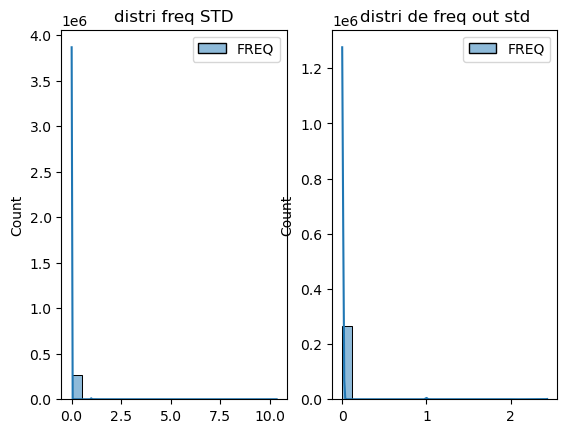

In [89]:
fig, axes = plt.subplots(1, 2)
sns.histplot(y_train_freq_out_std,kde=True,ax = axes[0])
sns.histplot(y_train_freq_out_iqr,kde=True,ax = axes[1])
axes[0].set_title("distri freq STD")
axes[1].set_title("distri freq IQR");
plt.title("distri de freq out std");

c:\Users\loreb\anaconda3\envs\envCA\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\loreb\anaconda3\envs\envCA\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


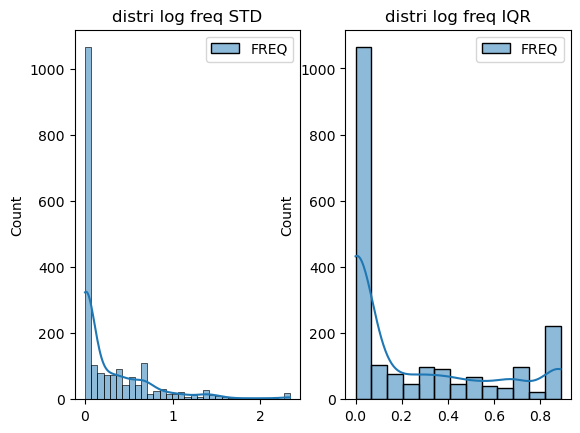

In [90]:
# distribution de freq outlier std au log
fig, axes = plt.subplots(1, 2)
sns.histplot(np.log(y_train_freq_out_std),kde=True,ax = axes[0])
sns.histplot(np.log(y_train_freq_out_iqr),kde=True,ax = axes[1])
axes[0].set_title("distri log freq STD")
axes[1].set_title("distri log freq IQR");
# loi de poisson

Text(0.5, 1.0, 'distri CM IQR')

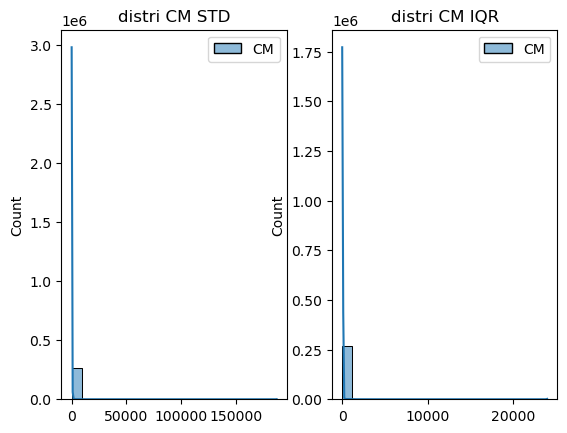

In [91]:
# distribution de freq outlier std au log
fig, axes = plt.subplots(1, 2)
sns.histplot(y_train_cm_out_std,kde=True,ax = axes[0])
sns.histplot(y_train_cm_out_iqr,kde=True,ax = axes[1])
axes[0].set_title("distri CM STD")
axes[1].set_title("distri CM IQR")

c:\Users\loreb\anaconda3\envs\envCA\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\loreb\anaconda3\envs\envCA\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


Text(0.5, 1.0, 'distri log CM IQR')

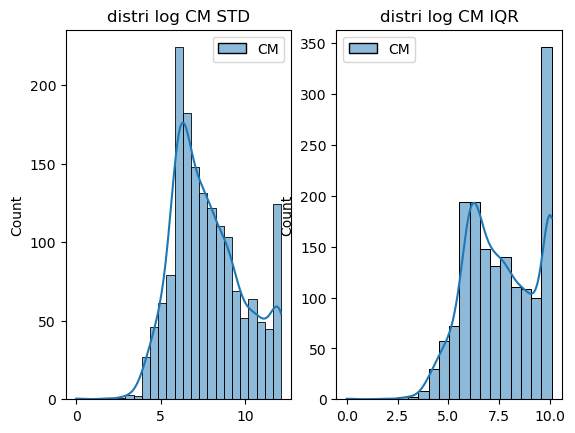

In [92]:
# distribution de freq outlier std au log
fig, axes = plt.subplots(1, 2)
sns.histplot(np.log(y_train_cm_out_std),kde=True,ax = axes[0])
sns.histplot(np.log(y_train_cm_out_iqr),kde=True,ax = axes[1])
axes[0].set_title("distri log CM STD")
axes[1].set_title("distri log CM IQR")

In [ ]:
#### PREPRO
## met le treshold pour la catégorie other à 1% du dataset (~4500)
# fait avec RareLabelEncoder de feature-engine

## simple imputer avec add_missing pour info de missing val
# pour les var avec > 30-40% de val mq ==> met indicateur que val manquantes (-1 pour cat)
# autres remplace par median ou supprime (diff dt pour model)

### gestion NAs

In [ ]:
## simple imputer avec add_missing pour info de missing val
# pour les var avec > 30-40% de val mq ==> met indicateur que val manquantes (-1 pour cat)
# autres remplace par median ou supprime (diff dt pour model)

In [126]:
train.isna().mean()[train.isna().mean() >= 0.50].index
# 183 col avec + de mopitié de val mq

Index(['CARACT2', 'CARACT3', 'TYPBAT1', 'DEROG12', 'DEROG13', 'DEROG14',
       'DEROG16', 'DISTANCE_111', 'DISTANCE_112', 'DISTANCE_121',
       ...
       'NBJRR30_MM_A', 'NBJRR30_MMAX_A', 'NBJRR30_MSOM_A', 'NBJRR100_MM_A',
       'NBJRR100_MMAX_A', 'NBJRR100_MSOM_A', 'RR_VOR_MM_A', 'RR_VOR_MMAX_A',
       'RRAB_VOR_MM_A', 'RRAB_VOR_MMAX_A'],
      dtype='object', length=183)

In [158]:
na_30_plus = train.isna().mean()[train.isna().mean() >= 0.30].index
print(len(na_30_plus))
print(train[na_30_plus].select_dtypes("object").shape)
print(max(train[na_30_plus].isna().sum()))

# 188 col avec + de 30% de val mq avec 187 de type obj

188
(383610, 180)
383602


In [ ]:
na_40_plus = train.isna().mean()[train.isna().mean() >= 0.40].index
print(len(na_40_plus))
print(train[na_40_plus].select_dtypes("object").shape)
print(max(train[na_40_plus].isna().sum())) # nb max de lignes manquantes

# 188 col avec + de 30% de val mq avec 187 de type obj

184
(383610, 177)
383602


In [162]:
na_10_moins = train.isna().mean()[(train.isna().mean() <= 0.10) & train.isna().mean() > 0].index
print(len(na_10_moins))
print(train[na_10_moins].select_dtypes("object").shape)
print(max(train[na_10_moins].isna().sum())) # nb max de lignes manquantes
# 84 col avec - 10% mais au moins 1 na de val mq avec 113 de type obj
# drop des na à ces index ?
# ou impute

84
(383610, 60)
27460


In [163]:
na_20_moins = train.isna().mean()[(train.isna().mean() <= 0.20) & train.isna().mean() > 0].index
print(len(na_20_moins))
print(train[na_20_moins].select_dtypes("object").shape)
print(max(train[na_20_moins].isna().sum())) # nb max de lignes manquantes
# 84 col avec - 10% mais au moins 1 na de val mq avec 113 de type obj
# drop des na à ces index ?
# ou impute

84
(383610, 60)
27460


In [164]:
# col avec 10% ou moins de na
na_10_moins = train.isna().mean()[(train.isna().mean() <= 0.10) & train.isna().mean() > 0].index
# col avec 20% ou moins de na
na_20_moins = train.isna().mean()[(train.isna().mean() <= 0.20) & train.isna().mean() > 0].index
# col avec 20% ou moins de na
na_30_plus = train.isna().mean()[train.isna().mean() >= 0.30].index
# col plus 40% de na
na_40_plus = train.isna().mean()[train.isna().mean() >= 0.40].index


In [78]:
sorted(train["CARACT4"].value_counts().index)

['Surface de moins d',
 'Surface de plus de',
 'Surface entre 1001',
 'Surface entre 1501',
 'Surface entre 501',
 'absence de surface']

In [ ]:
# dabord simple imputer : pour val < 30% impute la mean ou most_frequent   pour val >=30 mes "mising"
# OU pour les cat, Ordinal encoder avec missing val = -99  puis rare labelencoder avec -1

In [ ]:
# dabord simple imputer : pour val < 30% impute la mean ou most_frequent   pour val >=30 mes "mising"
# OU pour les cat, Ordinal encoder avec missing val = -99  puis rare labelencoder avec -1


In [ ]:
# target_out_std = Winsorizer(capping_method="gaussian", tail = "right",fold=2)
# target_out_iqr = Winsorizer(capping_method="iqr", tail = "right")

In [ ]:
train_output.head()

ID  FREQ   CM  ANNEE_ASSURANCE  CHARGE  NbSinistre  CM_IQR  CM_STD  \
0   1   0.0  0.0         1.000000     0.0         0.0     0.0     0.0   
1   2   0.0  0.0         1.000000     0.0         0.0     0.0     0.0   
2   3   0.0  0.0         0.402740     0.0         0.0     0.0     0.0   
3   4   0.0  0.0         0.246575     0.0         0.0     0.0     0.0   
4   5   0.0  0.0         0.838356     0.0         0.0     0.0     0.0   

   FREQ_STD  FREQ_IQR  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  
4       0.0       0.0

### preprocessing pipelines

In [173]:
 # Certaines modalités sont alphanumériques : fonction pour les classe correctemment lors de l'encoding

import re
def sorted_moda(df,col_name): 
    """ 
        Classe les modalités
        fonction lambda convert : si la chaine de caractere est numeric renvoie une int
        fcontcion alphanum_key : scinde une string en fonction des nombres dedans. 
        puis chaque element splité est passé dans convert
        si il y a des nan, c'est à rajouter à part en fin de liste
        
        arguments:
        df : dataframe.
        col_name : nom de la colonne
        
        return : la liste des modalité classé en fonction de la clé numérique
        """
    modalites = df[col_name].value_counts().index # recup les modalités
    
    if re.search(r'([A-Za-z]+)(\d+)', str(modalites[0])) : # si la premiere modalité est composée d'une première part en lettre et seconde en chiffres on fait le sort
        
        convert = lambda text: int(text) if text.isdigit() else text
        alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
        sortedmoda =sorted(modalites, key = alphanum_key)
         
    
    else :
        sortedmoda = sorted(modalites)
    
    if np.nan in train[col_name].value_counts(dropna=False).index : # si il y a des Na met en fin de l'odre
        sortedmoda.append(np.nan) 
    
    return sortedmoda
    
    

In [192]:
categorical_features = train.select_dtypes("object").columns
numerical_features = train.select_dtypes("number").columns

# liste des modalités rangé pour les col object
moda_sorted = [sorted_moda(train,col) for col in categorical_features]

In [193]:
# preprocessor_1 : ne gere pas les diff % de NA
#   num : simple imputer de NA avec -1 et robustsclaer
#   cat : ordinale encoder avec na = -1 et rarelabel encoder = -2

# val num : simple imputer avec -1
# cat val : ordinal encoder avec na= -1
# pas bon FunctionTransformer : pas possible de mettre moda
# faire sans pipeline
# rarelabel encoder avant 

# Pipeline for numerical features : là où NA on met - 1 puis robustscaler
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(add_indicator=True,strategy = "constant", fill_value=-1)),  # Apply KNN Imputer first
    ('scaler', RobustScaler())
])

# Pipeline for categorical features : ordianal encoder avec na = -1 puis rarelabel avec rare = -2
categorical_pipeline = Pipeline(steps=[
    ('encoder', OrdinalEncoder(categories = moda_sorted ,dtype='int',encoded_missing_value=-1,min_frequency = 0.01)) # smin_frequency = 0.01 pour rassembler les rares. prennent la plus grande valeur
])

# Combine pipelines into a ColumnTransformer
preprocessor_1 = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)],
    remainder = "passthrough")



In [187]:
preprocessor_1

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                fill_value=-1,
                                                                strategy='constant')),
                                                 ('scaler', RobustScaler())]),
                                 Index(['ID', 'ANCIENNETE', 'DUREE_REQANEUF', 'CA1', 'CA2', 'CA3', 'SUM_CA',
       'KAPITAL10', 'KAPITAL11', 'KAPITAL12', 'KAPITAL13', 'KAPITAL14',
       'KAPITAL15', 'KAPITAL16', 'KAPITAL17...
                                                                              100.0], ...],
                                                                 dtype='int',
                                                                 encoded_missing_value=-1,
                                                                 min_frequency=0.01))]),
                                 Index(['ACTIVIT2', 'VOCATION', 'TYPERS', 'ADOSS', 'CARACT1', 'CARACT2',
       'CARACT3', 'INDEM1', 'CARACT4', 'CARACT5',
       ...
       'NBJRR100_MM_A', 'NBJRR100_MMAX_A', 'NBJRR100_MSOM_A', 'RR_VOR_MM_A',
       'RR_VOR_MMAX_A', 'RRAB_VOR_MM_A', 'RRAB_VOR_MMAX_A', 'ESPINSEE',
       'AN_EXERC', 'ZONE'],
      dtype='object', length=307))])

In [194]:
# faire les PCA sur les features similaires

si = SimpleImputer(strategy = "constant", fill_value=-1) 
rs = RobustScaler()
test_data = si.fit_transform(X_train[numerical_features])
test_data = rs.fit_transform(test_data)
test_data = pd.DataFrame(test_data, columns=si.feature_names_in_)
test_data.head()

ANCIENNETE  DUREE_REQANEUF  CA1  CA2  CA3  SUM_CA  KAPITAL10  KAPITAL11  \
0   -0.142857             0.0  0.0  0.0  0.0     0.0   0.000000  -0.000011   
1    0.000000             0.0  0.0  0.0  0.0     0.0   0.000000  -0.000011   
2   -0.714286             0.0  0.0  0.0  0.0     0.0   0.085714   0.085713   
3   -0.428571             0.0  0.0  0.0  0.0     0.0   0.000000  -0.000011   
4    0.714286             0.0  0.0  0.0  0.0     0.0   0.000000   0.000000   

   KAPITAL12  KAPITAL13  ...  NBBAT9  NBBAT10  NBBAT11   NBBAT13  NBBAT14  \
0  -0.714286        0.0  ...     0.0      0.0      0.0 -0.666667      0.0   
1  -0.714286        0.0  ...     1.0      0.0      0.0 -0.333333      0.0   
2  -0.671429        0.0  ...     0.0      0.0      0.0 -0.666667      0.0   
3  -0.714286        0.0  ...     0.0      0.0      0.0  0.000000      0.0   
4   0.285714        0.0  ...     1.0      0.0      0.0  0.833333      0.0   

    SUM_BAT  TAILLE3  TAILLE4  NBSINCONJ  NBSINSTRT  
0 -0.761905      0.0      0.0        0.0        0.0  
1 -0.380952      0.0      0.0        0.0        0.0  
2 -0.761905      0.0      0.0        0.0        0.0  
3 -0.190476      0.0      0.0        0.0        0.0  
4  0.619048      0.0      0.0        0.0        0.0  

[5 rows x 70 columns]

<Axes: >

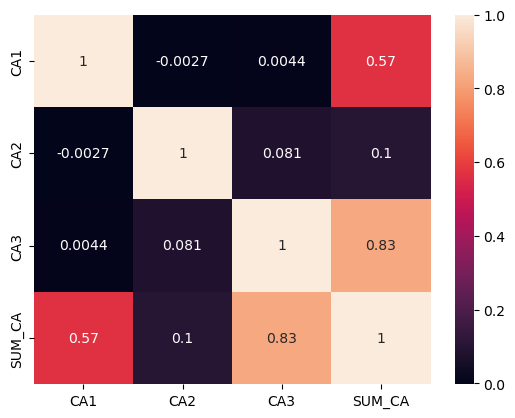

In [195]:
sns.heatmap(test_data.filter(regex='CA', axis=1).corr(), annot=True)

<Axes: >

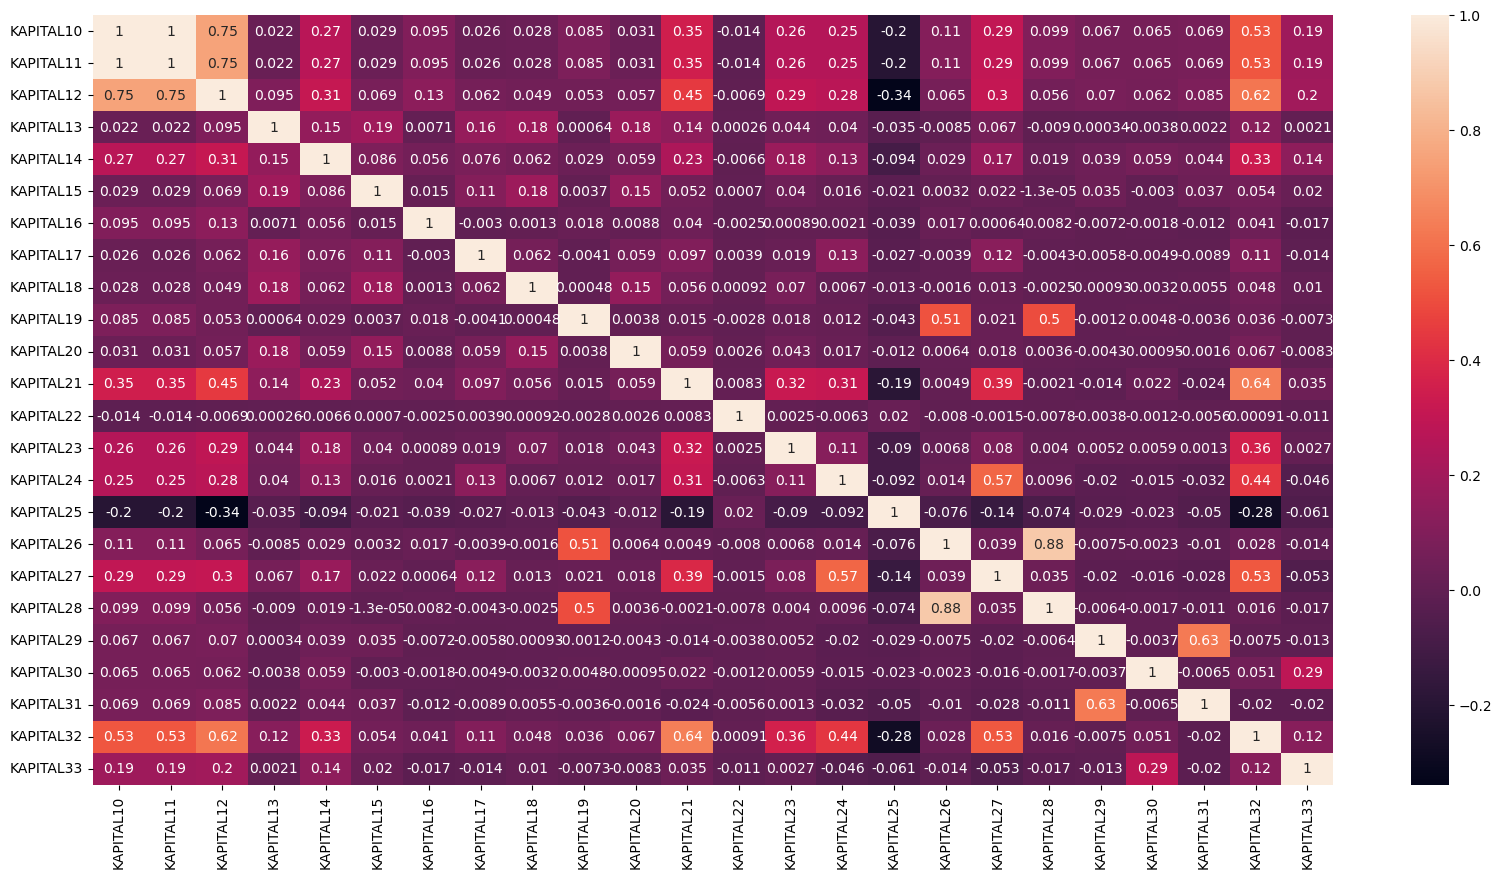

In [196]:
plt.figure(figsize=(20,10))
sns.heatmap(test_data.filter(regex='KAPITAL', axis=1).corr(), annot=True)

In [197]:
pca = PCA()  # PCA sur tout le df numeric full
projected = pca.fit_transform(test_data)
print(test_data.shape)
print(projected.shape)

(268527, 70)
(268527, 70)


In [198]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

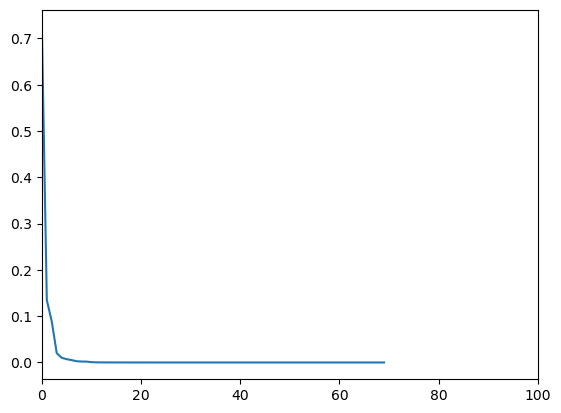

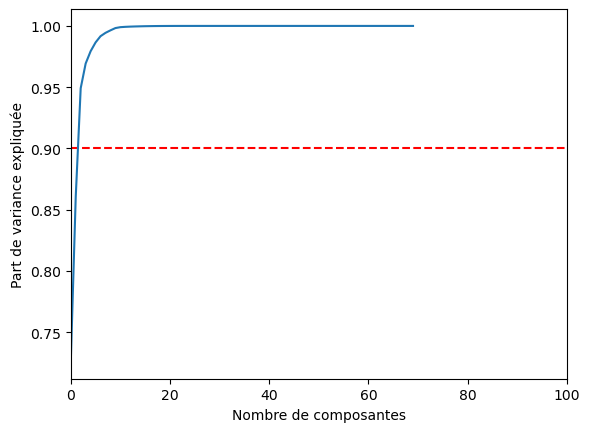

In [199]:
plt.figure()
plt.xlim(0,100)
plt.plot(pca.explained_variance_ratio_);

plt.figure()
plt.xlim(0,100)
plt.xlabel('Nombre de composantes')
plt.ylabel('Part de variance expliquée')
plt.axhline(y = 0.9, color ='r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum());

# 10 composante pour avoir 1

In [204]:
pca = PCA(n_components = 0.9)  # combien de composante pour avoir 90% de variance xpk pour les var num
projected2 = pca.fit_transform(test_data)
print(test_data.shape)
print(projected2.shape)

# conserve 3 axes pour expliquer 90% de la variance avec les var quanti

(268527, 70)
(268527, 3)


In [205]:
# ACP pour les CA (3 colonnes)
pca = PCA()  
projected2 = pca.fit_transform(test_data.filter(regex='CA[0-9]', axis=1))
print(test_data.filter(regex='CA[0-9]', axis=1).shape)
print(projected2.shape)

# conserve 3 axes pour expliquer 90% de la variance avec les var quanti

print(pca.explained_variance_ratio_)

(268527, 3)
(268527, 3)
[0.67860143 0.32004835 0.00135022]


In [189]:
test_data.columns

Index(['ANCIENNETE', 'DUREE_REQANEUF', 'CA1', 'CA2', 'CA3', 'SUM_CA',
       'KAPITAL10', 'KAPITAL11', 'KAPITAL12', 'KAPITAL13', 'KAPITAL14',
       'KAPITAL15', 'KAPITAL16', 'KAPITAL17', 'KAPITAL18', 'KAPITAL19',
       'KAPITAL20', 'KAPITAL21', 'KAPITAL22', 'KAPITAL23', 'KAPITAL24',
       'KAPITAL25', 'KAPITAL26', 'KAPITAL27', 'KAPITAL28', 'KAPITAL29',
       'KAPITAL30', 'KAPITAL31', 'KAPITAL32', 'KAPITAL33', 'SUM_KAPITAL',
       'SURFACE1', 'SURFACE2', 'SURFACE3', 'SURFACE4', 'SURFACE5', 'SURFACE6',
       'SURFACE7', 'SURFACE8', 'SURFACE9', 'SURFACE10', 'SURFACE11',
       'SURFACE12', 'SURFACE13', 'SURFACE14', 'SURFACE15', 'SURFACE16',
       'SURFACE17', 'SURFACE18', 'SURFACE19', 'SURFACE20', 'SURFACE21',
       'SUM_SURFACE', 'NBBAT1', 'NBBAT2', 'NBBAT3', 'NBBAT4', 'NBBAT5',
       'NBBAT6', 'NBBAT7', 'NBBAT8', 'NBBAT9', 'NBBAT10', 'NBBAT11', 'NBBAT13',
       'NBBAT14', 'SUM_BAT', 'SUM_RISK', 'MEAN_RISK', 'NBSINCONJ',
       'NBSINSTRT'],
      dtype='object')

In [208]:
#ACP nombre de batiment
pca = PCA(0.9)  
projected2 = pca.fit_transform(test_data.filter(regex='NBBAT[0-9]', axis=1))
print(test_data.filter(regex='NBBAT[0-9]', axis=1).shape)
print(projected2.shape)

# conserve 4 axes pour expliquer 90% de la variance avec les var quanti

print(pca.explained_variance_ratio_)

(268527, 13)
(268527, 4)
[0.43018747 0.23287159 0.18611079 0.07576539]


In [210]:
# acp fulldata numerique
pca_full = PCA(0.9)  # project from 64 to 2 dimensions
proj = pca_full.fit_transform(test_data)
print(test_data.shape)
print(proj.shape)
print(pca_full.explained_variance_ratio_)
# conserve 3 axes pour expliquer 90% de la variance avec les var quanti

(268527, 70)
(268527, 3)
[0.72572492 0.13480244 0.0886268 ]


C:\Users\loreb\AppData\Local\Temp\ipykernel_2176\868098484.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(proj[:, 0], proj[:, 1], cmap=plt.cm.Spectral)


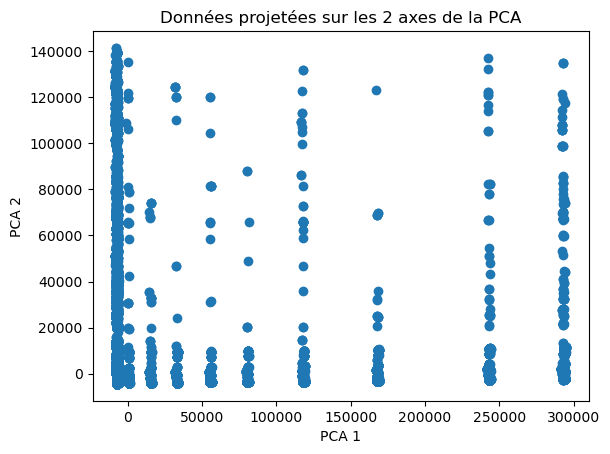

In [203]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(proj[:, 0], proj[:, 1], cmap=plt.cm.Spectral)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

ax.set_title("Données projetées sur les 2 axes de la PCA")
plt.show();


In [ ]:
# interprétation

# regarde la corrélation des variables avec les axes : corrélation + ou - avec la direction principale de variation représenté par un axe X
# ex : variable 1 et 2 sont corrélées négativement à l'axe 1 donc si un point a une coordonnée élevée selon l'axe 1 ==> les valeurs des variables 1 et 2 
# associés à ce point sont faibles

In [212]:
#ACP sur les donnée catégorielles encodée
oe = OrdinalEncoder(categories = moda_sorted ,dtype='int',encoded_missing_value=-1,min_frequency = 0.01)
test_data_cat = oe.fit_transform(train[categorical_features])

pca = PCA(0.9)  # project from 64 to 2 dimensions
projected = pca.fit_transform(test_data_cat)
print(test_data_cat.shape)
print(projected.shape)

# 10 composant pour 90%

(383610, 307)
(383610, 10)


In [213]:
pca.explained_variance_ratio_

array([0.3938066 , 0.26750162, 0.08103597, 0.05685519, 0.03085371,
       0.02050547, 0.01562914, 0.01506981, 0.01101437, 0.01009217])

#### pipeline PCA 

In [225]:
# preprocessor_1 : ne gere pas les diff % de NA ==> simple imputer
#   num : simple imputer de NA avec -1 et robustsclaer
#   cat : ordinale encoder avec na = -1 et rarelabel encoder = -2

# val num : simple imputer avec -1
# cat val : ordinal encoder avec na= -1
# pas bon FunctionTransformer : pas possible de mettre moda
# faire sans pipeline
# rarelabel encoder avant 

# Pipeline for numerical features : la ou NA on met - 1 puis robustscaler
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(add_indicator=True,strategy = "constant", fill_value=-1)),  # Apply KNN Imputer first
    ('scaler', RobustScaler()),
    ("Pca_num",PCA(0.9))
])

# Pipeline for categorical features : ordianal encoder avec na = -1 puis rarelabel avec rare = -2
categorical_pipeline = Pipeline(steps=[
    ('encoder', OrdinalEncoder(categories = moda_sorted ,dtype='int',encoded_missing_value=-1,min_frequency = 0.01)), # smin_frequency = 0.01 pour rassembler les rares. prennent la plus grande valeur
    ("Pca_cat",PCA(0.9)) 
])

# Combine pipelines into a ColumnTransformer
preprocessor_PCA = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)],
    remainder = "passthrough")


In [215]:
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error,root_mean_squared_error

# pour modele glm distrubution de poisson pour freq
import statsmodels.api as sm

In [226]:
# pipeline avec PCA + model LGBM
pipeline_PCA_lgbm = Pipeline(
    steps=[
        ('preprocessor', preprocessor_PCA),
        ('classifier', LGBMRegressor(max_depth = 10))
            ],
    verbose=True
)

In [218]:
# pipele CM full IQR
pipeline_PCA_lgbm.fit(X_train,y_train_cm_out_iqr)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total= 4.0min


c:\Users\loreb\anaconda3\envs\envCA\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,008628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 268527, number of used features: 13
[LightGBM] [Info] Start training from score 41,512635
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.8s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 fill_value=-1,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   RobustScaler()),
                                                                  ('Pca_num',
                                                                   PCA(n_components=0.9))]),
                                                  Index(['ANCIENNETE', 'DUREE_REQANEUF', 'CA1', 'CA2', 'CA3', 'SUM_CA',
       'KAPITAL10', 'KAPITAL11', 'KAPITAL1...
                                                                   PCA(n_components=0.9))]),
                                                  Index(['ACTIVIT2', 'VOCATION', 'TYPERS', 'ADOSS', 'CARACT1', 'CARACT2',
       'CARACT3', 'INDEM1', 'CARACT4', 'CARACT5',
       ...
       'NBJRR100_MM_A', 'NBJRR100_MMAX_A', 'NBJRR100_MSOM_A', 'RR_VOR_MM_A',
       'RR_VOR_MMAX_A', 'RRAB_VOR_MM_A', 'RRAB_VOR_MMAX_A', 'ESPINSEE',
       'AN_EXERC', 'ZONE'],
      dtype='object', length=307))])),
                ('classifier', LGBMRegressor(max_depth=10))],
         verbose=True)

In [220]:
# prediction model PCA de cm IQR

# pipeline_PCA_lgbm.fit(X_train,y_train_cm_out_iqr)

y_train_pred_cm = pipeline_PCA_lgbm.predict(X_train)
y_test_pred_cm = pipeline_PCA_lgbm.predict(X_test)
print("RMSE train CM IQR",root_mean_squared_error(y_train_cm_out_iqr,y_train_pred_cm))
print("RMSE test CM IQR",root_mean_squared_error(y_test_cm_out_iqr,y_test_pred_cm))

RMSE train CM IQR 840.4390547681041
RMSE test CM IQR 912.2110968066032


In [227]:
# prediction model PCA de cm IQR
pipeline_PCA_lgbm = Pipeline(
    steps=[
        ('preprocessor', preprocessor_PCA),
        ('classifier', LGBMRegressor(max_depth = 10))
            ],
    verbose=True
)
pipeline_PCA_lgbm.fit(X_train[y_train_cm_out_iqr>0],y_train_cm_out_iqr[y_train_cm_out_iqr>0])

y_train_pred_cm0 = pipeline_PCA_lgbm.predict(X_train)
y_test_pred_cm0 = pipeline_PCA_lgbm.predict(X_test)
print("RMSE train CM 0 IQR",root_mean_squared_error(y_train_cm_out_iqr[y_train_cm_out_iqr>0],y_train_pred_cm0[y_train_cm_out_iqr>0]))
print("RMSE test CM 0 IQR",root_mean_squared_error(y_test_cm_out_iqr[y_test_cm_out_iqr>0],y_test_pred_cm0[y_test_cm_out_iqr>0]))

c:\Users\loreb\anaconda3\envs\envCA\Lib\site-packages\sklearn\decomposition\_pca.py:652: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


ValueError: Found unknown categories [nan] in column 0 during fit

In [ ]:
# prediction model PCA de freq IQR
pipeline_PCA_lgbm = Pipeline(
    steps=[
        ('preprocessor', preprocessor_PCA),
        ('classifier', LGBMRegressor(max_depth = 10))
            ],
    verbose=True
)

pipeline_PCA_lgbm.fit(X_train,y_train_freq_out_iqr)
y_train_pred_freq = pipeline_PCA_lgbm.predict(X_train)
y_test_pred_freq = pipeline_PCA_lgbm.predict(X_test)
print("RMSE train CM IQR",root_mean_squared_error(y_train_freq_out_iqr,y_train_pred_freq))
print("RMSE test CM IQR",root_mean_squared_error(y_test_freq_out_iqr,y_test_pred_freq))

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total= 3.5min
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,006957 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 268527, number of used features: 14
[LightGBM] [Info] Start training from score 0,010067


c:\Users\loreb\anaconda3\envs\envCA\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.5s
RMSE train CM IQR 0.11923398201904487
RMSE test CM IQR 0.12403155154874786


In [ ]:
charge_pred_train = y_train_pred_cm * y_train_pred_freq * y_train["ANNEE_ASSURANCE"]
charge_pred_test = y_test_pred_cm * y_test_pred_freq * y_test["ANNEE_ASSURANCE"]

charge_pred_train0 = y_train_pred_cm0 * y_train_pred_freq * y_train["ANNEE_ASSURANCE"]
charge_pred_test0 = y_test_pred_cm0 * y_test_pred_freq * y_test["ANNEE_ASSURANCE"]

In [ ]:
print("RMSE charge train",root_mean_squared_error(y_train["CHARGE"],charge_pred_train))
print("RMSE charge test",root_mean_squared_error(y_test["CHARGE"],charge_pred_test))

print("RMSE charge train0",root_mean_squared_error(y_train["CHARGE"],charge_pred_train0))
print("RMSE charge test0",root_mean_squared_error(y_test["CHARGE"],charge_pred_test0))

In [ ]:
print("RMSE charge train",root_mean_squared_error(y_train["CHARGE"],charge_pred_train))
print("RMSE charge test",root_mean_squared_error(y_test["CHARGE"],charge_pred_test))

print("RMSE charge train0",root_mean_squared_error(y_train["CHARGE"],charge_pred_train0))
print("RMSE charge test0",root_mean_squared_error(y_test["CHARGE"],charge_pred_test0))

RMSE charge train 6677.593890847117
RMSE charge test 7079.868566705978


#### model PCA sur numerique seul

In [ ]:
# model sans pca sans categories
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(add_indicator=True,strategy = "constant", fill_value=-1)),  # Apply KNN Imputer first
    ('scaler', RobustScaler()),
    ("Pca_num",PCA(0.9))
])

# Pipeline for categorical features : ordianal encoder avec na = -1 puis rarelabel avec rare = -2
categorical_pipeline = Pipeline(steps=[
    ('encoder', OrdinalEncoder(categories = moda_sorted ,dtype='int',encoded_missing_value=-1,min_frequency = 0.01)) # smin_frequency = 0.01 pour rassembler les rares. prennent la plus grande valeur
])

# Combine pipelines into a ColumnTransformer
preprocessor_1 = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)],
    remainder = "passthrough")

pipeline_PcaNum_lgbm = Pipeline(
    steps=[
        ('preprocessor', preprocessor_1),
        ('classifier', LGBMRegressor(max_depth = 10))
            ],
    verbose=True
)

In [ ]:
pipeline_PcaNum_lgbm

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 fill_value=-1,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   RobustScaler()),
                                                                  ('Pca_num',
                                                                   PCA(n_components=0.9))]),
                                                  Index(['ANCIENNETE', 'DUREE_REQANEUF', 'CA1', 'CA2', 'CA3', 'SUM_CA',
       'KAPITAL10', 'KAPITAL11', 'KAPITAL1...
                                                                                  min_frequency=0.01))]),
                                                  Index(['ACTIVIT2', 'VOCATION', 'TYPERS', 'ADOSS', 'CARACT1', 'CARACT2',
       'CARACT3', 'INDEM1', 'CARACT4', 'CARACT5',
       ...
       'NBJRR100_MM_A', 'NBJRR100_MMAX_A', 'NBJRR100_MSOM_A', 'RR_VOR_MM_A',
       'RR_VOR_MMAX_A', 'RRAB_VOR_MM_A', 'RRAB_VOR_MMAX_A', 'ESPINSEE',
       'AN_EXERC', 'ZONE'],
      dtype='object', length=307))])),
                ('classifier', LGBMRegressor(max_depth=10))],
         verbose=True)

In [ ]:
# pipeline sur CM iqr
pipeline_PcaNum_lgbm.fit(X_train,y_train_cm_out_iqr)

pipe_2_y_train_pred_cm = pipeline_PcaNum_lgbm.predict(X_train)
pipe_2_y_test_pred_cm = pipeline_PcaNum_lgbm.predict(X_test)
print("RMSE train CM IQR",root_mean_squared_error(y_train_cm_out_iqr,pipe_2_y_train_pred_cm))
print("RMSE test CM IQR",root_mean_squared_error(y_test_cm_out_iqr,pipe_2_y_test_pred_cm))

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total= 4.6min


c:\Users\loreb\anaconda3\envs\envCA\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,053204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2248
[LightGBM] [Info] Number of data points in the train set: 268527, number of used features: 309
[LightGBM] [Info] Start training from score 41,512635
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   4.1s
MSE train CM IQR 836.1267491566728
MSE test CM IQR 912.7442302772049


In [ ]:
# pipeline sur Freq iqr
pipeline_PcaNum_lgbm.fit(X_train,y_train_cm_out_iqr)

pipe_2_y_train_pred_freq = pipeline_PcaNum_lgbm.predict(X_train)
pipe_2_y_test_pred_freq = pipeline_PcaNum_lgbm.predict(X_test)
print("RMSE train FREQ IQR",root_mean_squared_error(y_train_freq_out_iqr,pipe_2_y_train_pred_freq))
print("RMSE test FREQ IQR",root_mean_squared_error(y_test_freq_out_iqr,pipe_2_y_test_pred_freq))

In [ ]:
pipe_2_charge_pred_train = pipe_2_y_train_pred_cm * pipe_2_y_train_pred_freq * y_train["ANNEE_ASSURANCE"]
pipe_2_charge_pred_test = pipe_2_y_test_pred_cm * pipe_2_y_test_pred_freq * y_test["ANNEE_ASSURANCE"]

print("RMSE charge train",root_mean_squared_error(y_train["CHARGE"],pipe_2_charge_pred_train))
print("RMSE charge test",root_mean_squared_error(y_test["CHARGE"],pipe_2_charge_pred_test))

In [ ]:
 # Préparation des données X = df[['predictor1', 'predictor2']] y = df['count_outcome'] 
# Ajout d'une constante à l'ensemble de variables prédictives X = sm.add_constant(X) 
# # Modèle de régression de Poisson model = sm.GLM(y, X, family=sm.families.Poisson()).fit() 
# # Résumé du modèle print(model.summary())

In [101]:
X_train_se = preprocessor_PCA.fit_transform(X_train)
X_test_se = preprocessor_PCA.transform(X_test)

KeyboardInterrupt: 

In [46]:
# modele glm distribution poisson
X_train_se = sm.add_constant(X_train_se)
X_test_se = sm.add_constant(X_test_se)

md = sm.GLM(y_train_freq_out_iqr, X_train_se, family=sm.families.Poisson()).fit() 
pred_glm_train = md.predict(X_train_se)
pred_glm_test = md.predict(X_test_se)

print("RMSE train CM IQR",root_mean_squared_error(y_train_cm_out_iqr,pred_glm_train))
print("RMSE test CM IQR",root_mean_squared_error(y_test_cm_out_iqr,pred_glm_test))

# RMSE train CM IQR 878.209668995499
#RMSE test CM IQR 911.41688136111

RMSE train CM IQR 878.209668995499
RMSE test CM IQR 911.416879774804


In [31]:
md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   FREQ   No. Observations:               268527
Model:                            GLM   Df Residuals:                   268512
Model Family:                 Poisson   Df Model:                           14
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14898.
Date:              sam., 22 mars 2025   Deviance:                       25351.
Time:                        21:58:42   Pearson chi2:                 3.91e+05
No. Iterations:                     8   Pseudo R-squ. (CS):           0.005343
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8507      0.024   -206.182      0.000      -4.897      -4.805
x1         -1.803e-06   4.52e-07     -3.993      0.000   -2.69e-06   -9.18e-07
x2          4.062e-09   9.63e-07      0.004      0.997   -1.88e-06    1.89e-06
x3          1.358e-06   1.21e-06      1.125      0.260   -1.01e-06    3.72e-06
x4             0.0020      0.001      1.726      0.084      -0.000       0.004
x5            -0.0220      0.001    -14.968      0.000      -0.025      -0.019
x6            -0.0155      0.002     -6.397      0.000      -0.020      -0.011
x7             0.0627      0.003     20.240      0.000       0.057       0.069
x8             0.0234      0.004      5.462      0.000       0.015       0.032
x9             0.0116      0.005      2.129      0.033       0.001       0.022
x10            0.0157      0.006      2.748      0.006       0.005       0.027
x11           -0.0594      0.006     -9.379      0.000      -0.072      -0.047
x12           -0.0849      0.007    -11.731      0.000      -0.099      -0.071
x13            0.0722      0.008      8.916      0.000       0.056       0.088
x14            0.1459      0.009     16.879      0.000       0.129       0.163
==============================================================================
"""

In [ ]:
# model sans PCA ....
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(add_indicator=True,strategy = "constant", fill_value=-1)),  # Apply KNN Imputer first
    ('scaler', RobustScaler()),
    ("Pca_num",PCA(0.9))
])

# Pipeline for categorical features : ordianal encoder avec na = -1 puis rarelabel avec rare = -2
categorical_pipeline = Pipeline(steps=[
    ('encoder', OrdinalEncoder(categories = moda_sorted ,dtype='int',encoded_missing_value=-1,min_frequency = 0.01)) # smin_frequency = 0.01 pour rassembler les rares. prennent la plus grande valeur
])

# Combine pipelines into a ColumnTransformer
preprocessor_1 = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)],
    remainder = "passthrough")

pipeline_PcaNum_lgbm = Pipeline(
    steps=[
        ('preprocessor', preprocessor_1),
        ('classifier', LGBMRegressor(max_depth = 10))
            ],
    verbose=True
)

In [ ]:
## lgbm avec tweedie sur freq

In [ ]:
# modele complet avec PCA cm et freq : freqIQR  CMIqr
# log de 
mdPCA_CM = LGBMRegressor()
mdPCA_Freq = LGBMRegressor()

mdPCA_CM.fit(X_train_se,y_train_cm_out_iqr)
mdPCA_Freq.fit(X_train_se,y_train_freq_out_iqr)